In [140]:
# Standard libraries Imports
import json
# Third party Imports
import pandas as pd
from ydata_profiling import ProfileReport # Quick EDA
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
# Local imports
from src.utils import count_plot_percentage
from src.utils import one_hot_encoding


In [3]:
data = pd.read_csv("data/Citywide_Mobility_Survey_-_Person_Survey_2019.csv")

In [4]:
data.head()

hh_id     weight        cms_zone  survey_mode    person_id  person_num  \
0  191546322    0.00000  Inner Brooklyn            1  19154632203           3   
1  191546322    0.00000  Inner Brooklyn            1  19154632202           2   
2  191546322  212.12729  Inner Brooklyn            1  19154632201           1   
3   19241657    0.00000   Middle Queens            1   1924165703           3   
4   19241657    0.00000   Middle Queens            1   1924165702           2   

   is_participant  num_days  num_days_complete  num_trips  ...  \
0               0       NaN                NaN        NaN  ...   
1               0       NaN                NaN        NaN  ...   
2               1       7.0                7.0       23.0  ...   
3               0       NaN                NaN        NaN  ...   
4               0       NaN                NaN        NaN  ...   

   race_native_hawaiian  race_white  race_other  disability_hearing  \
0                   995         995         995                 995   
1                   995         995         995                 995   
2                     1           0           0                   0   
3                   995         995         995                 995   
4                   995         995         995                 995   

   disability_seeing  disability_walking  disability_mobility  \
0                995                 995                  995   
1                995                 995                  995   
2                  0                   0                    0   
3                995                 995                  995   
4                995                 995                  995   

  disability_dressing disability_concentrating  disability_none  
0                 995                      995              995  
1                 995                      995              995  
2                   0                        0                1  
3                 995                      995              995  
4                 995                      995              995  

[5 rows x 165 columns]

* Observe having nominal data(categoricals represented by numbers). s.t. is_participant, race, and disability columns
* Observe having NULL values

In [5]:
# Quick EDA
from pandas_profiling import ProfileReport

#EDA using pandas-profiling
profile = ProfileReport(data, explorative=True)

#Saving results to a HTML file
profile.to_file("output.html")

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\DELL\AppData\Local\Temp\ipykernel_17576\3818842353.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
Summarize dataset:  97%|█████████▋| 166/172 [00:06<00:00, 102.64it/s, Calculate auto correlation]                  d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = new

In [5]:
data.describe()

hh_id        weight  survey_mode     person_id   person_num  \
count  8.286000e+03   8286.000000  8286.000000  8.286000e+03  8286.000000   
mean   2.468398e+07    804.993000     1.246681  2.468398e+09     2.146633   
std    2.974500e+07   4395.258128     0.496917  2.974500e+09     1.317302   
min    1.900024e+07      0.000000     1.000000  1.900024e+09     1.000000   
25%    1.926343e+07      0.000000     1.000000  1.926343e+09     1.000000   
50%    1.951784e+07      0.000000     1.000000  1.951784e+09     2.000000   
75%    1.979496e+07    199.885270     1.000000  1.979496e+09     3.000000   
max    1.999892e+08  88819.119060     3.000000  1.999892e+10    11.000000   

       is_participant     num_days  num_days_complete    num_trips  \
count     8286.000000  3346.000000        3346.000000  3346.000000   
mean         0.403814     5.475792           4.334130    25.540646   
std          0.490691     2.612294           2.524525    21.900434   
min          0.000000     1.000000           1.000000     0.000000   
25%          0.000000     1.000000           1.000000     4.000000   
50%          0.000000     7.000000           5.000000    24.000000   
75%          1.000000     7.000000           7.000000    41.000000   
max          1.000000     7.000000           7.000000   178.000000   

       num_walk_trips  ...  race_native_hawaiian   race_white   race_other  \
count     3346.000000  ...           8286.000000  8286.000000  8286.000000   
mean        10.004782  ...            638.420468   638.613444   638.453295   
std         12.091553  ...            477.339270   477.081235   477.295392   
min          0.000000  ...              0.000000     0.000000     0.000000   
25%          0.000000  ...              0.000000     1.000000     0.000000   
50%          5.000000  ...            995.000000   995.000000   995.000000   
75%         16.000000  ...            995.000000   995.000000   995.000000   
max         93.000000  ...            999.000000   999.000000   999.000000   

       disability_hearing  disability_seeing  disability_walking  \
count         8286.000000        8286.000000         8286.000000   
mean           617.448467         617.443036          617.467053   
std            482.943289         482.950227          482.919543   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%            995.000000         995.000000          995.000000   
75%            995.000000         995.000000          995.000000   
max            999.000000         999.000000          999.000000   

       disability_mobility  disability_dressing  disability_concentrating  \
count          8286.000000          8286.000000               8286.000000   
mean            617.445571           617.442674                617.449071   
std             482.946990           482.950690                482.942518   
min               0.000000             0.000000                  0.000000   
25%               0.000000             0.000000                  0.000000   
50%             995.000000           995.000000                995.000000   
75%             995.000000           995.000000                995.000000   
max             999.000000           999.000000                999.000000   

       disability_none  
count      8286.000000  
mean        617.774922  
std         482.525910  
min           0.000000  
25%           1.000000  
50%         995.000000  
75%         995.000000  
max         999.000000  

[8 rows x 160 columns]

Though most of the features are nominal, but observe for quantitative data(jobs_count for example) that missing values, e.g., -9998 and 995, are affecting the results

In [6]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Columns: 165 entries, hh_id to disability_none
dtypes: float64(20), int64(140), object(5)
memory usage: 10.4+ MB


* Observe most of the values for 'work_park_amount_day', 'work_park_amount_week', 'work_park_amount_month' features are NULL
* and 'work_cms_zone' have more than 60% NULLs
* Observe 3 data types, will detect if we have more than these 3

In [7]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

* Observe having 'O' datatype, let's detect it

In [8]:
data.select_dtypes(include=['O']).columns

Index(['cms_zone', 'first_travel_date', 'last_travel_date', 'work_cms_zone',
       'school_cms_zone'],
      dtype='object')

In [9]:
data.select_dtypes(['O'])

cms_zone first_travel_date last_travel_date  work_cms_zone  \
0     Inner Brooklyn        06/24/2019       06/30/2019            NaN   
1     Inner Brooklyn        06/24/2019       06/30/2019            NaN   
2     Inner Brooklyn        06/24/2019       06/30/2019            NaN   
3      Middle Queens        05/29/2019       06/04/2019            NaN   
4      Middle Queens        05/29/2019       06/04/2019            NaN   
...              ...               ...              ...            ...   
8281   Staten Island        06/15/2019       06/15/2019            NaN   
8282   Staten Island        06/03/2019       06/03/2019  Staten Island   
8283   Staten Island        06/03/2019       06/03/2019            NaN   
8284   Staten Island        06/03/2019       06/03/2019            NaN   
8285   Staten Island        06/03/2019       06/03/2019            NaN   

     school_cms_zone  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
8281             NaN  
8282             NaN  
8283             NaN  
8284             NaN  
8285             NaN  

[8286 rows x 5 columns]

In [10]:
null_percentage = data.isna().mean().sort_values(ascending=False)[data.isna().sum()>0] 

In [11]:
null_percentage = data.isna().sum().apply(lambda x:x/data.shape[0]*100).sort_values(ascending=False)[data.isna().sum()>0] 

In [12]:
#TODO: Check Balance, for example
for indx, column in enumerate(data):
    print(f'Value counts - {column}')
    display(data[column].value_counts())
    print('-' * 30)

Value counts - hh_id


19644861    11
19175738    11
19341750    10
19016814    10
19294697    10
            ..
19796908     1
19595388     1
19539590     1
19635780     1
19070800     1
Name: hh_id, Length: 3346, dtype: int64

------------------------------
Value counts - weight


0.00000        4940
121.61433        33
222.77000        25
121.42423        21
72.75091         20
               ... 
1277.29887        1
116.81274         1
134.58561         1
16550.65705       1
1357.10850        1
Name: weight, Length: 2497, dtype: int64

------------------------------
Value counts - cms_zone


Northern Bronx        1032
Staten Island         1024
Outer Queens           975
Southern Bronx         902
Middle Queens          835
Outer Brooklyn         822
Inner Brooklyn         767
Inner Queens           730
Northern Manhattan     657
Manhattan Core         542
Name: cms_zone, dtype: int64

------------------------------
Value counts - survey_mode


1    6495
2    1538
3     253
Name: survey_mode, dtype: int64

------------------------------
Value counts - person_id


19154632203    1
1924038005     1
1943581702     1
1943581703     1
1940674801     1
              ..
1959339701     1
1981257601     1
1981257602     1
1981257603     1
1910472702     1
Name: person_id, Length: 8286, dtype: int64

------------------------------
Value counts - person_num


1     3346
2     2382
3     1342
4      746
5      281
6      116
7       41
8       18
9        7
10       5
11       2
Name: person_num, dtype: int64

------------------------------
Value counts - is_participant


0    4940
1    3346
Name: is_participant, dtype: int64

------------------------------
Value counts - num_days


7.0    2496
1.0     850
Name: num_days, dtype: int64

------------------------------
Value counts - num_days_complete


7.0    1059
1.0    1022
6.0     520
5.0     313
4.0     198
3.0     122
2.0     112
Name: num_days_complete, dtype: int64

------------------------------
Value counts - num_trips


0.0      309
2.0      303
3.0      130
4.0      121
5.0       75
        ... 
178.0      1
91.0       1
86.0       1
101.0      1
112.0      1
Name: num_trips, Length: 109, dtype: int64

------------------------------
Value counts - num_walk_trips


0.0     974
2.0     250
1.0     150
3.0     145
4.0     115
       ... 
63.0      1
65.0      1
70.0      1
76.0      1
93.0      1
Name: num_walk_trips, Length: 68, dtype: int64

------------------------------
Value counts - num_transit_trips


0.0     1311
2.0      280
1.0      161
3.0      139
4.0      123
6.0      104
7.0       97
10.0      88
8.0       88
13.0      87
5.0       87
12.0      84
11.0      82
9.0       70
14.0      70
15.0      68
18.0      53
16.0      52
17.0      43
19.0      40
20.0      35
22.0      30
21.0      20
23.0      18
26.0      18
25.0      17
28.0      15
24.0      13
30.0       8
27.0       7
29.0       6
31.0       5
32.0       5
33.0       4
42.0       3
34.0       3
37.0       2
39.0       2
36.0       2
45.0       1
38.0       1
40.0       1
43.0       1
57.0       1
55.0       1
Name: num_transit_trips, dtype: int64

------------------------------
Value counts - num_bike_trips


0.0     3086
2.0       63
1.0       48
4.0       24
3.0       21
6.0       21
5.0       17
8.0       11
7.0        8
9.0        7
11.0       6
10.0       5
18.0       4
13.0       4
14.0       4
17.0       3
19.0       3
12.0       2
15.0       2
24.0       2
30.0       1
22.0       1
36.0       1
25.0       1
33.0       1
Name: num_bike_trips, dtype: int64

------------------------------
Value counts - num_taxi_trips


0.0     3186
1.0       95
2.0       40
3.0       11
4.0        6
5.0        2
6.0        2
11.0       1
92.0       1
10.0       1
7.0        1
Name: num_taxi_trips, dtype: int64

------------------------------
Value counts - num_tnc_trips


0.0     2850
1.0      192
2.0      129
3.0       71
4.0       32
5.0       26
6.0       23
7.0       11
8.0        6
9.0        2
18.0       1
11.0       1
13.0       1
10.0       1
Name: num_tnc_trips, dtype: int64

------------------------------
Value counts - num_complete_weekend_days


2.0    1757
0.0     864
1.0     725
Name: num_complete_weekend_days, dtype: int64

------------------------------
Value counts - num_complete_weekdays


5.0    1218
1.0     832
4.0     515
3.0     315
0.0     298
2.0     168
Name: num_complete_weekdays, dtype: int64

------------------------------
Value counts - first_travel_date


06/07/2019    738
06/01/2019    637
06/08/2019    606
06/02/2019    515
06/05/2019    444
06/04/2019    430
06/03/2019    424
06/09/2019    420
06/11/2019    383
06/10/2019    352
05/24/2019    330
06/12/2019    330
06/06/2019    289
05/30/2019    218
06/14/2019    198
06/13/2019    195
05/29/2019    178
05/25/2019    176
06/15/2019    134
05/31/2019    119
05/28/2019    109
06/24/2019    106
06/21/2019    100
06/23/2019     96
06/18/2019     91
06/16/2019     84
05/27/2019     80
06/17/2019     76
05/26/2019     72
06/19/2019     71
06/22/2019     71
06/20/2019     58
06/26/2019     33
06/25/2019     25
06/29/2019     22
05/22/2019     21
06/28/2019     19
05/23/2019     19
06/27/2019     17
Name: first_travel_date, dtype: int64

------------------------------
Value counts - last_travel_date


06/13/2019    758
06/07/2019    632
06/14/2019    590
06/08/2019    453
06/09/2019    449
06/10/2019    442
05/30/2019    409
06/15/2019    358
06/17/2019    348
06/11/2019    341
06/16/2019    300
06/05/2019    288
06/18/2019    262
06/12/2019    249
06/04/2019    222
05/31/2019    218
06/06/2019    199
06/20/2019    192
06/03/2019    163
06/02/2019    153
06/19/2019    138
06/01/2019    123
06/21/2019    105
06/27/2019    104
06/24/2019    103
06/23/2019     97
06/25/2019     78
06/28/2019     77
06/30/2019     76
06/22/2019     71
06/29/2019     71
06/26/2019     69
05/27/2019     33
05/28/2019     25
05/29/2019     22
05/22/2019     21
05/23/2019     19
05/24/2019     15
05/26/2019      9
05/25/2019      4
Name: last_travel_date, dtype: int64

------------------------------
Value counts - made_trips


1.0    3037
0.0     309
Name: made_trips, dtype: int64

------------------------------
Value counts - smartphone_type


995    4940
2      1747
1      1206
0       377
3        16
Name: smartphone_type, dtype: int64

------------------------------
Value counts - relationship


 0       3346
 2       1585
 1       1400
 3        591
-9998     395
 4        337
 5        233
 6        217
 997      172
 7         10
Name: relationship, dtype: int64

------------------------------
Value counts - age


5     1502
6     1225
7     1186
8     1067
2      871
4      795
9      696
1      405
10     258
3      197
11      84
Name: age, dtype: int64

------------------------------
Value counts - employment


1      3293
6      2185
995    1473
2       762
3       434
7       139
Name: employment, dtype: int64

------------------------------
Value counts - worker


1      4628
0      2185
995    1473
Name: worker, dtype: int64

------------------------------
Value counts - student


0    5943
1    2077
2     266
Name: student, dtype: int64

------------------------------
Value counts - license


 995     4940
 1       2545
 0        663
-9998     138
Name: license, dtype: int64

------------------------------
Value counts - vehicle


995    6665
1      1242
996     166
2       159
997      32
3        15
18        4
5         1
7         1
4         1
Name: vehicle, dtype: int64

------------------------------
Value counts - congestion


 995     4940
 4        946
 2        756
 1        645
 3        459
 5        402
-9998     138
Name: congestion, dtype: int64

------------------------------
Value counts - drive_cbd_freq


 995     6592
 7        629
 8        499
 6        243
 5         86
 4         80
-9998      73
 2         45
 1         26
 3         13
Name: drive_cbd_freq, dtype: int64

------------------------------
Value counts - planning_apps


 995     4940
 1        744
 4        583
 6        364
 8        351
 7        319
 2        310
 5        237
-9998     234
 3        204
Name: planning_apps, dtype: int64

------------------------------
Value counts - job_type


 995     5924
 1       1627
 2        497
 3        135
 4         88
-9998      15
Name: job_type, dtype: int64

------------------------------
Value counts - jobs_count


 995     5924
 1       2031
 2        231
 3         57
 6         17
-9998      15
 4          8
 5          3
Name: jobs_count, dtype: int64

------------------------------
Value counts - industry


 995     5924
 8        337
 7        298
 18       247
 4        221
 1        211
 14       167
 16       129
 10       128
 15       124
 9        100
 12        91
 5         87
 17        60
 2         60
 13        43
 11        28
-9998      15
 6         13
 3          3
Name: industry, dtype: int64

------------------------------
Value counts - telework_freq


995    6162
8      1061
7       244
6       200
4       174
2       171
5       145
1        65
3        64
Name: telework_freq, dtype: int64

------------------------------
Value counts - work_cms_zone


Manhattan Core     815
Inner Brooklyn     166
Southern Bronx     122
Upper Manhattan    114
Outer Brooklyn      96
Inner Queens        79
Middle Queens       75
Staten Island       73
Northern Bronx      70
Outer Queens        69
JFK                  7
LGA                  1
Name: work_cms_zone, dtype: int64

------------------------------
Value counts - missing_work_location


0    8084
1     202
Name: missing_work_location, dtype: int64

------------------------------
Value counts - work_mode


995    6074
105    1135
100     430
102     258
1       156
101      67
103      65
106      37
5        37
104      27
Name: work_mode, dtype: int64

------------------------------
Value counts - work_mode_own


995    7856
6       362
7        62
8         4
16        2
Name: work_mode_own, dtype: int64

------------------------------
Value counts - work_park_location


995    7856
3       240
4       164
6        10
7         8
2         8
Name: work_park_location, dtype: int64

------------------------------
Value counts - work_park_pay


995    7866
1       303
5        55
2        35
4        11
3         8
998       8
Name: work_park_pay, dtype: int64

------------------------------
Value counts - work_vehicle_pass_period


995    8212
1        24
3        22
2        12
998      12
4         4
Name: work_vehicle_pass_period, dtype: int64

------------------------------
Value counts - work_park_amount_day


5.0     4
8.0     4
20.0    3
15.0    2
25.0    2
12.0    2
16.0    2
10.0    2
0.0     1
9.0     1
3.0     1
Name: work_park_amount_day, dtype: int64

------------------------------
Value counts - work_park_amount_week


3.0      3
70.0     1
0.0      1
5.0      1
6.0      1
35.0     1
39.0     1
10.0     1
100.0    1
21.0     1
Name: work_park_amount_week, dtype: int64

------------------------------
Value counts - work_park_amount_month


150.0    4
63.0     2
190.0    2
40.0     2
215.0    1
85.0     1
95.0     1
115.0    1
90.0     1
220.0    1
48.0     1
15.0     1
120.0    1
200.0    1
320.0    1
10.0     1
Name: work_park_amount_month, dtype: int64

------------------------------
Value counts - work_park_amount_year


1000.0    1
79.0      1
260.0     1
130.0     1
Name: work_park_amount_year, dtype: int64

------------------------------
Value counts - work_mode_auto


995    8219
33       29
22       19
34       12
76        4
17        3
Name: work_mode_auto, dtype: int64

------------------------------
Value counts - work_mode_bus


995    8028
23      142
55       86
61       22
62        5
21        1
38        1
25        1
Name: work_mode_bus, dtype: int64

------------------------------
Value counts - work_mode_rail


995    7151
30     1072
58       42
42       11
110       7
41        3
Name: work_mode_rail, dtype: int64

------------------------------
Value counts - work_mode_ferry


995    8259
111      23
112       4
Name: work_mode_ferry, dtype: int64

------------------------------
Value counts - work_mode_taxi


995    8249
49       17
60        9
37        8
36        2
108       1
Name: work_mode_taxi, dtype: int64

------------------------------
Value counts - work_mode_bike


995    8221
2        46
79       17
3         1
78        1
Name: work_mode_bike, dtype: int64

------------------------------
Value counts - work_bike_park


995    8221
6        16
4        15
5        12
2        10
8         7
10        3
3         2
Name: work_bike_park, dtype: int64

------------------------------
Value counts - work_mode_scooter


995    8286
Name: work_mode_scooter, dtype: int64

------------------------------
Value counts - work_scooter_park


995    8286
Name: work_scooter_park, dtype: int64

------------------------------
Value counts - school_type


 995     6408
-9998     424
 5        349
 7        248
 6        162
 1        144
 11       116
 10       113
 3        103
 2         84
 9         51
 997       43
 4         27
 8         14
Name: school_type, dtype: int64

------------------------------
Value counts - school_cms_zone


Manhattan Core     35
Northern Bronx     15
Inner Queens       14
Upper Manhattan    13
Outer Brooklyn     11
Southern Bronx      9
Staten Island       8
Inner Brooklyn      7
Outer Queens        7
Middle Queens       4
Name: school_cms_zone, dtype: int64

------------------------------
Value counts - missing_school_location


0    8069
1     217
Name: missing_school_location, dtype: int64

------------------------------
Value counts - kid_accompany


995    7379
1       564
0       343
Name: kid_accompany, dtype: int64

------------------------------
Value counts - school_mode


 995     6107
-9998     905
 1        359
 102      307
 105      255
 100      237
 101       35
 5         33
 996       22
 103       15
 106        9
 104        2
Name: school_mode, dtype: int64

------------------------------
Value counts - school_mode_own


995    8049
6       167
7        63
16        5
8         2
Name: school_mode_own, dtype: int64

------------------------------
Value counts - school_park_location


995    8223
4        23
6        21
3        19
Name: school_park_location, dtype: int64

------------------------------
Value counts - school_vehicle_pass_period


995    8244
5        21
1         7
4         5
3         5
998       3
2         1
Name: school_vehicle_pass_period, dtype: int64

------------------------------
Value counts - school_park_amount_day


10.00    1
8.00     1
2.00     1
0.25     1
4.00     1
16.00    1
15.00    1
Name: school_park_amount_day, dtype: int64

------------------------------
Value counts - school_park_amount_month


25.00    1
60.00    1
50.00    1
20.00    1
0.25     1
4.00     1
16.00    1
15.00    1
Name: school_park_amount_month, dtype: int64

------------------------------
Value counts - school_park_amount_week


70.00    1
0.25     1
4.00     1
16.00    1
15.00    1
Name: school_park_amount_week, dtype: int64

------------------------------
Value counts - school_park_amount_year


90.00     1
450.00    1
250.00    1
200.00    1
0.25      1
4.00      1
16.00     1
15.00     1
Name: school_park_amount_year, dtype: int64

------------------------------
Value counts - school_mode_auto


995    8251
34       13
22       13
76        5
33        2
18        1
17        1
Name: school_mode_auto, dtype: int64

------------------------------
Value counts - school_mode_bus


995    7979
23      134
24      128
61       16
55       15
26        6
28        4
25        3
38        1
Name: school_mode_bus, dtype: int64

------------------------------
Value counts - school_mode_rail


995    8031
30      245
58        5
110       2
42        2
41        1
Name: school_mode_rail, dtype: int64

------------------------------
Value counts - school_mode_ferry


995    8284
111       2
Name: school_mode_ferry, dtype: int64

------------------------------
Value counts - school_access


995    7947
1       296
997      25
7        13
8         2
5         1
6         1
2         1
Name: school_access, dtype: int64

------------------------------
Value counts - school_egress


995    7947
1       302
997      25
7         6
8         3
5         2
3         1
Name: school_egress, dtype: int64

------------------------------
Value counts - school_mode_taxi


995    8277
37        3
49        3
36        2
60        1
Name: school_mode_taxi, dtype: int64

------------------------------
Value counts - school_mode_bike


995    8271
2        14
79        1
Name: school_mode_bike, dtype: int64

------------------------------
Value counts - school_bike_park


995    8276
2         5
4         3
5         2
Name: school_bike_park, dtype: int64

------------------------------
Value counts - school_mode_scooter


995    8286
Name: school_mode_scooter, dtype: int64

------------------------------
Value counts - school_scooter_park


995    8286
Name: school_scooter_park, dtype: int64

------------------------------
Value counts - bike_freq


 995     4940
 5       2089
 4        434
 1        234
-9998     185
 2        166
 6        133
 3        105
Name: bike_freq, dtype: int64

------------------------------
Value counts - bike_num_days


995    7007
0      1090
1        68
2        37
3        30
4        17
5        15
6        12
7        10
Name: bike_num_days, dtype: int64

------------------------------
Value counts - bike_stolen


 995     4940
 0       2981
-9998     185
 1        180
Name: bike_stolen, dtype: int64

------------------------------
Value counts - bike_purpose_errands


 995     7162
 0        624
 1        315
-9998     185
Name: bike_purpose_errands, dtype: int64

------------------------------
Value counts - bike_purpose_transit


 995     7162
 0        803
-9998     185
 1        136
Name: bike_purpose_transit, dtype: int64

------------------------------
Value counts - bike_purpose_recreation


 995     7162
 1        775
-9998     185
 0        164
Name: bike_purpose_recreation, dtype: int64

------------------------------
Value counts - bike_purpose_commute


 995     7162
 0        741
 1        198
-9998     185
Name: bike_purpose_commute, dtype: int64

------------------------------
Value counts - bike_purpose_appointment


 995     7162
 0        762
-9998     185
 1        177
Name: bike_purpose_appointment, dtype: int64

------------------------------
Value counts - bike_purpose_other


 995     7162
 0        907
-9998     185
 1         32
Name: bike_purpose_other, dtype: int64

------------------------------
Value counts - no_bike_nyc_bike_lanes


995    6197
0      1579
1       510
Name: no_bike_nyc_bike_lanes, dtype: int64

------------------------------
Value counts - no_bike_nyc_paving


995    6197
0      1689
1       400
Name: no_bike_nyc_paving, dtype: int64

------------------------------
Value counts - no_bike_nyc_storage


995    6197
0      1715
1       374
Name: no_bike_nyc_storage, dtype: int64

------------------------------
Value counts - no_bike_nyc_long_trips


995    6197
0      1675
1       414
Name: no_bike_nyc_long_trips, dtype: int64

------------------------------
Value counts - no_bike_nyc_showers


995    6197
0      1915
1       174
Name: no_bike_nyc_showers, dtype: int64

------------------------------
Value counts - no_bike_nyc_modes


995    6197
0      1245
1       844
Name: no_bike_nyc_modes, dtype: int64

------------------------------
Value counts - no_bike_nyc_unable


995    6197
0      1904
1       185
Name: no_bike_nyc_unable, dtype: int64

------------------------------
Value counts - no_bike_nyc_other


995    6197
0      1640
1       449
Name: no_bike_nyc_other, dtype: int64

------------------------------
Value counts - bike_share_citi_bike


 995     4940
 0       2732
 1        429
-9998     185
Name: bike_share_citi_bike, dtype: int64

------------------------------
Value counts - bike_share_jump


 995     4940
 0       3131
-9998     185
 1         30
Name: bike_share_jump, dtype: int64

------------------------------
Value counts - bike_share_lime


 995     4940
 0       3113
-9998     185
 1         48
Name: bike_share_lime, dtype: int64

------------------------------
Value counts - bike_share_none


 995     4940
 1       2683
 0        478
-9998     185
Name: bike_share_none, dtype: int64

------------------------------
Value counts - bike_share_user


 995     4940
 0       2683
 1        478
-9998     185
Name: bike_share_user, dtype: int64

------------------------------
Value counts - citi_bike_freq


995    7857
7       234
8        56
6        46
4        35
1        21
5        17
2        13
3         7
Name: citi_bike_freq, dtype: int64

------------------------------
Value counts - jump_freq


995    8256
7        14
4         7
6         5
5         2
8         1
3         1
Name: jump_freq, dtype: int64

------------------------------
Value counts - lime_freq


995    8238
7        33
6         8
8         5
4         1
5         1
Name: lime_freq, dtype: int64

------------------------------
Value counts - no_bike_share_unfamiliar


 995     5028
 0       2514
-9998     575
 1        169
Name: no_bike_share_unfamiliar, dtype: int64

------------------------------
Value counts - no_bike_share_expensive


 995     5028
 0       2376
-9998     575
 1        307
Name: no_bike_share_expensive, dtype: int64

------------------------------
Value counts - no_bike_share_neighborhood


 995     5028
 0       2002
 1        681
-9998     575
Name: no_bike_share_neighborhood, dtype: int64

------------------------------
Value counts - no_bike_share_stations


 995     5028
 0       2484
-9998     575
 1        199
Name: no_bike_share_stations, dtype: int64

------------------------------
Value counts - no_bike_share_personal_bike


 995     5028
 0       2197
-9998     575
 1        486
Name: no_bike_share_personal_bike, dtype: int64

------------------------------
Value counts - no_bike_share_docks


 995     5028
 0       2632
-9998     575
 1         51
Name: no_bike_share_docks, dtype: int64

------------------------------
Value counts - no_bike_share_uncomfortable


 995     5028
 0       1737
 1        946
-9998     575
Name: no_bike_share_uncomfortable, dtype: int64

------------------------------
Value counts - no_bike_share_other


 995     5028
 0       2134
-9998     575
 1        549
Name: no_bike_share_other, dtype: int64

------------------------------
Value counts - tnc_use_uber


 995     4940
 1       1664
 0       1590
-9998      92
Name: tnc_use_uber, dtype: int64

------------------------------
Value counts - tnc_use_lyft


 995     4940
 0       2125
 1       1129
-9998      92
Name: tnc_use_lyft, dtype: int64

------------------------------
Value counts - tnc_use_via


 995     4940
 0       3028
 1        226
-9998      92
Name: tnc_use_via, dtype: int64

------------------------------
Value counts - tnc_use_juno


 995     4940
 0       3040
 1        214
-9998      92
Name: tnc_use_juno, dtype: int64

------------------------------
Value counts - tnc_use_none


 995     4940
 0       1975
 1       1279
-9998      92
Name: tnc_use_none, dtype: int64

------------------------------
Value counts - tnc_user


 995     4940
 1       1975
 0       1279
-9998      92
Name: tnc_user, dtype: int64

------------------------------
Value counts - tnc_freq


995    6310
7       852
6       603
4       222
5       178
8        40
3        31
1        27
2        23
Name: tnc_freq, dtype: int64

------------------------------
Value counts - tnc_purpose


995    6310
1       753
7       286
2       244
4       244
99      184
50      131
60       66
5        55
3        10
51        3
Name: tnc_purpose, dtype: int64

------------------------------
Value counts - tnc_mode


995    6310
106     646
105     624
100     330
102     207
1        65
101      44
5        38
103      11
104       9
107       2
Name: tnc_mode, dtype: int64

------------------------------
Value counts - tnc_mode_auto


995    8242
22       16
34       15
33        5
17        3
18        3
76        2
Name: tnc_mode_auto, dtype: int64

------------------------------
Value counts - tnc_mode_taxi


995    7640
36      321
60      267
108      58
Name: tnc_mode_taxi, dtype: int64

------------------------------
Value counts - tnc_mode_bus


995    8079
23      164
55       24
61       12
26        3
27        3
28        1
Name: tnc_mode_bus, dtype: int64

------------------------------
Value counts - tnc_mode_rail


995    7662
30      614
58        7
110       1
41        1
42        1
Name: tnc_mode_rail, dtype: int64

------------------------------
Value counts - tnc_mode_ferry


995    8277
111       5
112       4
Name: tnc_mode_ferry, dtype: int64

------------------------------
Value counts - tnc_mode_bike


995    8275
2         9
79        1
83        1
Name: tnc_mode_bike, dtype: int64

------------------------------
Value counts - tnc_mode_scooter


995    8284
73        1
77        1
Name: tnc_mode_scooter, dtype: int64

------------------------------
Value counts - car_share_zipcar


 995     4940
 0       3066
 1        189
-9998      91
Name: car_share_zipcar, dtype: int64

------------------------------
Value counts - car_share_car2go


 995     4940
 0       3179
-9998      91
 1         76
Name: car_share_car2go, dtype: int64

------------------------------
Value counts - car_share_enterprise


 995     4940
 0       3218
-9998      91
 1         37
Name: car_share_enterprise, dtype: int64

------------------------------
Value counts - car_share_other


 995     4940
 0       3079
 1        176
-9998      91
Name: car_share_other, dtype: int64

------------------------------
Value counts - car_share_none


 995     4940
 1       2824
 0        431
-9998      91
Name: car_share_none, dtype: int64

------------------------------
Value counts - car_share_user


 995     4940
 0       2824
 1        431
-9998      91
Name: car_share_user, dtype: int64

------------------------------
Value counts - packages


 995     4940
 2       1283
 1        696
 3        312
-9998     234
 8        193
 4        163
 7        163
 5        152
 6        150
Name: packages, dtype: int64

------------------------------
Value counts - packages_distance


995    7821
3       161
2        98
4        93
1        44
6        40
5        29
Name: packages_distance, dtype: int64

------------------------------
Value counts - harassment


 995     4940
 4       2192
 1        614
-9998     235
 3        215
 2         90
Name: harassment, dtype: int64

------------------------------
Value counts - harassment_trip


 995     7132
 0        783
-9998     235
 1        136
Name: harassment_trip, dtype: int64

------------------------------
Value counts - harassment_time


 995     7132
 0        753
-9998     235
 1        166
Name: harassment_time, dtype: int64

------------------------------
Value counts - harassment_route


 995     7132
 0        726
-9998     235
 1        193
Name: harassment_route, dtype: int64

------------------------------
Value counts - harassment_transit


 995     7132
 0        796
-9998     235
 1        123
Name: harassment_transit, dtype: int64

------------------------------
Value counts - harassment_mode


 995     7132
 0        822
-9998     235
 1         97
Name: harassment_mode, dtype: int64

------------------------------
Value counts - harassment_neighborhood


 995     7132
 0        862
-9998     235
 1         57
Name: harassment_neighborhood, dtype: int64

------------------------------
Value counts - harassment_private_car


 995     7132
 0        804
-9998     235
 1        115
Name: harassment_private_car, dtype: int64

------------------------------
Value counts - harassment_alone


 995     7132
 0        851
-9998     235
 1         68
Name: harassment_alone, dtype: int64

------------------------------
Value counts - harassment_attention


 995     7132
 1        503
 0        416
-9998     235
Name: harassment_attention, dtype: int64

------------------------------
Value counts - harassment_defense


 995     7132
 0        835
-9998     235
 1         84
Name: harassment_defense, dtype: int64

------------------------------
Value counts - harassment_other


 995     7132
 0        896
-9998     235
 1         23
Name: harassment_other, dtype: int64

------------------------------
Value counts - harassment_none


 995     7132
 0        734
-9998     235
 1        185
Name: harassment_none, dtype: int64

------------------------------
Value counts - gender


995    4940
1      1806
2      1440
999      81
4        17
997       2
Name: gender, dtype: int64

------------------------------
Value counts - education


 995     4940
 6       1003
 7        874
 3        454
 2        307
-9998     234
 5        201
 1        123
 999       92
 4         58
Name: education, dtype: int64

------------------------------
Value counts - english_proficiency


 995     4940
 1       2771
 2        271
-9998     234
 3         58
 4         12
Name: english_proficiency, dtype: int64

------------------------------
Value counts - ethnicity


995    4940
1      2399
997     357
999     251
3       247
2        68
4        24
Name: ethnicity, dtype: int64

------------------------------
Value counts - race_american_indian


995    4940
0      2915
999     375
1        56
Name: race_american_indian, dtype: int64

------------------------------
Value counts - race_asian


995    4940
0      2482
1       489
999     375
Name: race_asian, dtype: int64

------------------------------
Value counts - race_black


995    4940
0      2366
1       605
999     375
Name: race_black, dtype: int64

------------------------------
Value counts - race_native_hawaiian


995    4940
0      2944
999     375
1        27
Name: race_native_hawaiian, dtype: int64

------------------------------
Value counts - race_white


995    4940
1      1626
0      1345
999     375
Name: race_white, dtype: int64

------------------------------
Value counts - race_other


995    4940
0      2672
999     375
1       299
Name: race_other, dtype: int64

------------------------------
Value counts - disability_hearing


995    4940
0      3066
999     201
1        79
Name: disability_hearing, dtype: int64

------------------------------
Value counts - disability_seeing


995    4940
0      3111
999     201
1        34
Name: disability_seeing, dtype: int64

------------------------------
Value counts - disability_walking


995    4940
0      2912
1       233
999     201
Name: disability_walking, dtype: int64

------------------------------
Value counts - disability_mobility


995    4940
0      3090
999     201
1        55
Name: disability_mobility, dtype: int64

------------------------------
Value counts - disability_dressing


995    4940
0      3114
999     201
1        31
Name: disability_dressing, dtype: int64

------------------------------
Value counts - disability_concentrating


995    4940
0      3061
999     201
1        84
Name: disability_concentrating, dtype: int64

------------------------------
Value counts - disability_none


995    4940
1      2784
0       361
999     201
Name: disability_none, dtype: int64

------------------------------


In [13]:
data['cms_zone'].value_counts()

Northern Bronx        1032
Staten Island         1024
Outer Queens           975
Southern Bronx         902
Middle Queens          835
Outer Brooklyn         822
Inner Brooklyn         767
Inner Queens           730
Northern Manhattan     657
Manhattan Core         542
Name: cms_zone, dtype: int64

In [14]:
print(data['work_cms_zone'].value_counts().sum())
data['work_cms_zone'].value_counts()

1687


Manhattan Core     815
Inner Brooklyn     166
Southern Bronx     122
Upper Manhattan    114
Outer Brooklyn      96
Inner Queens        79
Middle Queens       75
Staten Island       73
Northern Bronx      70
Outer Queens        69
JFK                  7
LGA                  1
Name: work_cms_zone, dtype: int64

In [15]:
set(data['cms_zone']) - set(data['work_cms_zone'])

{'Northern Manhattan'}

In [16]:
set(data['work_cms_zone']) - set(data['cms_zone'])

{'JFK', 'LGA', 'Upper Manhattan', nan}

'work_cms_zone' include more places than 'cms_zone'. e.g., 'JFK', 'LGA' airports

### Employment
* Detect employment status for majority of people
* Detect employment status relationship with transportation method used

In [17]:
data["employment"].value_counts()

1      3293
6      2185
995    1473
2       762
3       434
7       139
Name: employment, dtype: int64

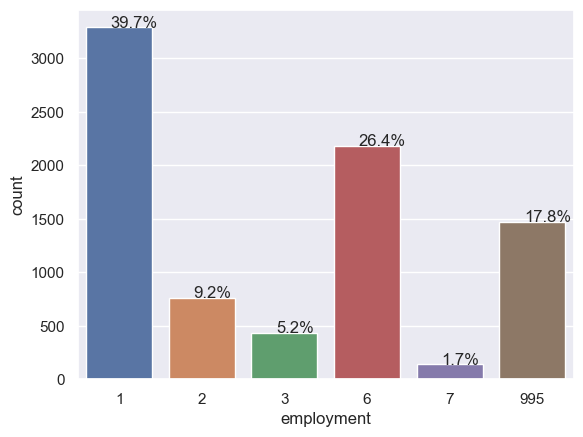

In [18]:
count_plot_percentage(data, 'employment')

* Most of the people are full-time paid employees
* Quarter of people aren't currently employed (e.g., retired, looking for work)
* Very few of people are volunteers or interns

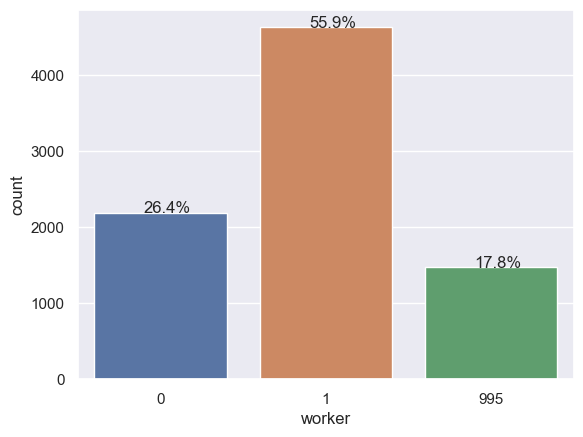

In [19]:
count_plot_percentage(data, 'worker')

* 55.9% of people are employed. Almost the half
* almost quarter of people aren't employed

In [20]:
data['jobs_count'].value_counts()

 995     5924
 1       2031
 2        231
 3         57
 6         17
-9998      15
 4          8
 5          3
Name: jobs_count, dtype: int64

In [21]:
data['job_type'].value_counts()

 995     5924
 1       1627
 2        497
 3        135
 4         88
-9998      15
Name: job_type, dtype: int64

Most usual work location for people is **one** work location, regardless of being a telework or onsite

In [22]:
data['industry'].value_counts().sort_values(ascending=False)

 995     5924
 8        337
 7        298
 18       247
 4        221
 1        211
 14       167
 16       129
 10       128
 15       124
 9        100
 12        91
 5         87
 17        60
 2         60
 13        43
 11        28
-9998      15
 6         13
 3          3
Name: industry, dtype: int64

* Most of them Missing: Skip logic
* Only 3 of them their work industry is: Capital goods (aerospace & defense, electrical, machinery)
* Most work industry in which people work in is: Health care/social assistance

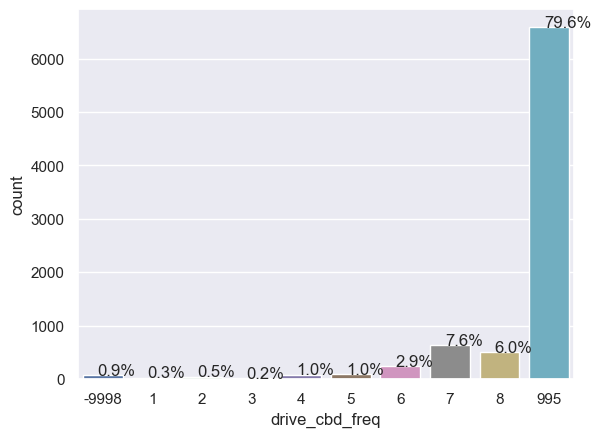

In [23]:
count_plot_percentage(data, 'drive_cbd_freq')

Regardless of 995(Missing: Skip logic), The majority of people who filled out the survey are those with least Frequency of driving vehicle into or within the area of Manhattan south of 60th Street

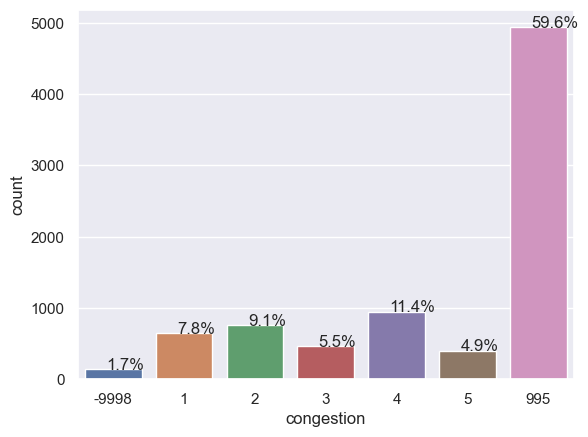

In [24]:
count_plot_percentage(data, 'congestion')

Proportion of people opposing and supporting the congistion almost equal

<AxesSubplot: xlabel='congestion', ylabel='count'>

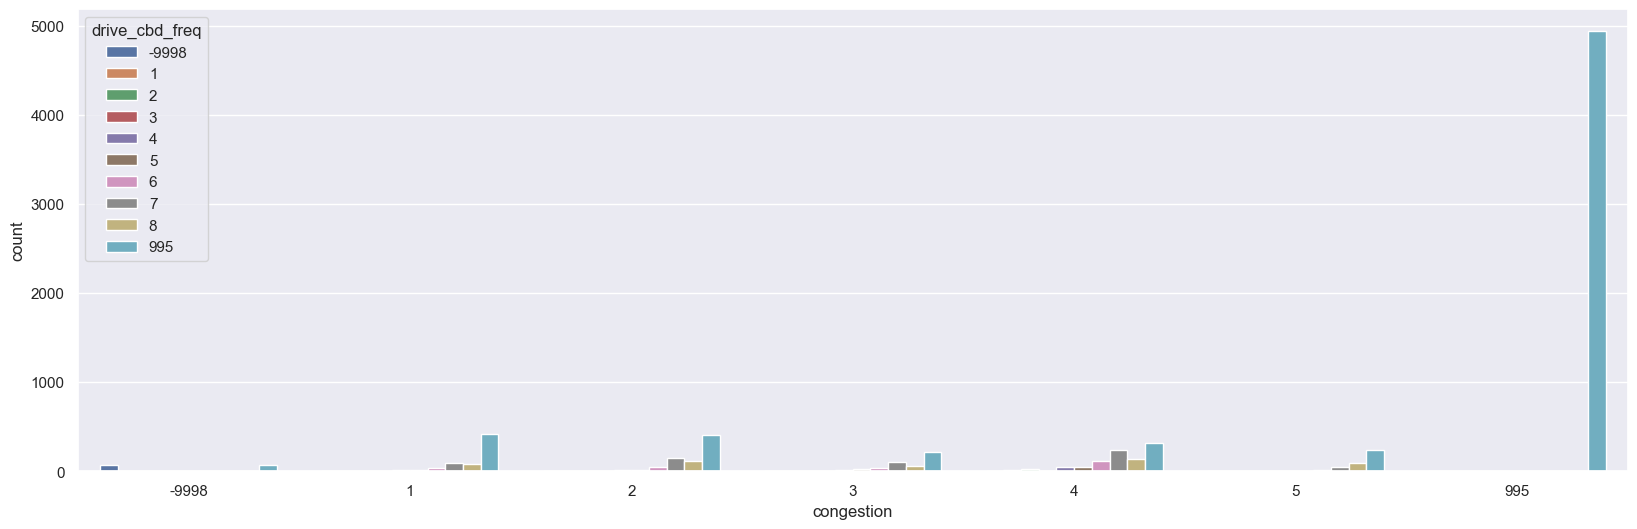

In [25]:
# Observe wheter people's frequency of driving vehicle into or within the area of Manhattan south of 60th Street affects supporting/opposing congesiton
plt.figure(figsize=(20, 6))
sns.countplot(x='congestion', hue='drive_cbd_freq', data=data)

No clear inferences, sounds that people who have never drived into or within Manhattan have alost equal voting with regard to congestion

In [26]:
data.groupby("congestion")["drive_cbd_freq"].value_counts()

congestion  drive_cbd_freq
-9998       -9998               73
             995                65
 1           995               413
             7                  87
             8                  86
             6                  30
             4                   8
             5                   8
             2                   7
             1                   3
             3                   3
 2           995               405
             7                 150
             8                 118
             6                  50
             5                  11
             4                  10
             2                   7
             1                   4
             3                   1
 3           995               218
             7                 107
             8                  61
             6                  37
             5                  19
             4                   9
             1                   3
             2              

Expect that people with more telework frequency support congestion and vice versa, let's detect that

<AxesSubplot: xlabel='telework_freq', ylabel='count'>

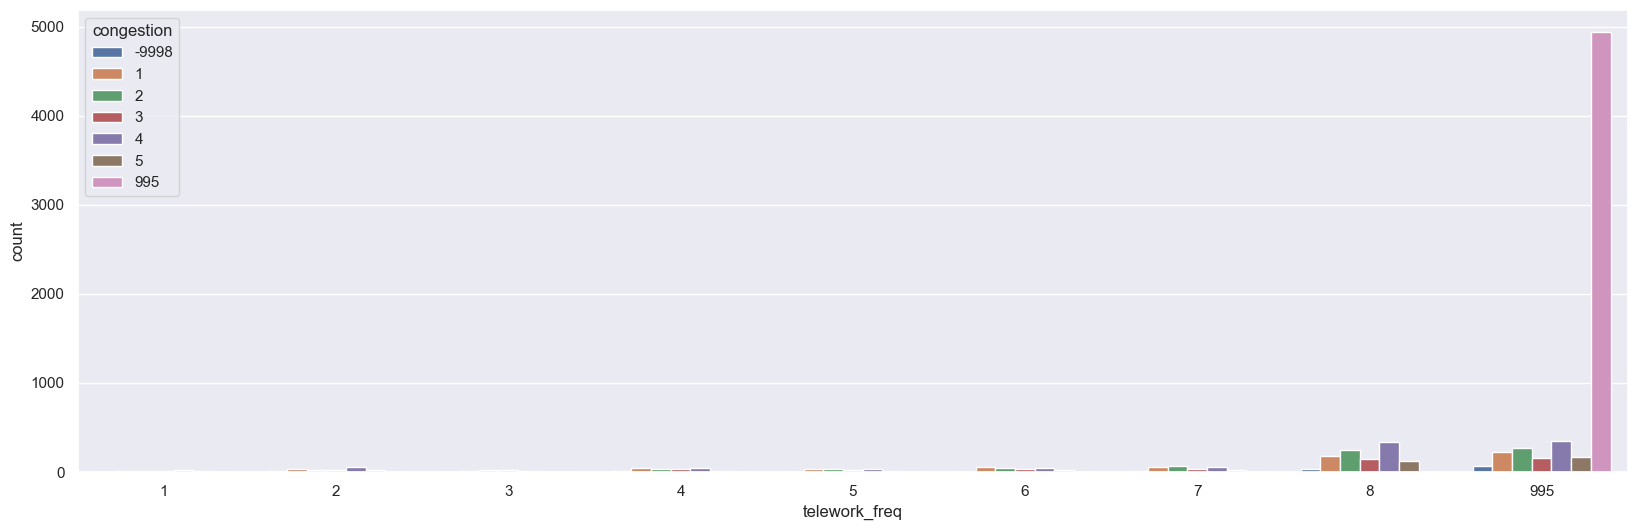

In [27]:
plt.figure(figsize=(20, 6))
sns.countplot(x='telework_freq', hue='congestion', data=data)

besides missing(skip logic), the majority voting is from people with no telework. Appear that most of them highly opposing congestion

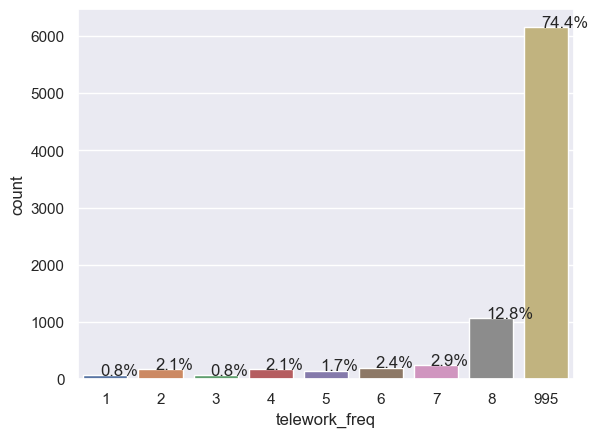

In [28]:
count_plot_percentage(data, 'telework_freq')

As detected from previous plot, majority of them are those with no telework, and missing(skip logic)

In [29]:
data['bike_num_days'].value_counts()

995    7007
0      1090
1        68
2        37
3        30
4        17
5        15
6        12
7        10
Name: bike_num_days, dtype: int64

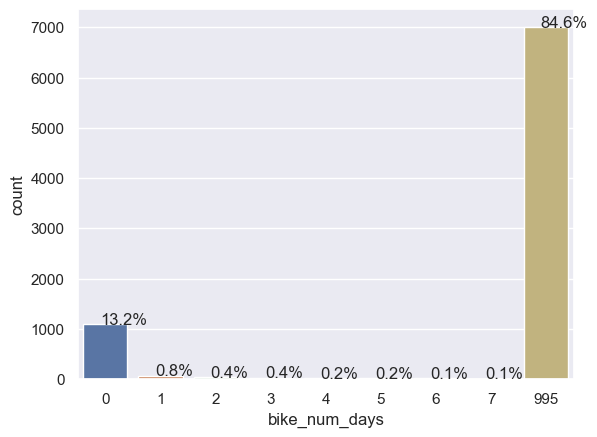

In [30]:
count_plot_percentage(data, 'bike_num_days')

Most of people don't ride a bike The whole week

<AxesSubplot: xlabel='bike_num_days', ylabel='count'>

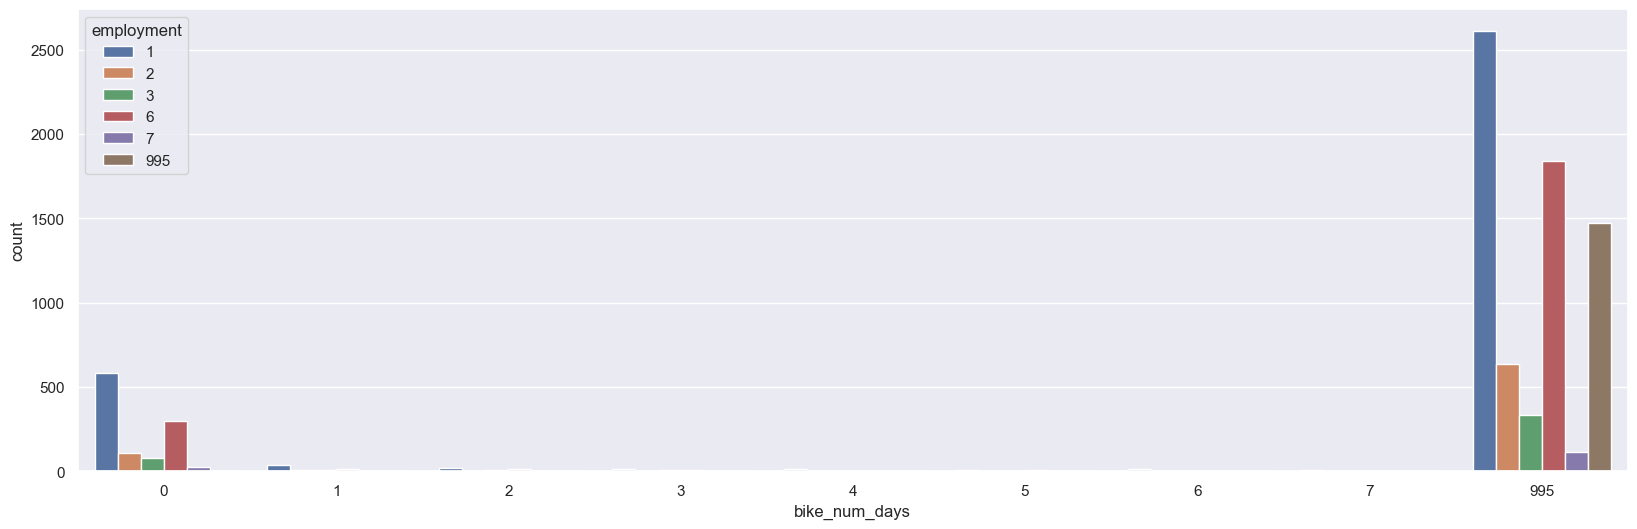

In [31]:
# Detect Bike && unemployed
plt.figure(figsize=(20, 6))
sns.countplot(x='bike_num_days', hue='employment', data=data)

In [32]:
trip_data = data[['hh_id','weight','cms_zone','survey_mode','person_id','person_num','is_participant','num_days','num_days_complete','num_trips','num_walk_trips','num_transit_trips','num_bike_trips','num_taxi_trips','num_tnc_trips','num_complete_weekend_days','num_complete_weekdays','first_travel_date','last_travel_date','made_trips','smartphone_type',
             'relationship','age','employment','worker']]

In [33]:
# Check unique values for each feature
obj = trip_data.nunique()
for key,value in obj.iteritems():
    print(key,",",value)

hh_id , 3346
weight , 2497
cms_zone , 10
survey_mode , 3
person_id , 8286
person_num , 11
is_participant , 2
num_days , 2
num_days_complete , 7
num_trips , 109
num_walk_trips , 68
num_transit_trips , 45
num_bike_trips , 25
num_taxi_trips , 11
num_tnc_trips , 14
num_complete_weekend_days , 3
num_complete_weekdays , 6
first_travel_date , 39
last_travel_date , 40
made_trips , 2
smartphone_type , 5
relationship , 10
age , 11
employment , 6
worker , 3


C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\168939690.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in obj.iteritems():


In [34]:
trip_data.dtypes

hh_id                          int64
weight                       float64
cms_zone                      object
survey_mode                    int64
person_id                      int64
person_num                     int64
is_participant                 int64
num_days                     float64
num_days_complete            float64
num_trips                    float64
num_walk_trips               float64
num_transit_trips            float64
num_bike_trips               float64
num_taxi_trips               float64
num_tnc_trips                float64
num_complete_weekend_days    float64
num_complete_weekdays        float64
first_travel_date             object
last_travel_date              object
made_trips                   float64
smartphone_type                int64
relationship                   int64
age                            int64
employment                     int64
worker                         int64
dtype: object

##### hh_id & person_id will be removed, it provides no extra information about the data
##### first_travel_date and last_travel_date will be removed in this iteration, not clearly understandable yet
##### num_days and num_days_complete won't be included in this iteration, need more information about them

In [35]:
data.drop(['hh_id','person_id','weight','first_travel_date','last_travel_date','num_days','num_days_complete'],axis=1, inplace=True)

##### only data when is_participant equals to 1 will be selected then drop the column, current information: not participant doesn't help in survey information, almost all data is null when is_participant equals to 0 

In [36]:
data_when_is_participant_zero = data[data['is_participant'] == 0]

In [37]:
# check sum of nulls 
obj = data_when_is_participant_zero.isnull().sum()
obj.sort_values(ascending=False)

num_complete_weekend_days     4940
num_taxi_trips                4940
work_park_amount_week         4940
work_park_amount_day          4940
made_trips                    4940
                              ... 
school_vehicle_pass_period       0
school_park_location             0
school_mode_own                  0
school_mode                      0
disability_none                  0
Length: 158, dtype: int64

In [38]:
# data = data[data['is_participant'] == 1]

In [39]:
obj = data.nunique()
for key,value in obj.iteritems():
    print(key,",",value)

cms_zone , 10
survey_mode , 3
person_num , 11
is_participant , 2
num_trips , 109
num_walk_trips , 68
num_transit_trips , 45
num_bike_trips , 25
num_taxi_trips , 11
num_tnc_trips , 14
num_complete_weekend_days , 3
num_complete_weekdays , 6
made_trips , 2
smartphone_type , 5
relationship , 10
age , 11
employment , 6
worker , 3
student , 3
license , 4
vehicle , 10
congestion , 7
drive_cbd_freq , 10
planning_apps , 10
job_type , 6
jobs_count , 8
industry , 20
telework_freq , 9
work_cms_zone , 12
missing_work_location , 2
work_mode , 10
work_mode_own , 5
work_park_location , 6
work_park_pay , 7
work_vehicle_pass_period , 6
work_park_amount_day , 11
work_park_amount_week , 10
work_park_amount_month , 16
work_park_amount_year , 4
work_mode_auto , 6
work_mode_bus , 8
work_mode_rail , 6
work_mode_ferry , 3
work_mode_taxi , 6
work_mode_bike , 5
work_bike_park , 8
work_mode_scooter , 1
work_scooter_park , 1
school_type , 14
school_cms_zone , 10
missing_school_location , 2
kid_accompany , 3
school

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\3930099614.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in obj.iteritems():


##### as a result person_num and relationship feature will be deleted because they have on value

In [40]:
data.drop(['person_num','relationship'],axis=1,inplace=True)

In [41]:
trips_numerical_data = data[['num_trips','num_walk_trips','num_transit_trips','num_bike_trips','num_taxi_trips','num_tnc_trips','num_complete_weekend_days',
                      'num_complete_weekdays']]

In [42]:
trips_numerical_data.describe()

num_trips  num_walk_trips  num_transit_trips  num_bike_trips  \
count  3346.000000     3346.000000        3346.000000     3346.000000   
mean     25.540646       10.004782           5.827555        0.419307   
std      21.900434       12.091553           7.646751        2.141812   
min       0.000000        0.000000           0.000000        0.000000   
25%       4.000000        0.000000           0.000000        0.000000   
50%      24.000000        5.000000           2.000000        0.000000   
75%      41.000000       16.000000          10.000000        0.000000   
max     178.000000       93.000000          57.000000       36.000000   

       num_taxi_trips  num_tnc_trips  num_complete_weekend_days  \
count     3346.000000    3346.000000                3346.000000   
mean         0.111775       0.374776                   1.266886   
std          1.664201       1.181070                   0.843984   
min          0.000000       0.000000                   0.000000   
25%          0.000000       0.000000                   0.000000   
50%          0.000000       0.000000                   2.000000   
75%          0.000000       0.000000                   2.000000   
max         92.000000      18.000000                   2.000000   

       num_complete_weekdays  
count            3346.000000  
mean                3.067244  
std                 1.858192  
min                 0.000000  
25%                 1.000000  
50%                 4.000000  
75%                 5.000000  
max                 5.000000

##### from the frequency matrix -columns features, rows values- 
##### for example count of 1 of survey_mode is the most frequent which means people filled the survey by using rMove (smartphone app)
##### Northern Bronx is the most frequent cms_zone
##### Age values are between 5 and 11, which means 18yo and older
##### most answers from people has iphone mobile 

In [43]:
# display correlation matrix between features
numeric_corr_matrix = trips_numerical_data.corr()
numeric_corr_matrix

num_trips  num_walk_trips  num_transit_trips  \
num_trips                   1.000000        0.685732           0.574478   
num_walk_trips              0.685732        1.000000           0.610044   
num_transit_trips           0.574478        0.610044           1.000000   
num_bike_trips              0.162543        0.116651           0.009034   
num_taxi_trips              0.081621        0.021248           0.015657   
num_tnc_trips               0.187826        0.183317           0.135196   
num_complete_weekend_days   0.494895        0.428865           0.346632   
num_complete_weekdays       0.530072        0.468685           0.380096   

                           num_bike_trips  num_taxi_trips  num_tnc_trips  \
num_trips                        0.162543        0.081621       0.187826   
num_walk_trips                   0.116651        0.021248       0.183317   
num_transit_trips                0.009034        0.015657       0.135196   
num_bike_trips                   1.000000        0.007480       0.062776   
num_taxi_trips                   0.007480        1.000000       0.033284   
num_tnc_trips                    0.062776        0.033284       1.000000   
num_complete_weekend_days        0.090722        0.036010       0.155752   
num_complete_weekdays            0.105136        0.036915       0.166960   

                           num_complete_weekend_days  num_complete_weekdays  
num_trips                                   0.494895               0.530072  
num_walk_trips                              0.428865               0.468685  
num_transit_trips                           0.346632               0.380096  
num_bike_trips                              0.090722               0.105136  
num_taxi_trips                              0.036010               0.036915  
num_tnc_trips                               0.155752               0.166960  
num_complete_weekend_days                   1.000000               0.703968  
num_complete_weekdays                       0.703968               1.000000

##### NaN = no correlation between, they don't affect/change each other, propably going to be deleted --person_num--
##### regardless the change of person_num, num of trips kinds don't change

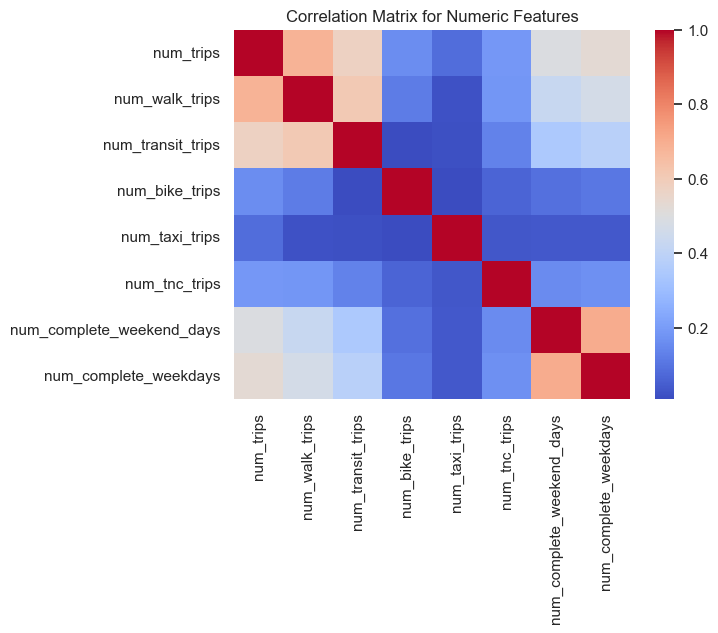

In [44]:
# Plot a correlation matrix for numeric features
sns.heatmap(numeric_corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [45]:
categorical_data = data[['made_trips','smartphone_type','age','cms_zone','survey_mode']]

In [46]:
categorical_data['age'].unique()

array([ 9,  8,  5,  7,  6,  4,  3,  1,  2, 10, 11], dtype=int64)

In [47]:
# dropping age 1 (under 5) // data may be innaccurate
# data.drop(data[data['age'] == 1].index, inplace=True)

##### See Frequency/Count for each value of the categorical features

In [48]:
categorical_frequency = categorical_data.apply(pd.Series.value_counts)
categorical_frequency

made_trips  smartphone_type     age  cms_zone  survey_mode
0.0                      309.0            377.0     NaN       NaN          NaN
1.0                     3037.0           1206.0   405.0       NaN       6495.0
2.0                        NaN           1747.0   871.0       NaN       1538.0
3.0                        NaN             16.0   197.0       NaN        253.0
4.0                        NaN              NaN   795.0       NaN          NaN
5.0                        NaN              NaN  1502.0       NaN          NaN
6.0                        NaN              NaN  1225.0       NaN          NaN
7.0                        NaN              NaN  1186.0       NaN          NaN
8.0                        NaN              NaN  1067.0       NaN          NaN
9.0                        NaN              NaN   696.0       NaN          NaN
10.0                       NaN              NaN   258.0       NaN          NaN
11.0                       NaN              NaN    84.0       NaN          NaN
995.0                      NaN           4940.0     NaN       NaN          NaN
Inner Brooklyn             NaN              NaN     NaN     767.0          NaN
Inner Queens               NaN              NaN     NaN     730.0          NaN
Manhattan Core             NaN              NaN     NaN     542.0          NaN
Middle Queens              NaN              NaN     NaN     835.0          NaN
Northern Bronx             NaN              NaN     NaN    1032.0          NaN
Northern Manhattan         NaN              NaN     NaN     657.0          NaN
Outer Brooklyn             NaN              NaN     NaN     822.0          NaN
Outer Queens               NaN              NaN     NaN     975.0          NaN
Southern Bronx             NaN              NaN     NaN     902.0          NaN
Staten Island              NaN              NaN     NaN    1024.0          NaN

<AxesSubplot: >

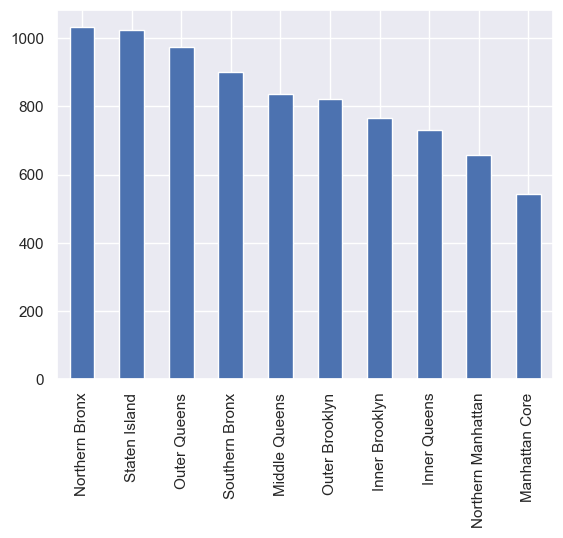

In [49]:
categorical_data['cms_zone'].value_counts().plot(kind='bar')

In [50]:
school_numerical_data = data[['school_park_amount_day','school_park_amount_week','school_park_amount_month','school_park_amount_year']]

In [51]:
school_categorical_data = data[['student','license','vehicle','congestion','school_type','school_cms_zone',
                                       'missing_school_location','kid_accompany','school_mode','school_mode_own','school_park_location',
                                       'school_vehicle_pass_period', 'school_mode_auto', 'school_mode_bus','school_mode_rail', 'school_mode_ferry', 'school_access',
                                       'school_egress', 'school_mode_taxi', 'school_mode_bike','school_bike_park', 'school_mode_scooter', 'school_scooter_park']]

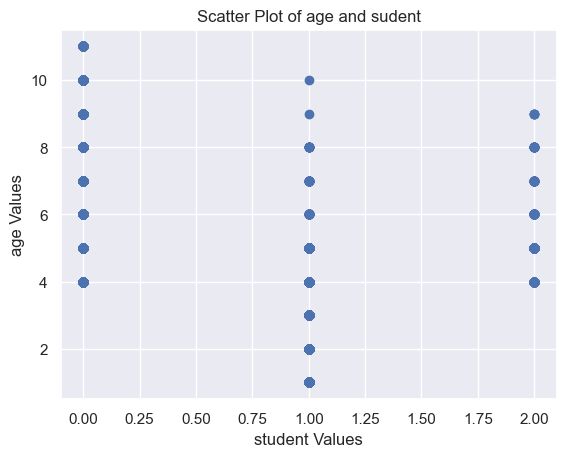

In [52]:
# Plot a scatter plot of two features
plt.scatter(data['student'], data['age'])
plt.title('Scatter Plot of age and sudent')
plt.xlabel('student Values')
plt.ylabel('age Values')
plt.show()

In [53]:
data[data['student'] == 1]['age'].unique()

array([ 5,  3,  1,  2,  4,  6,  7,  8,  9, 10], dtype=int64)

In [54]:
data.loc[data['student'] == 1]['age'].unique()

array([ 5,  3,  1,  2,  4,  6,  7,  8,  9, 10], dtype=int64)

#### from the plot
##### not students age varies between 4(18-24) and 11(85 or older)
##### full time student age varies between 1(Under 5) //dropped and 10(75-84)
##### half-time student age varies between 4(18-24) and 9(65-74)

<AxesSubplot: >

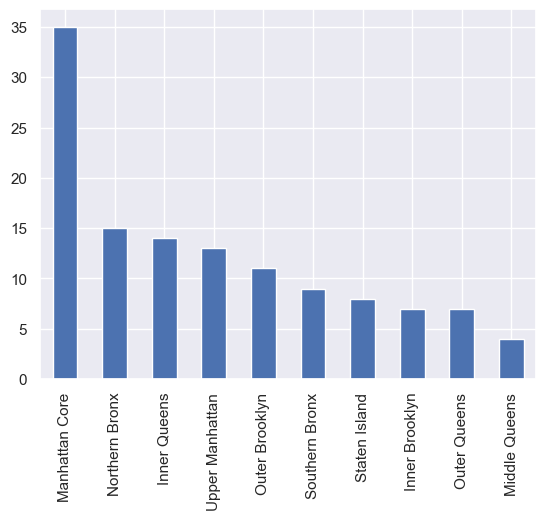

In [55]:
school_categorical_data['school_cms_zone'].value_counts().plot(kind='bar')

##### Manhattan Core has the highest number of school

<AxesSubplot: >

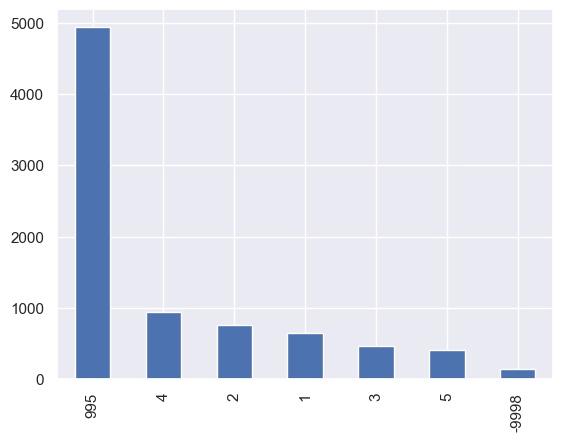

In [56]:
school_categorical_data['congestion'].value_counts().plot(kind='bar')

##### high number of people don't agree with the policy of congestion pricing (4)

In [57]:
school_numerical_data.describe()

school_park_amount_day  school_park_amount_week  \
count                7.000000                 5.000000   
mean                 7.892857                21.050000   
std                  6.177677                28.202615   
min                  0.250000                 0.250000   
25%                  3.000000                 4.000000   
50%                  8.000000                15.000000   
75%                 12.500000                16.000000   
max                 16.000000                70.000000   

       school_park_amount_month  school_park_amount_year  
count                  8.000000                 8.000000  
mean                  23.781250               128.156250  
std                   21.036294               161.335882  
min                    0.250000                 0.250000  
25%                   12.250000                12.250000  
50%                   18.000000                53.000000  
75%                   31.250000               212.500000  
max                   60.000000               450.000000

In [58]:
# display correlation matrix between features
numeric_corr_matrix = school_numerical_data.corr()
numeric_corr_matrix

school_park_amount_day  school_park_amount_week  \
school_park_amount_day                       1.0                      1.0   
school_park_amount_week                      1.0                      1.0   
school_park_amount_month                     1.0                      1.0   
school_park_amount_year                      1.0                      1.0   

                          school_park_amount_month  school_park_amount_year  
school_park_amount_day                         1.0                      1.0  
school_park_amount_week                        1.0                      1.0  
school_park_amount_month                       1.0                      1.0  
school_park_amount_year                        1.0                      1.0

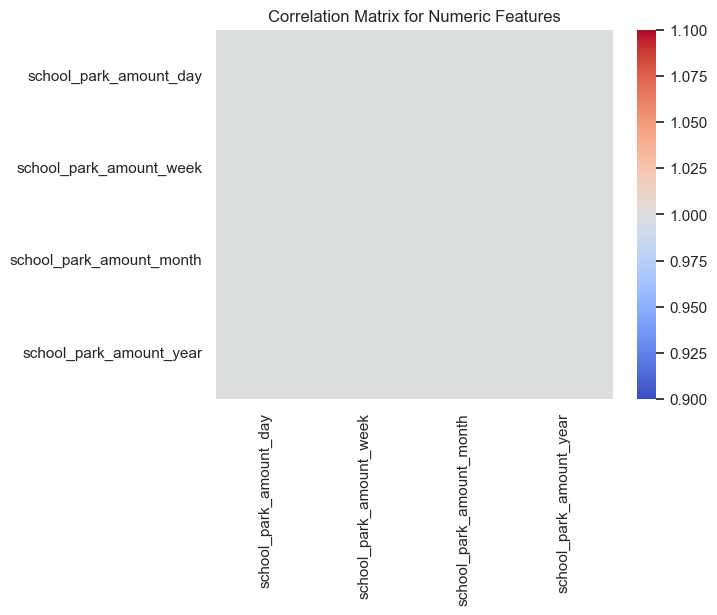

In [59]:
# Plot a correlation matrix for numeric features
sns.heatmap(numeric_corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

##### Strong Correlated

In [60]:
harassment_data = data[['harassment','harassment_private_car', 'harassment_alone', 'harassment_attention',
       'harassment_defense', 'harassment_other', 'harassment_none', 'gender',
       'education', 'english_proficiency', 'ethnicity', 'race_american_indian',
       'race_asian', 'race_black', 'race_native_hawaiian', 'race_white',
       'race_other', 'disability_hearing', 'disability_seeing',
       'disability_walking', 'disability_mobility', 'disability_dressing',
       'disability_concentrating', 'disability_none']]

<AxesSubplot: >

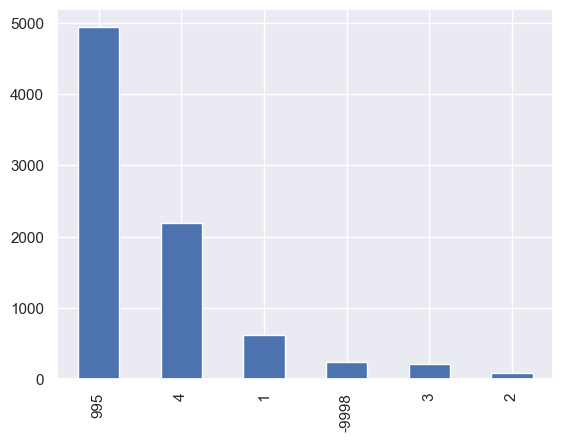

In [61]:
harassment_data['harassment'].value_counts().plot(kind='bar')

##### most haven't seen or experienced harassment (4)

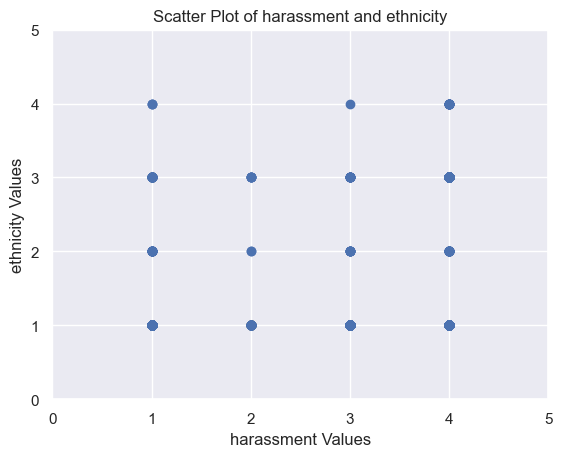

In [62]:
# Plot a scatter plot of two features
plt.scatter(harassment_data['harassment'], harassment_data['ethnicity'])
plt.title('Scatter Plot of harassment and ethnicity')
plt.xlabel('harassment Values')
plt.ylabel('ethnicity Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### all have seen and/or experienced harassment, and mexican people seem to experience it the most

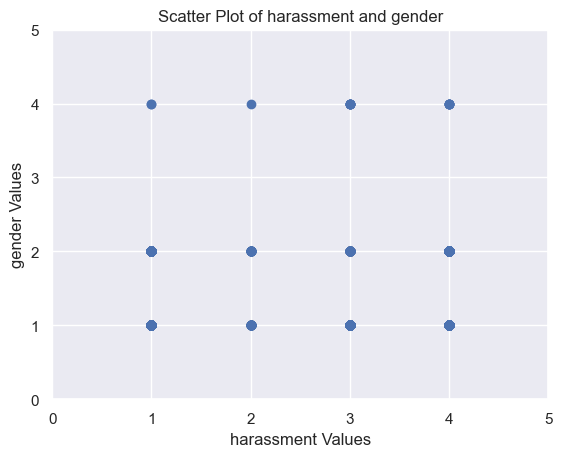

In [63]:
plt.scatter(harassment_data['harassment'], harassment_data['gender'])
plt.title('Scatter Plot of harassment and gender')
plt.xlabel('harassment Values')
plt.ylabel('gender Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### all genders are equal

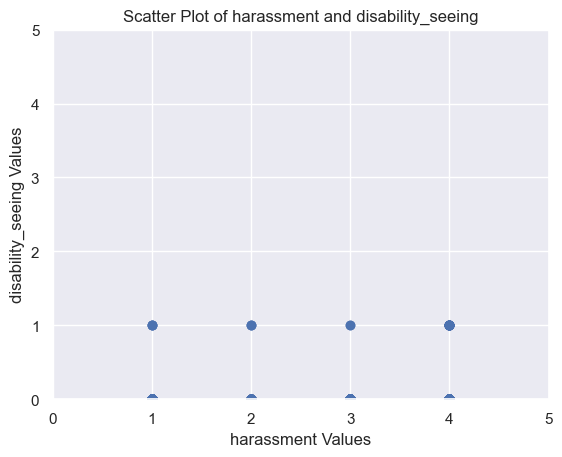

In [64]:
plt.scatter(harassment_data['harassment'], harassment_data['disability_seeing'])
plt.title('Scatter Plot of harassment and disability_seeing')
plt.xlabel('harassment Values')
plt.ylabel('disability_seeing Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### disabilities doesn't really affect

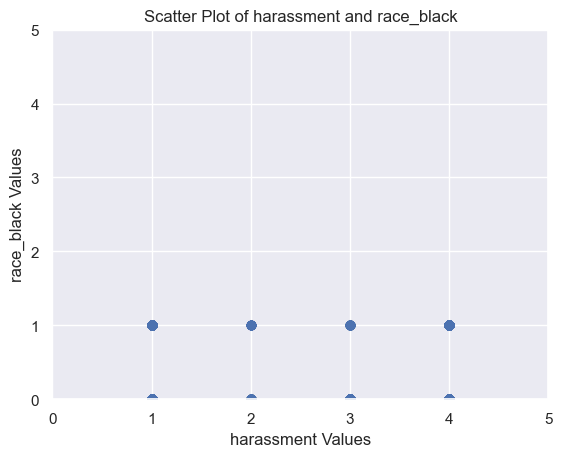

In [65]:
plt.scatter(harassment_data['harassment'], harassment_data['race_black'])
plt.title('Scatter Plot of harassment and race_black')
plt.xlabel('harassment Values')
plt.ylabel('race_black Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### black or other doesn't affect

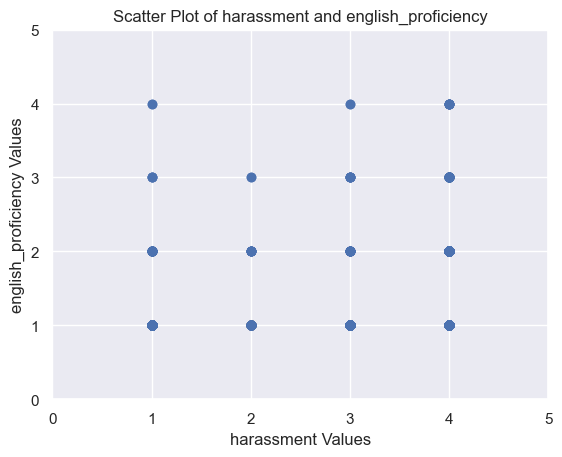

In [66]:
plt.scatter(harassment_data['harassment'], harassment_data['english_proficiency'])
plt.title('Scatter Plot of harassment and english_proficiency')
plt.xlabel('harassment Values')
plt.ylabel('english_proficiency Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### who speaks english well got harassment

In [67]:
package_data = data[['packages','packages_distance']]

In [68]:
package_frequency = package_data.apply(pd.Series.value_counts)
package_frequency

packages  packages_distance
-9998       234                NaN
 1          696               44.0
 2         1283               98.0
 3          312              161.0
 4          163               93.0
 5          152               29.0
 6          150               40.0
 7          163                NaN
 8          193                NaN
 995       4940             7821.0

<AxesSubplot: >

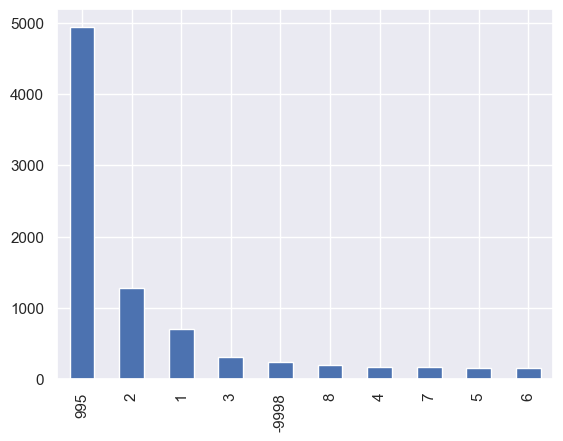

In [69]:
package_data['packages'].value_counts().plot(kind='bar')

#### most people recieve their packages at their doorsteps

<AxesSubplot: >

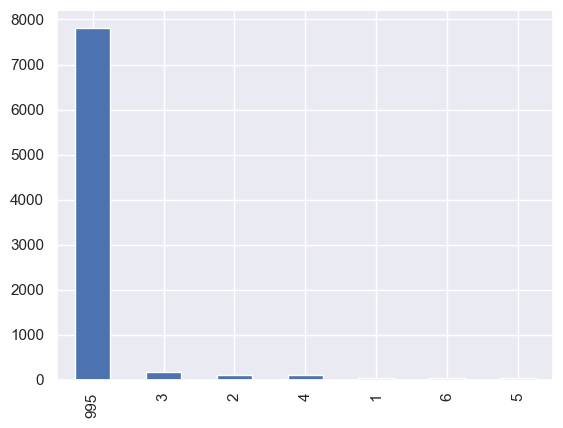

In [70]:
package_data['packages_distance'].value_counts().plot(kind='bar')

#### most people move 3 blocks away ((around neighbourhood)) to get their packages 
###### 1 block = 15 meters

In [71]:
numerical_data= pd.concat([trips_numerical_data,school_numerical_data],axis=1)

In [72]:
numerical_data['school_park_amount_year'].unique()

array([    nan, 9.0e+01, 4.5e+02, 2.5e+02, 2.0e+02, 2.5e-01, 4.0e+00,
       1.6e+01, 1.5e+01])

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


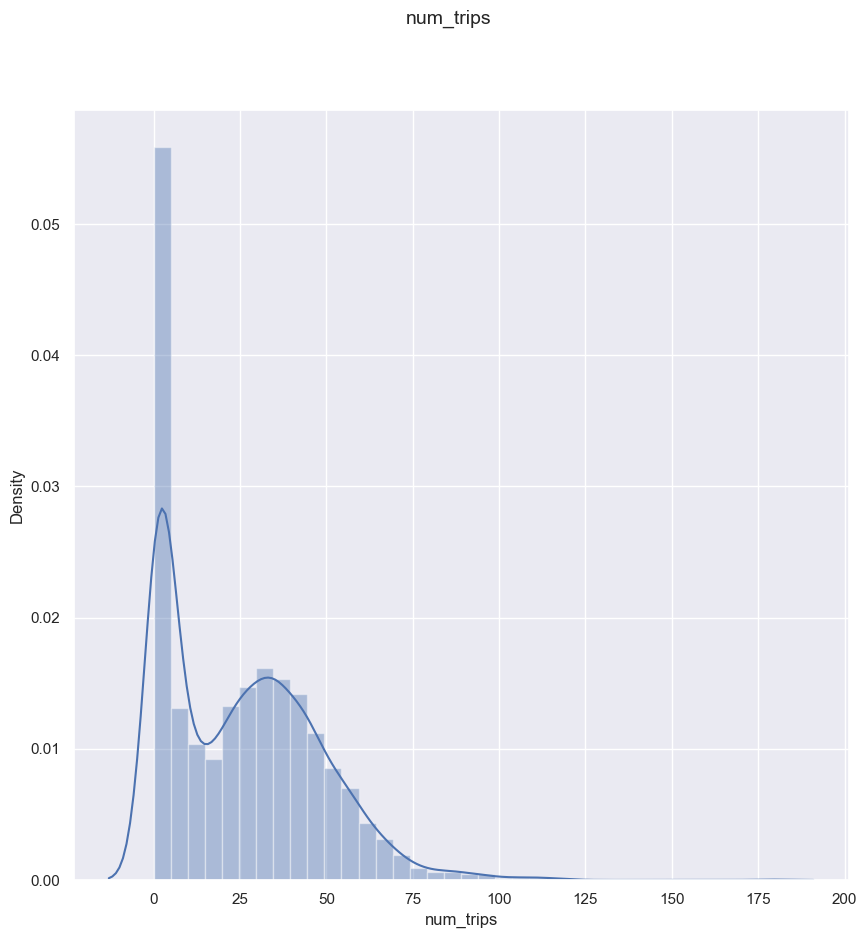

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


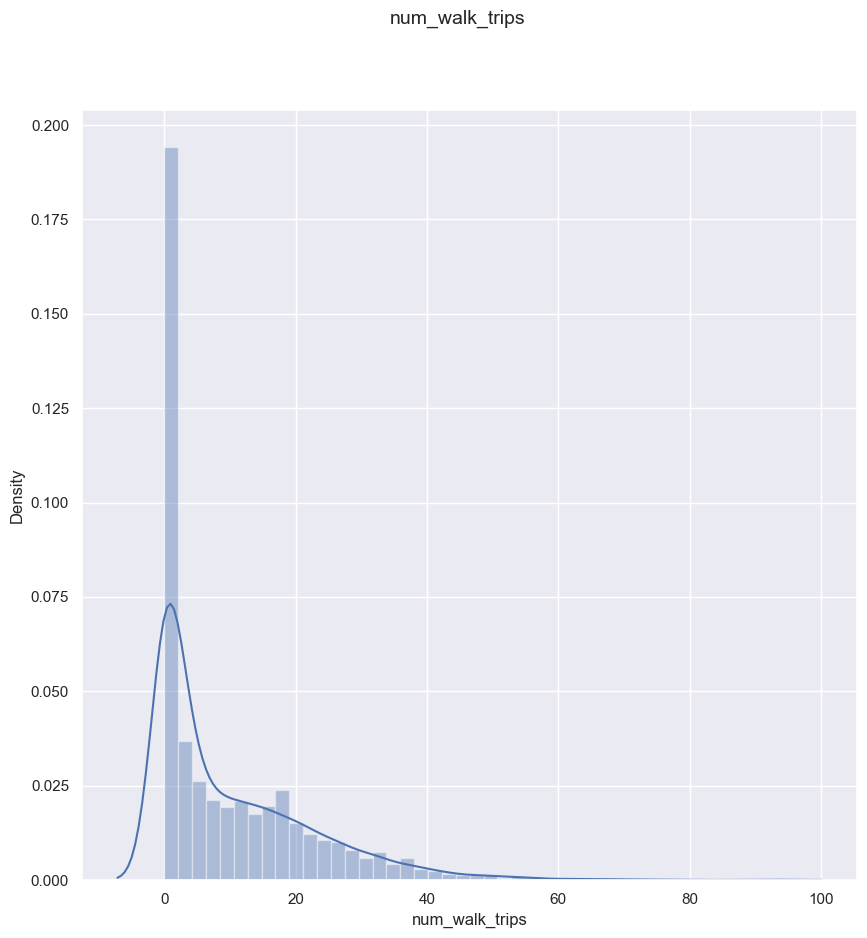

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


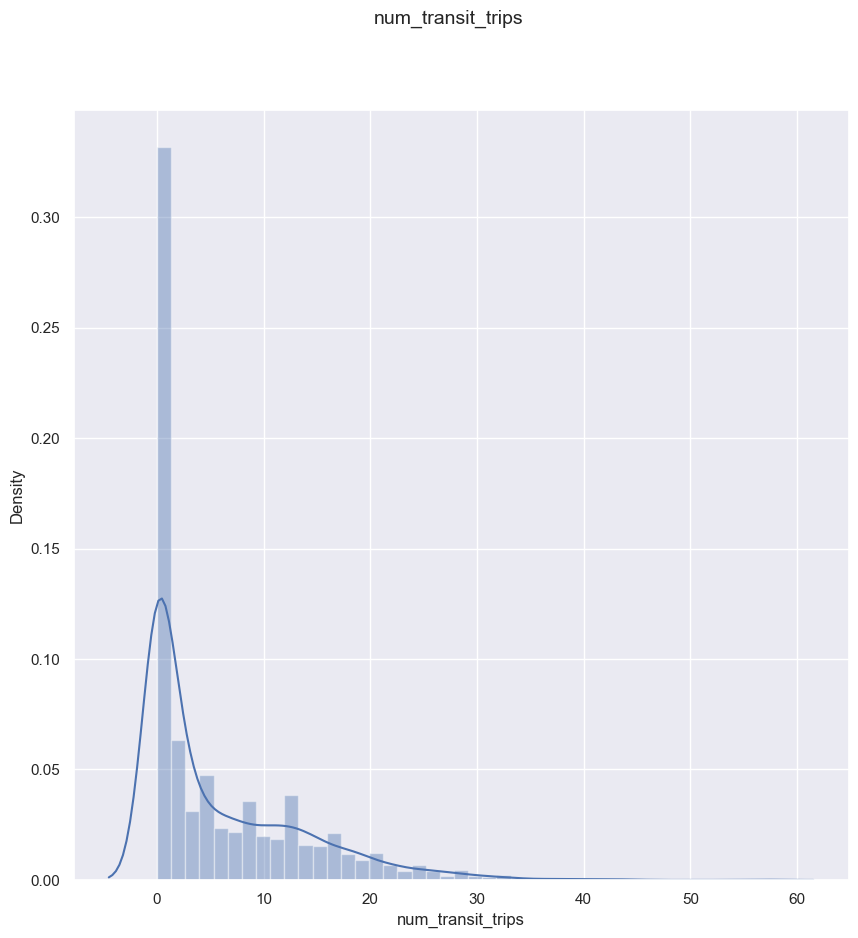

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


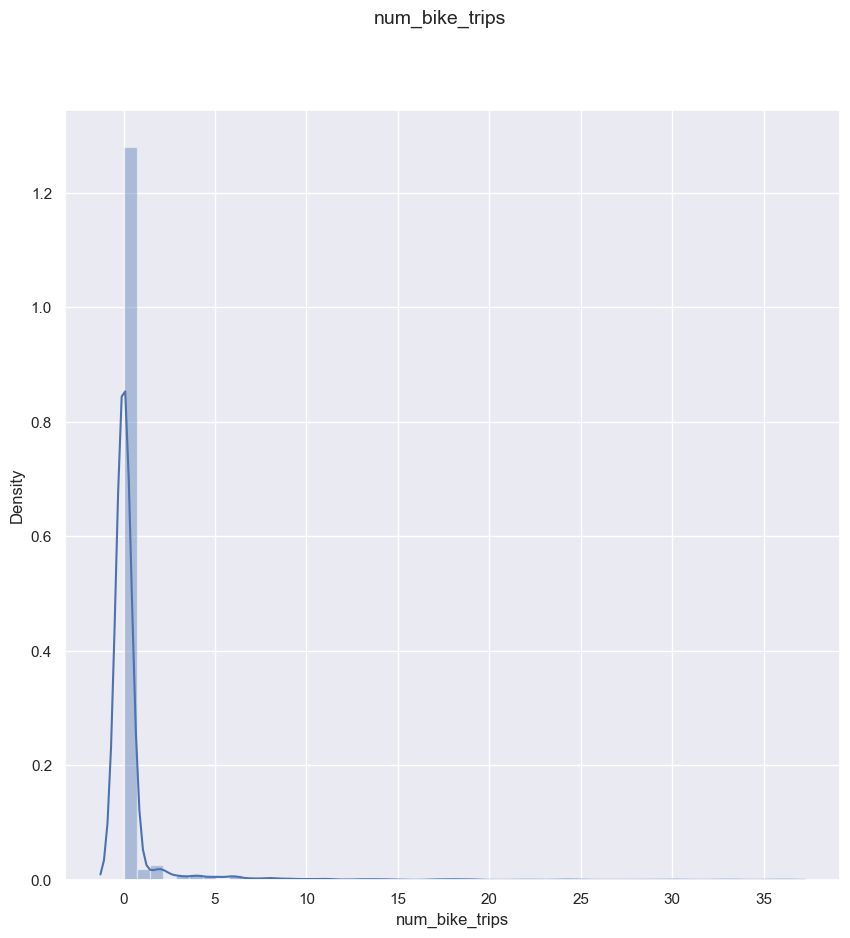

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


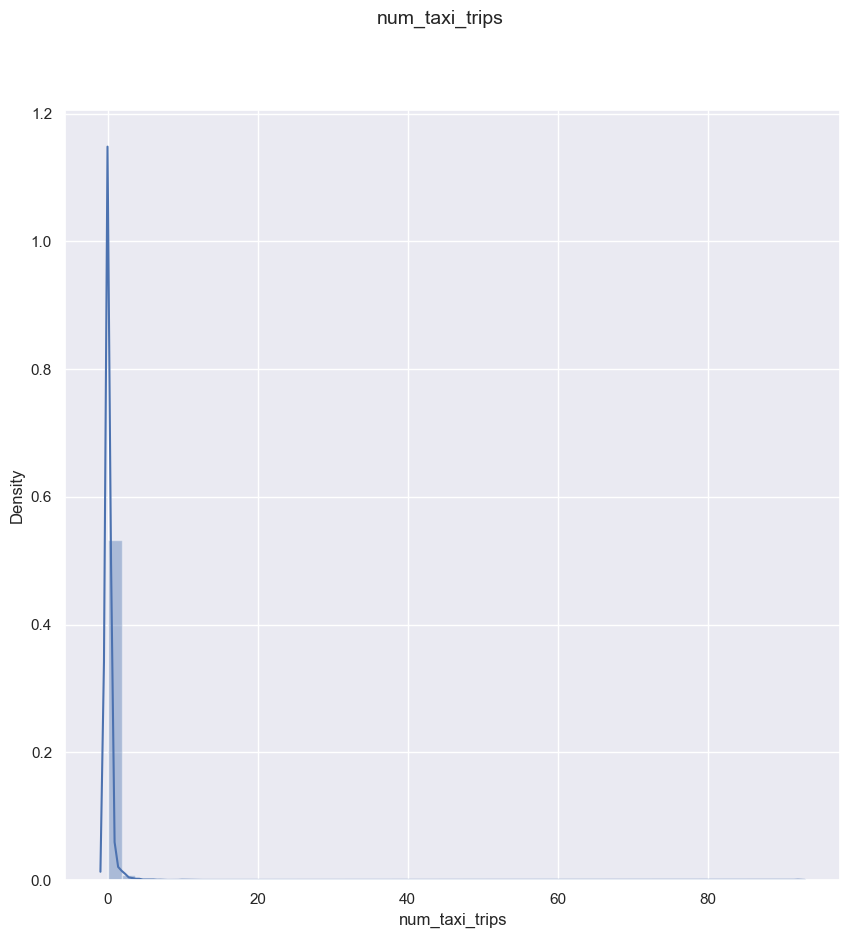

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


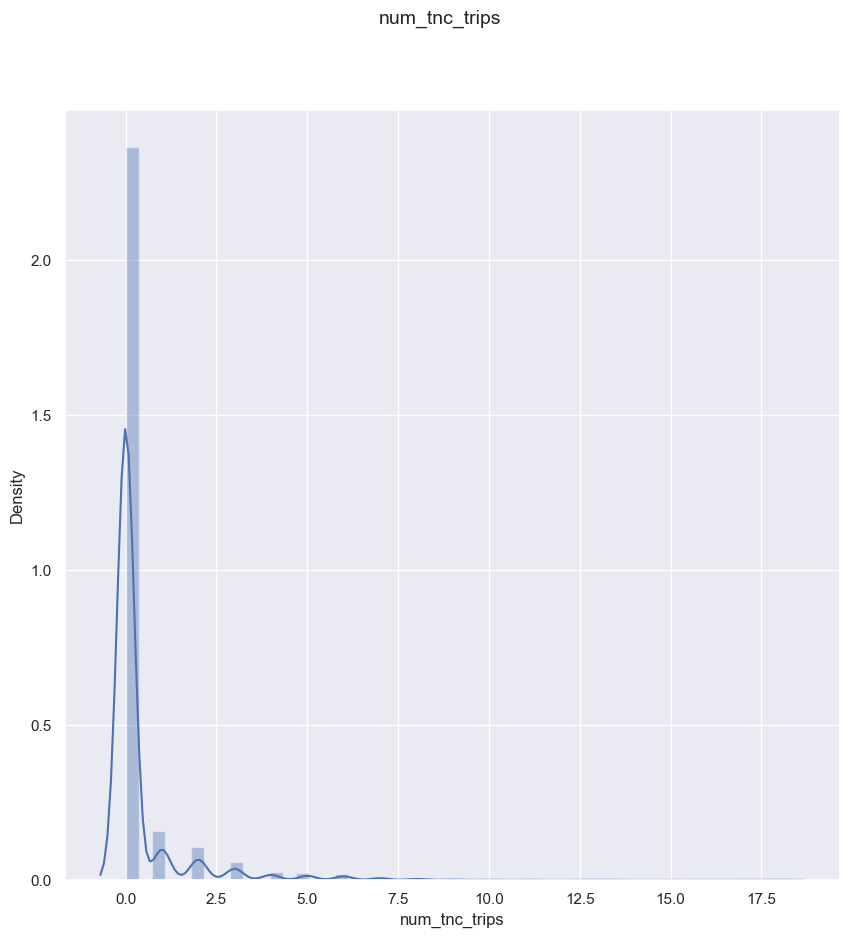

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


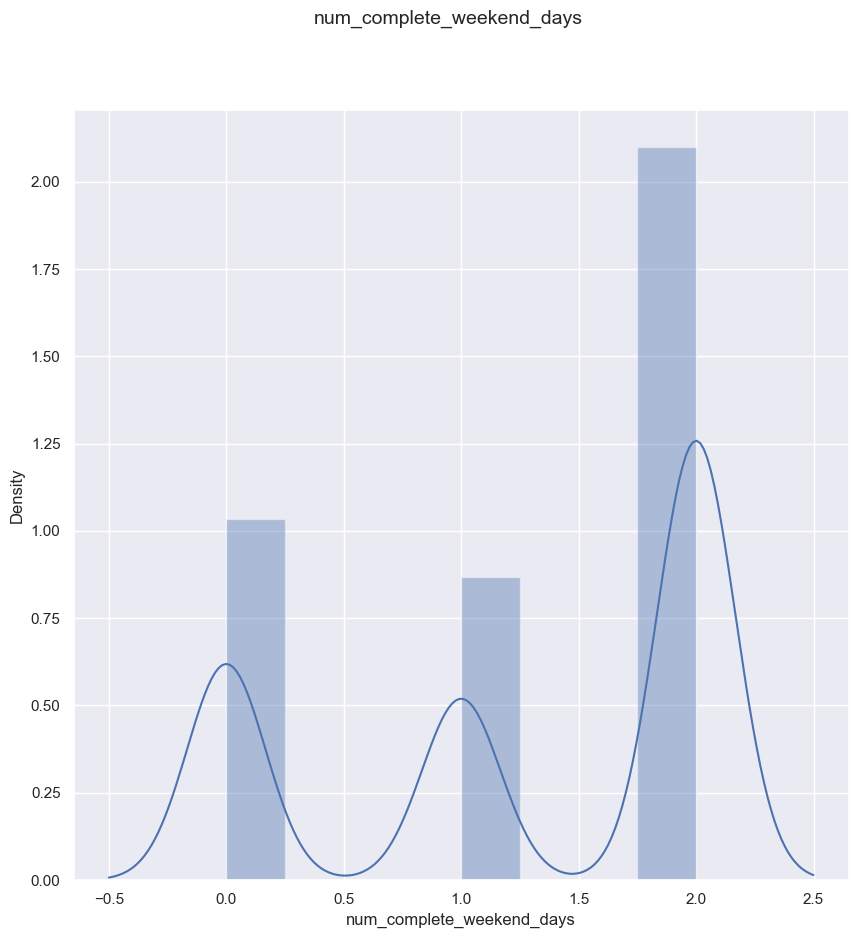

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


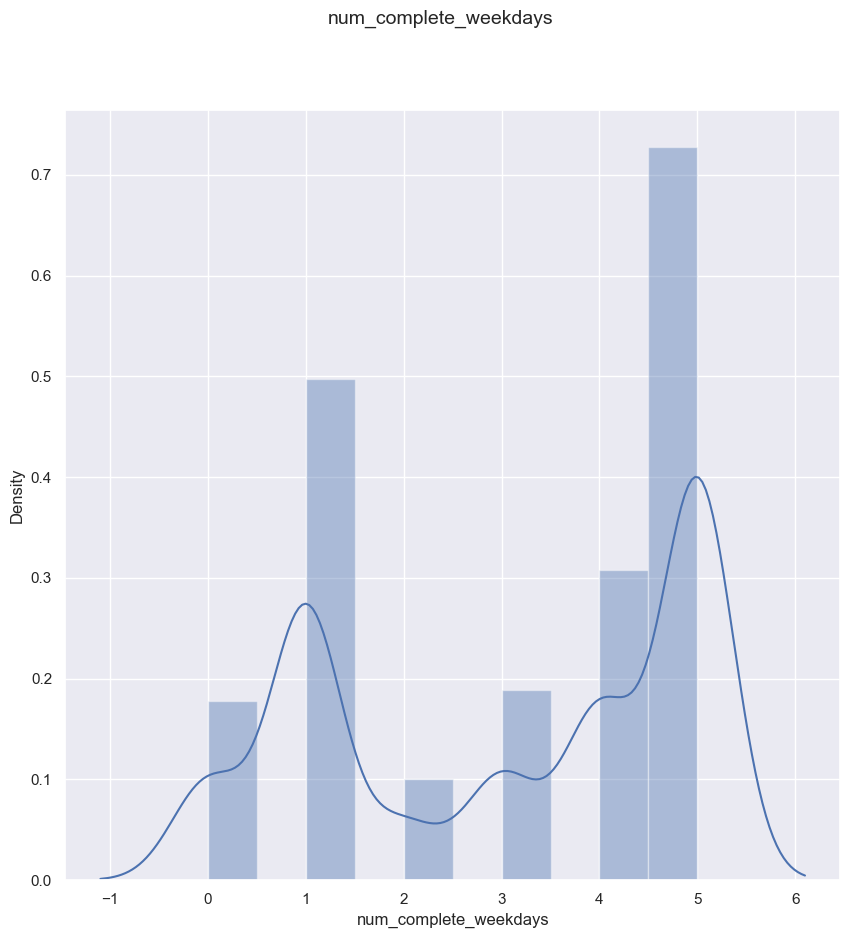

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


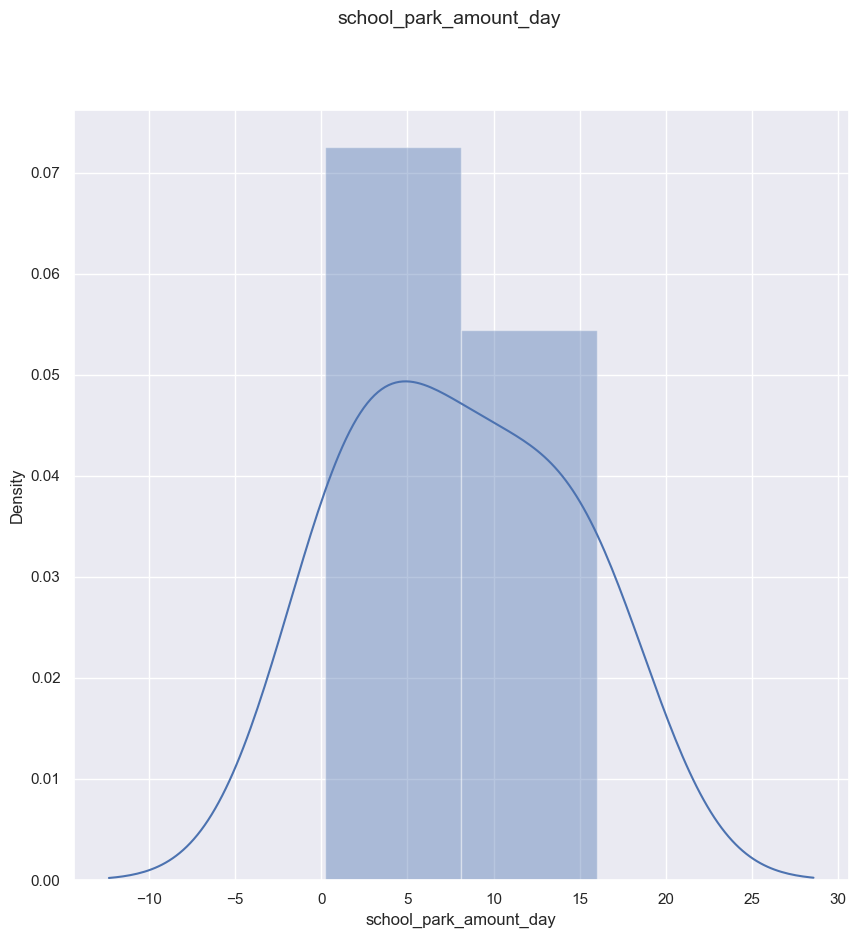

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


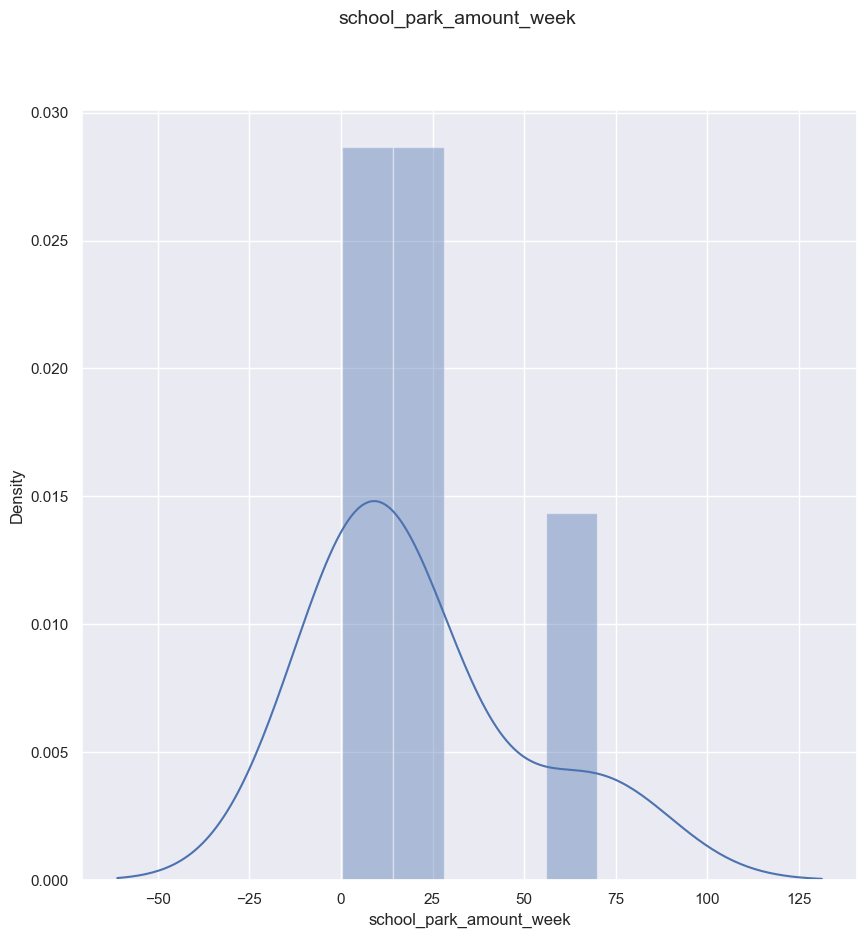

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


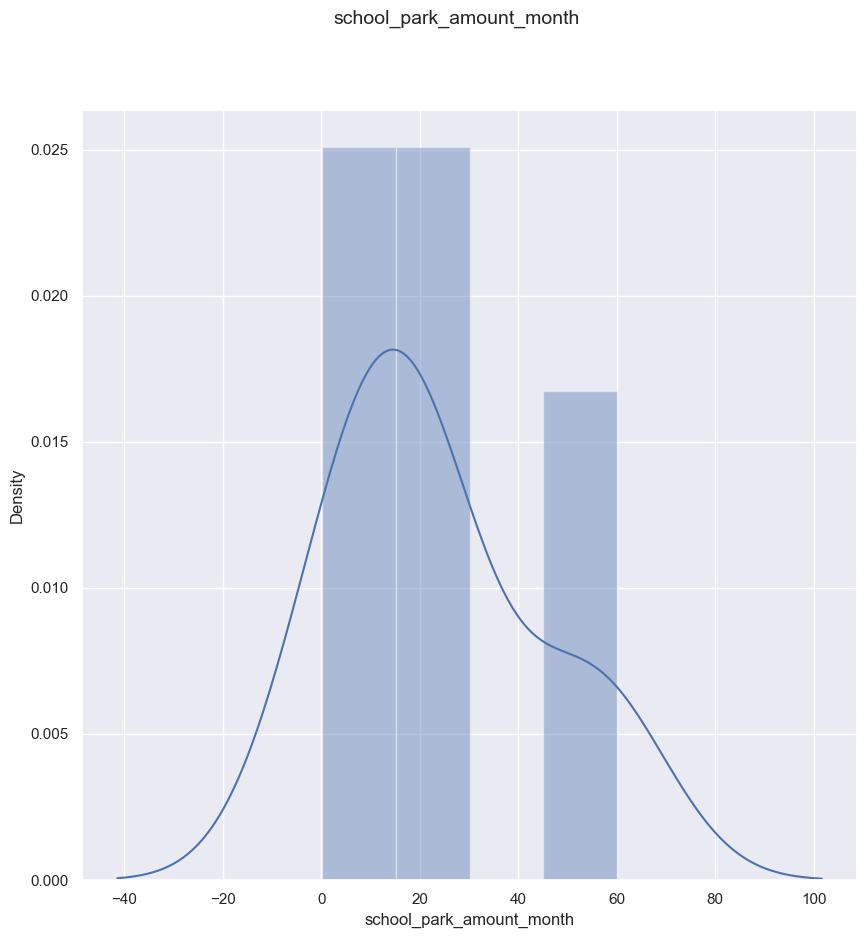

C:\Users\DELL\AppData\Local\Temp\ipykernel_22060\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


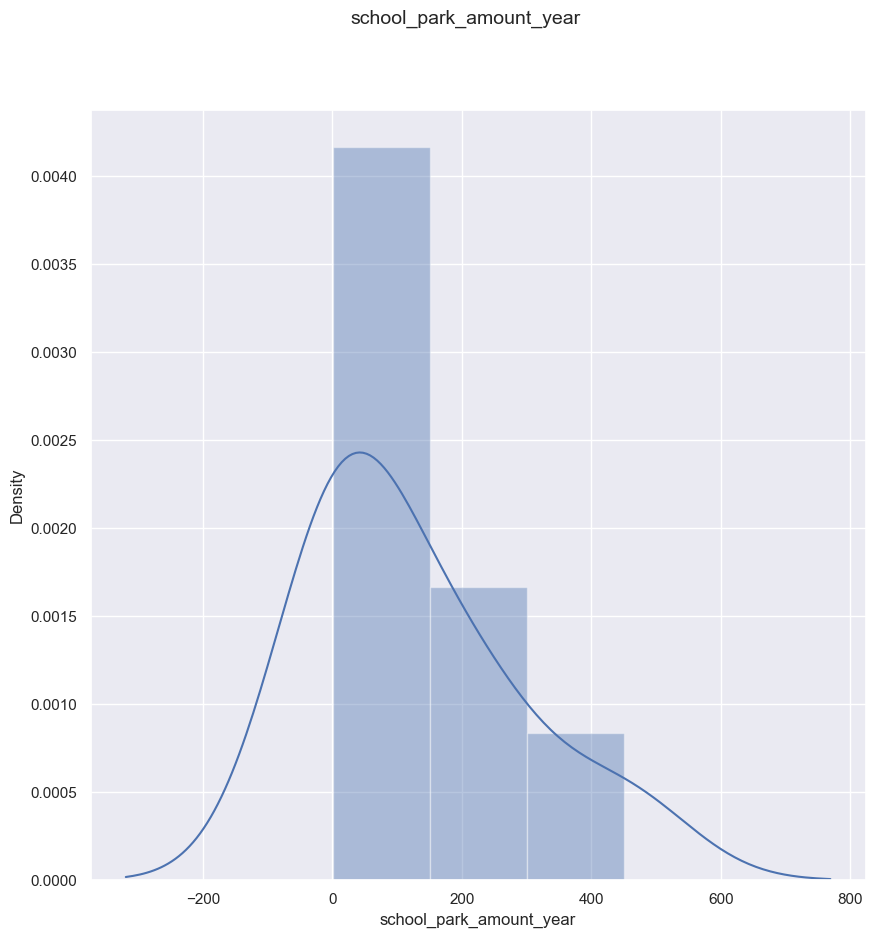

In [73]:
def plots_(data,feature): 
        fig, ax = plt.subplots(1, figsize=(10,10), sharey=True)
        fig.suptitle(feature, fontsize=14)
        sns.distplot(data[feature], ax=ax)
        plt.show()

for column in numerical_data:
    feature=plots_(numerical_data, column)

# Missing Values

convert the -9998 value to NaN to handle it also with missing values

In [74]:
for column in data.columns:
    data[column] = data[column].replace(-9998,np.nan)
    data[column] = data[column].replace("-9998",np.nan)

compute the percentage of null values of each column

In [75]:
null_percentage = data.isna().sum().apply(lambda x:x/data.shape[0]*100).sort_values(ascending=False)[data.isna().sum()>0] 

<AxesSubplot: >

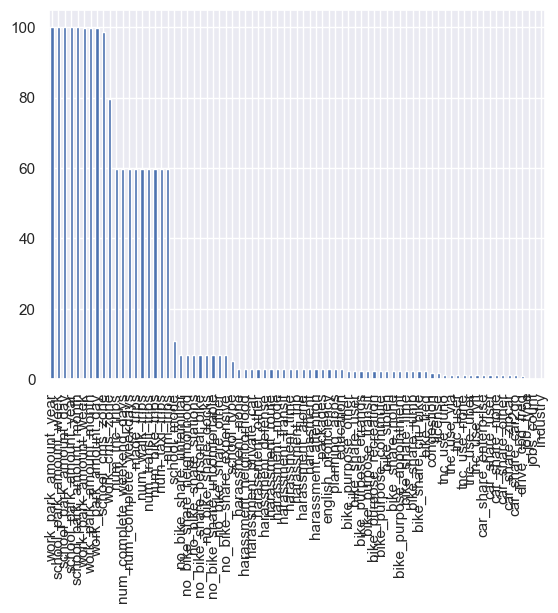

In [76]:
null_percentage.plot(kind='bar')

remove any column have more than 50% NULL

In [77]:
print(f"before Remove  {data.shape}")
data.drop(columns=null_percentage[null_percentage>50].index.to_list(),inplace=True)
print(f"after Remove  {data.shape}")


before Remove  (8286, 156)
after Remove  (8286, 137)


for the rest we will remove any row have null value

In [78]:
print(f"before Remove  {data.shape}")
data = data.dropna(axis=0)
print(f"after Remove  {data.shape}")

before Remove  (8286, 137)
after Remove  (6728, 137)


remove any row have is_participant value not 1 becouse all the rest of the values are null

In [79]:
print(f"before Remove  {data.shape}")
data = data[data["is_participant"]==1]
print(f"after Remove  {data.shape}")

before Remove  (6728, 137)
after Remove  (2692, 137)


# Encoding Features

In [80]:
with open("data/columns_encoding.json") as file:
    columns_dictionary = json.loads(file.read()) # read the file as string and convert it to dictionary

In [81]:
columns_dictionary

{'survey_mode': {'1': 'rMove',
  '2': 'rSurvey',
  '3': 'Call center',
  '995': 'skip logic'},
 'is_participant': {'0': 'Not selected', '1': 'Selected', '995': 'skip logic'},
 'made_trips': {'0': 'Not selected', '1': 'Selected', '995': 'skip logic'},
 'relationship': {'0': 'Self',
  '1': 'Spouse or partner',
  '2': 'Son or daughter',
  '3': 'Father or mother',
  '4': 'Brother or sister',
  '5': 'Other relative',
  '6': 'Roommate or friend',
  '7': 'Household help',
  '995': 'skip logic'},
 'age': {'1': 'Under 5',
  '2': '5-15',
  '3': '16-17',
  '4': '18-24',
  '5': '25-34',
  '6': '35-44',
  '7': '45-54',
  '8': '55-64',
  '9': '65-74',
  '10': '75-84',
  '11': '85 or older',
  '995': 'skip logic'},
 'employment': {'1': 'Employed full-time',
  '2': 'Employed part-time',
  '3': 'Primarily self-employed',
  '6': 'Not currently employed',
  '7': 'Unpaid volunteer or intern',
  '995': 'skip logic'},
 'worker': {'0': 'Not employed', '1': 'Employed', '995': 'skip logic'},
 'student': {'0': 

for each column_name in the dictionary encode the data using the dictionary values to create one_hot_encoding

In [82]:
#TODO: LabelEncoder for ordinal data, s.t. Age

In [83]:
#TODO: OHE 'cms_zone' feature

In [84]:
for column_name in columns_dictionary:
    data = one_hot_encoding(data=data,column=column_name,dictionary=columns_dictionary[column_name])

In [85]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('uint8')],
      dtype=object)

In [86]:
data.select_dtypes(include='object').columns # will handle it later

Index(['cms_zone'], dtype='object')

select numberic features only to apply kmeans on them

In [87]:
numeric_fetures = data.select_dtypes(include=np.number).columns.tolist()
data_numeric = data[numeric_fetures]
data_numeric.shape

(2692, 285)

apply Standard Scaler on the Data

In [88]:
data_numeric_standarized = StandardScaler().fit_transform(data_numeric)
data_numeric_standarized = pd.DataFrame(data_numeric_standarized, columns = data_numeric.columns)
data_numeric_standarized.head()
# data_numeric_standarized = data_numeric

smartphone_type  jobs_count  bike_num_days  survey_mode_Call center  \
0        -0.507334    1.449614      -1.182246                -0.252213   
1         0.873600   -0.690243      -1.186326                -0.252213   
2         0.873600   -0.690243      -1.186326                -0.252213   
3         0.873600   -0.690243      -1.176126                -0.252213   
4        -0.507334   -0.688090       0.843432                -0.252213   

   survey_mode_rMove  survey_mode_rSurvey  is_participant_Selected  age_18-24  \
0           0.679305            -0.586502                      0.0  -0.274007   
1           0.679305            -0.586502                      0.0  -0.274007   
2           0.679305            -0.586502                      0.0  -0.274007   
3           0.679305            -0.586502                      0.0  -0.274007   
4           0.679305            -0.586502                      0.0  -0.274007   

   age_25-34  age_35-44  ...  disability_walking_Not selected  \
0   1.998608  -0.491045  ...                         0.402302   
1   1.998608  -0.491045  ...                         0.402302   
2  -0.500348  -0.491045  ...                         0.402302   
3   1.998608  -0.491045  ...                         0.402302   
4   1.998608  -0.491045  ...                         0.402302   

   disability_walking_Selected  disability_mobility_Not selected  \
0                    -0.284824                          0.297584   
1                    -0.284824                          0.297584   
2                    -0.284824                          0.297584   
3                    -0.284824                          0.297584   
4                    -0.284824                          0.297584   

   disability_mobility_Selected  disability_dressing_Not selected  \
0                     -0.131851                          0.284824   
1                     -0.131851                          0.284824   
2                     -0.131851                          0.284824   
3                     -0.131851                          0.284824   
4                     -0.131851                          0.284824   

   disability_dressing_Selected  disability_concentrating_Not selected  \
0                     -0.104355                               0.314999   
1                     -0.104355                               0.314999   
2                     -0.104355                               0.314999   
3                     -0.104355                               0.314999   
4                     -0.104355                               0.314999   

   disability_concentrating_Selected  disability_none_Not selected  \
0                          -0.163393                      -0.36141   
1                          -0.163393                      -0.36141   
2                          -0.163393                      -0.36141   
3                          -0.163393                      -0.36141   
4                          -0.163393                      -0.36141   

   disability_none_Selected  
0                  0.468191  
1                  0.468191  
2                  0.468191  
3                  0.468191  
4                  0.468191  

[5 rows x 285 columns]

# Hyper Parameter Tuning

finding the optimal k using elbow

In [89]:
result = []
potential_k = list(range(2, 21))
for k in potential_k:
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(data_numeric_standarized)
  result.append(kmeans.inertia_)

In [90]:
result[1:5]

[693670.890481632, 672720.1143265598, 662018.8903299607, 651835.6077107249]

In [91]:
optimal_k_elbow = result[1:5].index(min(result[1:5]))+1

finding the optimal k using silhouette_score

In [92]:
sil = []
kmax = 20
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, n_init=10).fit(data_numeric_standarized)
  labels = kmeans.labels_
  sil.append(silhouette_score(data_numeric_standarized, labels, metric = 'euclidean'))

In [93]:
result = [value/10000 for value in result]

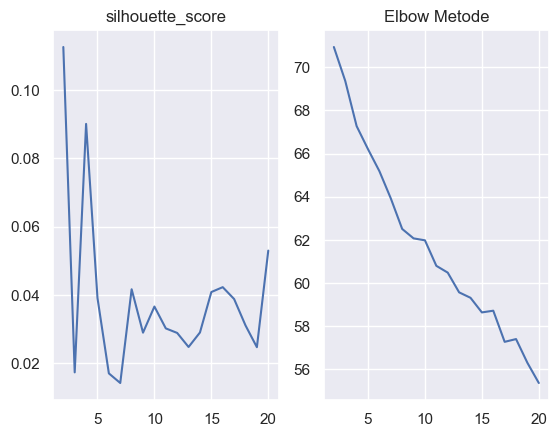

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(2,kmax+1),sil)
ax2.plot(potential_k, result)
ax1.set_title('silhouette_score')
ax2.set_title('Elbow Metode')
plt.show()

In [95]:
optimal_k = sil.index(max(sil))+2

In [96]:
print(f"optimal K using elbow : {optimal_k_elbow}")
print(f"optimal K using silh : {optimal_k}")

optimal K using elbow : 4
optimal K using silh : 2


# Modeling

train the model with the optimal_k value 

In [97]:
kmeans = KMeans(n_clusters=optimal_k_elbow)
y_kmeans = kmeans.fit_predict(data_numeric_standarized)
centers = kmeans.cluster_centers_

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Evaluating

use PCA to reduce the dimentions of the data to plot it in 2d space

In [98]:
pca_model = PCA(n_components = 2)
pca_model.fit(data_numeric_standarized)

PCA(n_components=2)

In [99]:
training_data_pca = pca_model.transform(data_numeric_standarized)
centers_pca = pca_model.transform(centers)

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


draw the data in 2d space

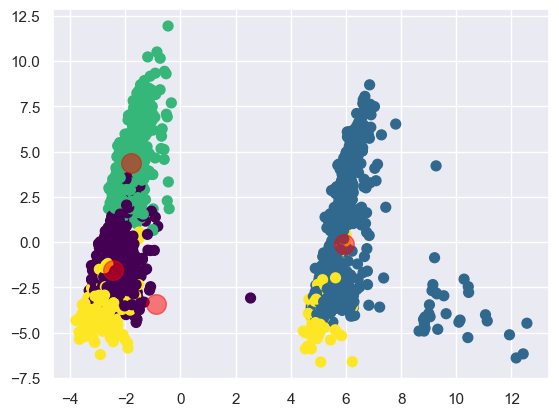

In [100]:
plt.scatter(training_data_pca[:, 0],
            training_data_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.5)

In [101]:
import umap.umap_ as umap

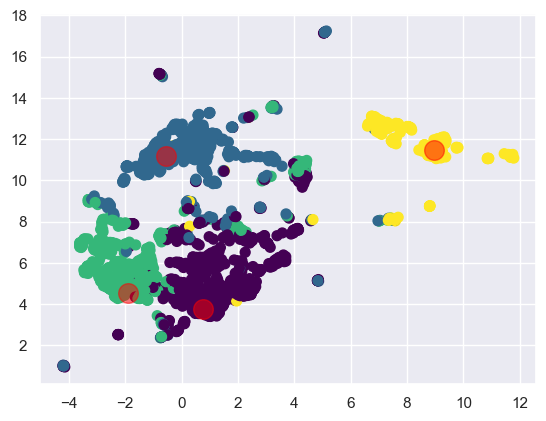

In [102]:
reducer = umap.UMAP(n_components=2)
umap_model = reducer.fit(data_numeric_standarized)
training_data_embedding = umap_model.transform(data_numeric_standarized)
centers_embedding = umap_model.transform(centers)

# plot the data in the low dim with the cluster results
plt.scatter(training_data_embedding[:, 0],
            training_data_embedding[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers_embedding[:, 0], centers_embedding[:, 1], c='red', s=200, alpha=0.5)

[[ 0.20735974 -0.68990725  0.14113613 ... -0.11439765 -0.23639829
   0.25753037]
 [-0.02369862  0.09137098 -0.37456225 ...  0.08008573  0.16075822
  -0.13334545]
 [-0.38392265  1.36389757  0.24295239 ...  0.16579523  0.35198821
  -0.41053244]
 [ 0.15120371 -0.68969543 -0.14783381 ... -0.12707123 -0.27099557
   0.26498323]]
[[-2.44127658 -1.5498689  -1.74992347]
 [ 5.91782098 -0.10701138 -0.72066386]
 [-1.78181593  4.38097775  0.05236443]
 [-0.89511436 -3.41411686  6.48844629]]


d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0.5, 0.92, '3D PCA plot')

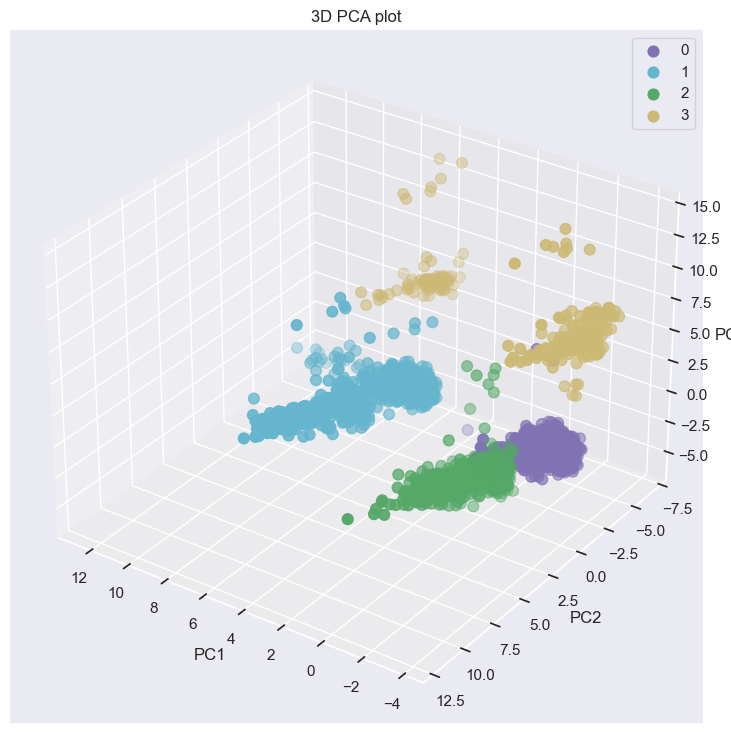

In [103]:
pca = PCA(n_components=3)
pca.fit(data_numeric_standarized)
pca_bcancer = pca.transform(data_numeric_standarized)
pca_centers = pca.transform(centers)
print(centers)
print(pca_centers)
cdict = {0:'m',1:'c',2:'g',3:'y'}
label = {0:'0',1:'1',2:"2",3:"3"}
y = y_kmeans

Xax = pca_bcancer[:,0]
Yax = pca_bcancer[:,1]
Zax = pca_bcancer[:,2]

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, 
                     projection='3d')
 
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], 
            Yax[ix], 
            Zax[ix], 
            c=cdict[l], 
            s=60,
           label=label[l])
 


ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)
 
ax.view_init(30, 125)
ax.legend()
plt.title("3D PCA plot")

For n_clusters = 2 The average silhouette_score is : 0.11267740185438732
For n_clusters = 3 The average silhouette_score is : 0.018584200698178757
For n_clusters = 4 The average silhouette_score is : 0.032485758938386476
For n_clusters = 5 The average silhouette_score is : 0.031392012900094565
For n_clusters = 6 The average silhouette_score is : 0.01633112936743233
For n_clusters = 7 The average silhouette_score is : 0.037905194956377036
For n_clusters = 8 The average silhouette_score is : 0.044078888321879665
For n_clusters = 9 The average silhouette_score is : 0.003425120349210449


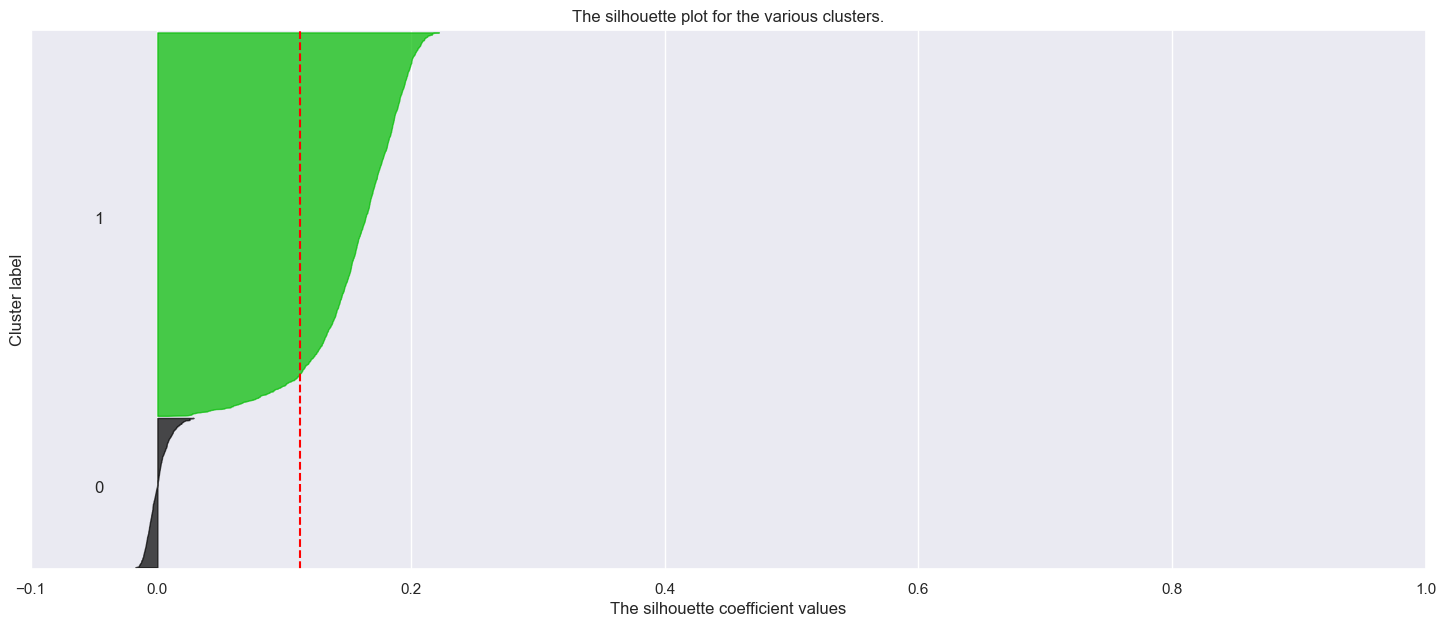

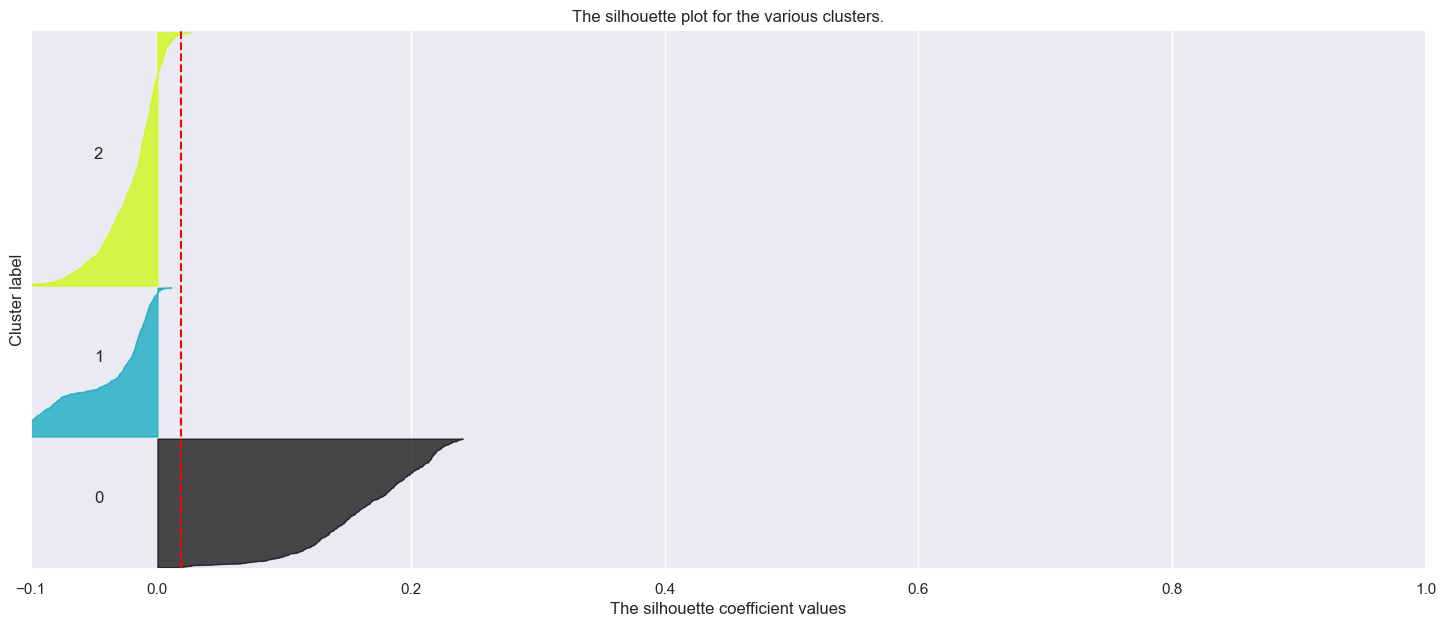

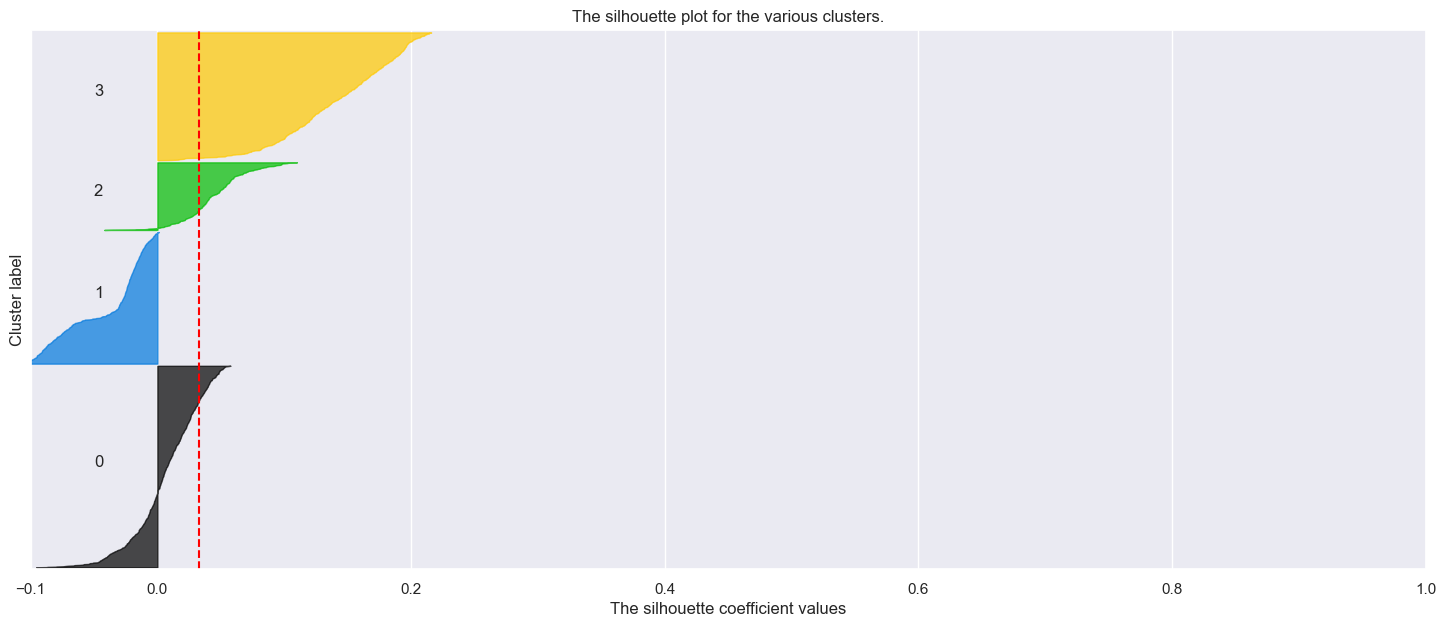

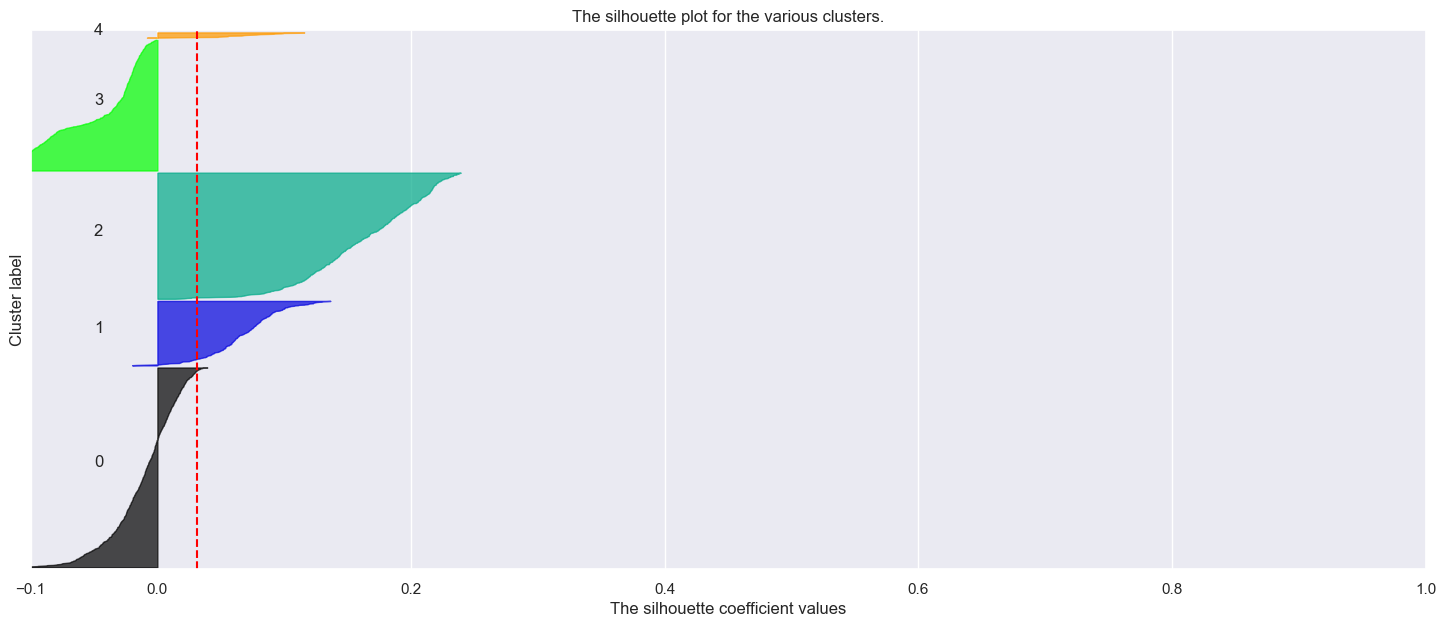

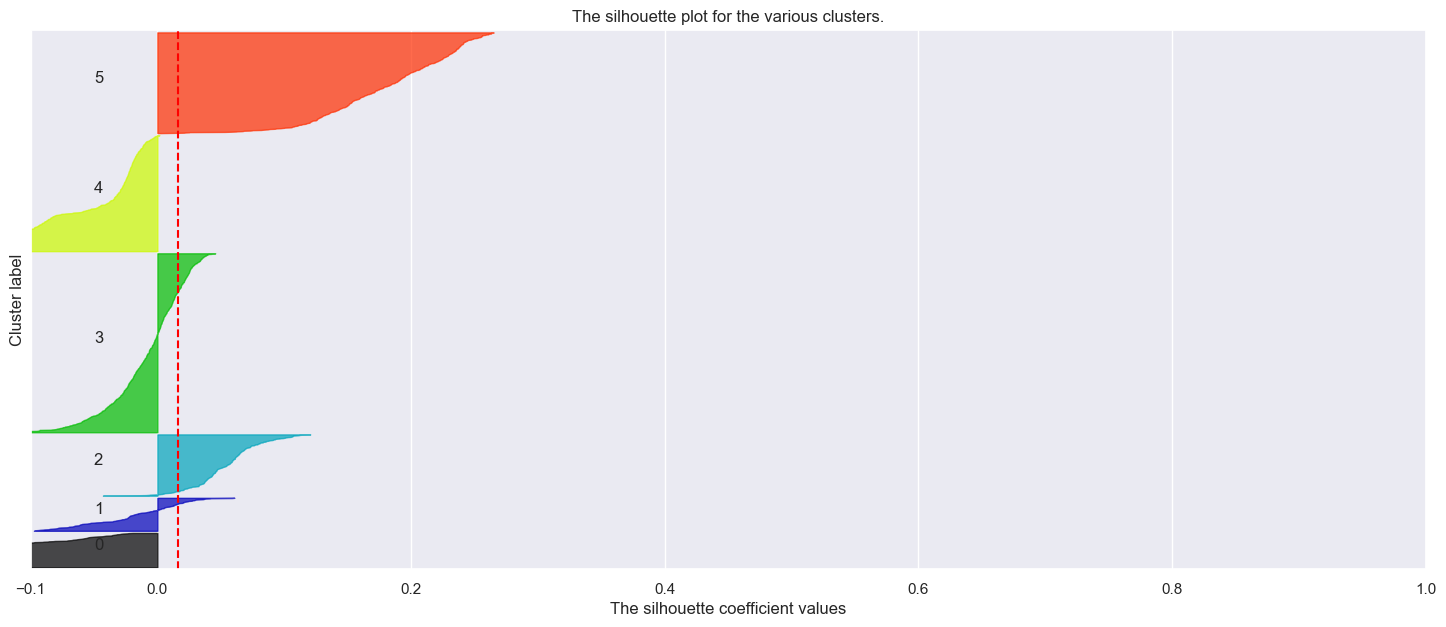

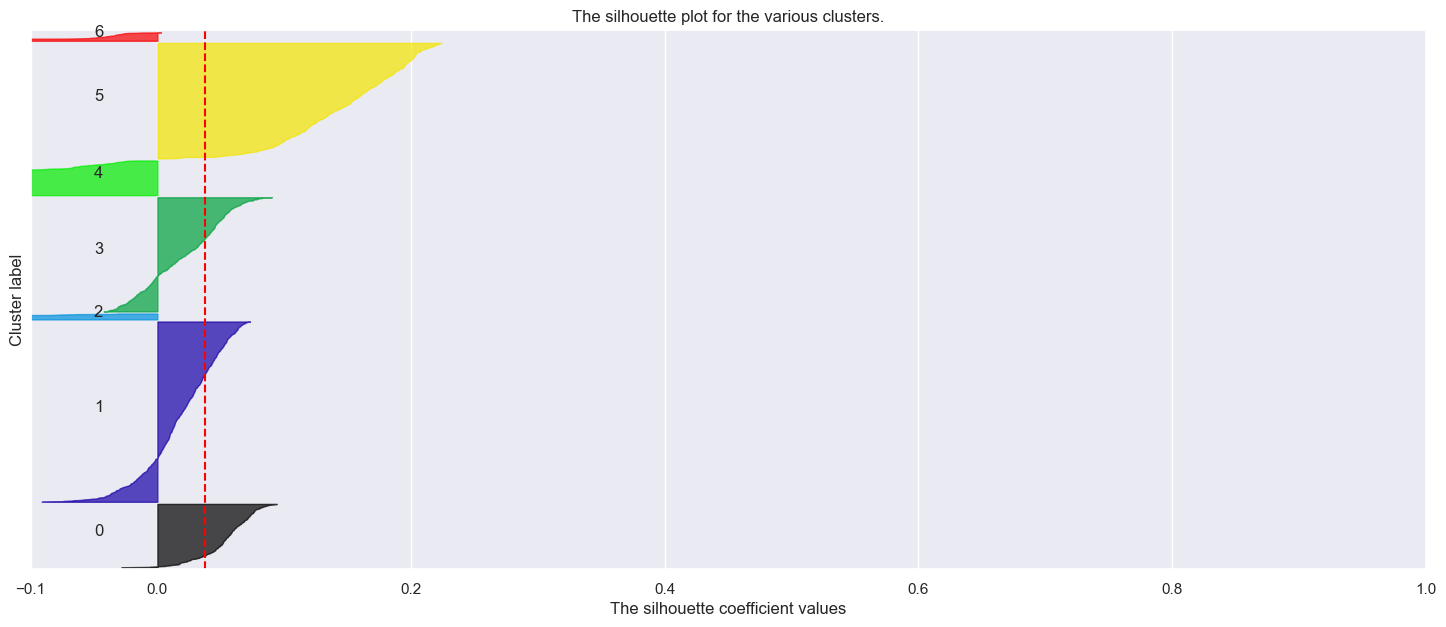

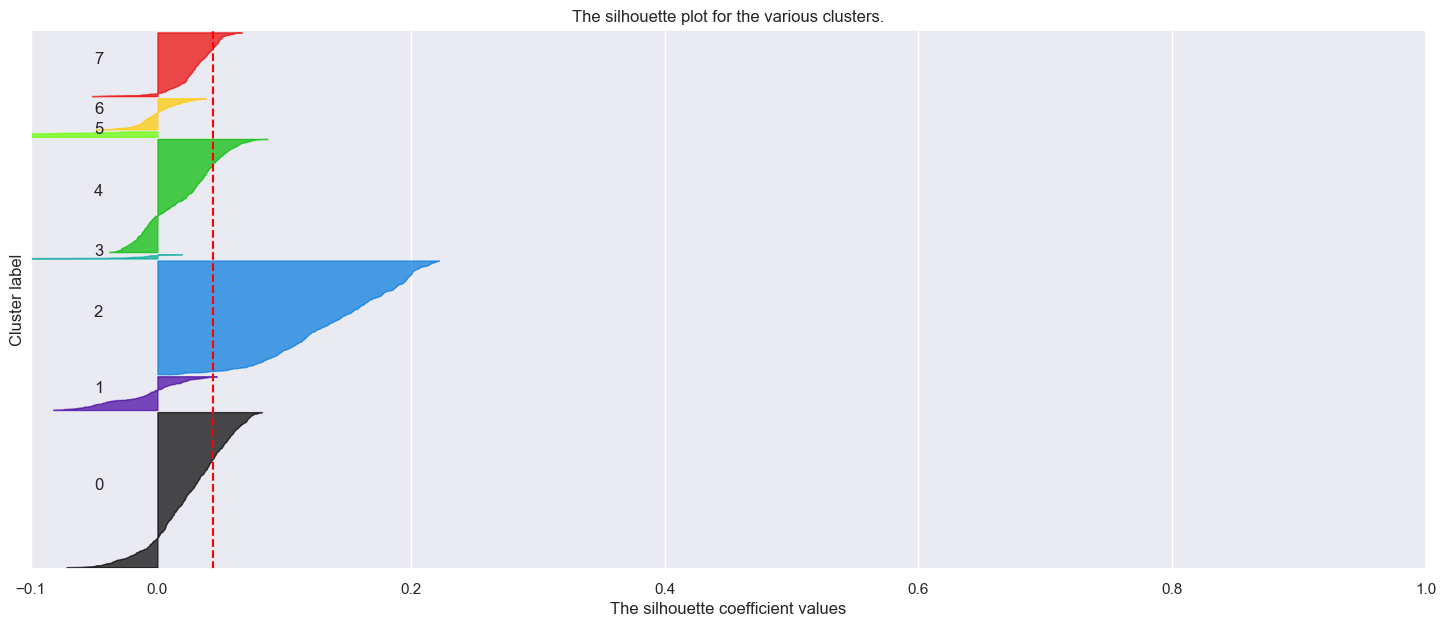

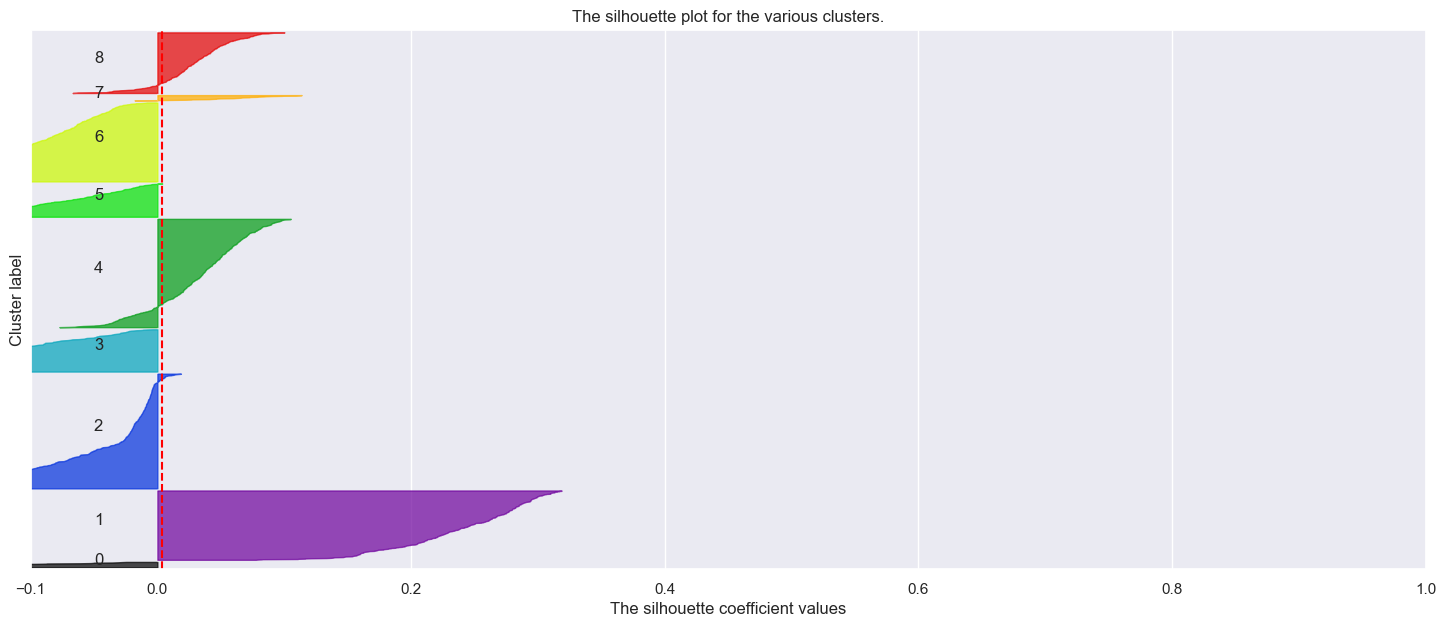

In [104]:
import matplotlib.cm as cm
potential_k = list(range(2, 10))
for n_clusters in potential_k:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_numeric_standarized) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(data_numeric_standarized)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_numeric_standarized, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_numeric_standarized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

### DBSCAN
##### Hyperparamters used:
* "eps": specifies the maximum distance between two points to be considered neighbors and part of the same cluster                       
* "min_samples": specifies the minimum number of points required for a group of points to be considered a cluster
* "metric": clustering evaluation metric

##### Hyper Parameter Tuning

finding the optimal eps, and min_samples using silhouette_score

##### Choose hyperparameter 'eps' value using KNN

In [218]:
# transfor dataframe nto an array to include it as a parameter for KNN
array_data_numeric_standarized = np.array(data_numeric_standarized)
array_data_numeric_standarized

array([[-0.50733435,  1.44961378, -1.18224563, ..., -0.16339271,
        -0.36141028,  0.46819109],
       [ 0.87359999, -0.69024296, -1.18632554, ..., -0.16339271,
        -0.36141028,  0.46819109],
       [ 0.87359999, -0.69024296, -1.18632554, ..., -0.16339271,
        -0.36141028,  0.46819109],
       ...,
       [ 2.25453433, -0.69024296,  0.84343231, ..., -0.16339271,
        -0.36141028,  0.46819109],
       [-1.88826868, -0.69024296,  0.84343231, ..., -0.16339271,
        -0.36141028,  0.46819109],
       [-1.88826868, -0.69024296, -1.18632554, ..., -0.16339271,
        -0.36141028,  0.46819109]])

##### K = 2

In [222]:
# determine the best value for eps with k=2
k=2
neighbor = NearestNeighbors(n_neighbors=k)
neighbors = neighbor.fit(array_data_numeric_standarized)
distances, indices = neighbors.kneighbors(array_data_numeric_standarized)

# next, we sort and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]

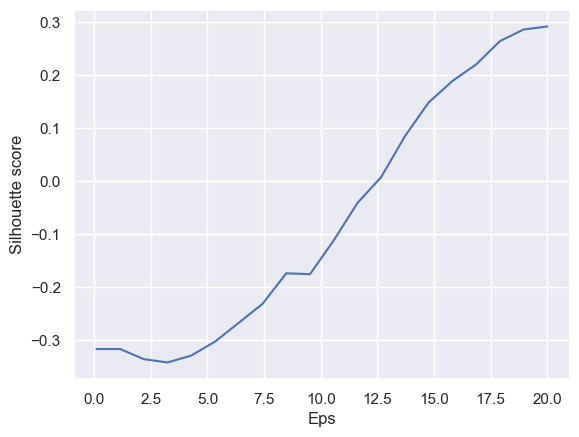

In [223]:
# Choose a range of eps values to try
eps_range = np.linspace(0.1, 20.0, num=20)

# Evaluate DBSCAN with different values of eps
silhouette_scores = []
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=k)
    dbscan.fit(array_data_numeric_standarized)
    if len(set(dbscan.labels_)) > 1: # check if there is more than one cluster
        silhouette_scores.append((eps, silhouette_score(array_data_numeric_standarized, dbscan.labels_)))

# Plot the silhouette scores for different values of eps
eps, scores = zip(*silhouette_scores)
plt.plot(eps, scores)
plt.xlabel('Eps')
plt.ylabel('Silhouette score')
plt.show()

Best eps:  20.0


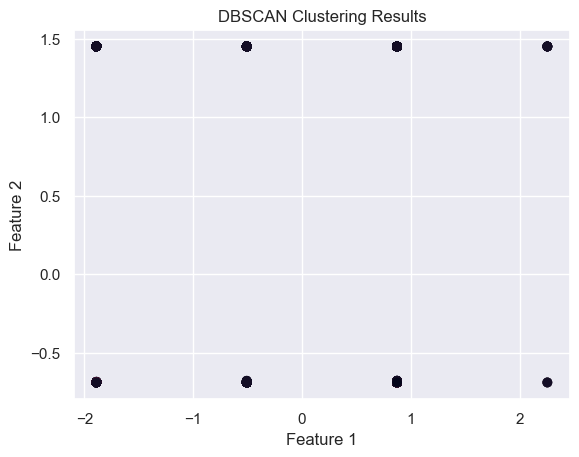

In [224]:
# Choose the best value of eps based on the silhouette score
best_eps = eps[np.argmax(scores)]
print('Best eps: ', best_eps)

# Run DBSCAN with the best value of eps and visualize the results
dbscan = DBSCAN(eps=best_eps, min_samples=k)
dbscan.fit(array_data_numeric_standarized)
plt.scatter(array_data_numeric_standarized[:, 0], array_data_numeric_standarized[:, 1], c=dbscan.labels_)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Results')
plt.show()

##### K = 4

In [225]:
# Choose a value for k
k = 4

# Compute the distances to the kth nearest neighbor
nearest_neighbors = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(array_data_numeric_standarized)
distances, indices = nearest_neighbors.kneighbors(array_data_numeric_standarized)
k_distances = np.sort(distances[:, -1])

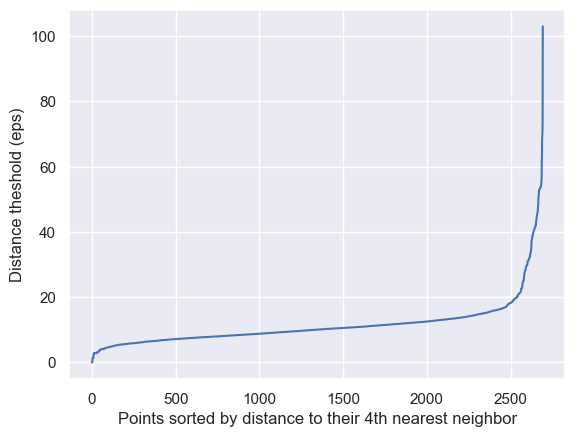

In [226]:
# Plot the sorted distances
plt.plot(k_distances)
plt.xlabel(f'Points sorted by distance to their {k}th nearest neighbor')
plt.ylabel('Distance theshold (eps)')
plt.show()

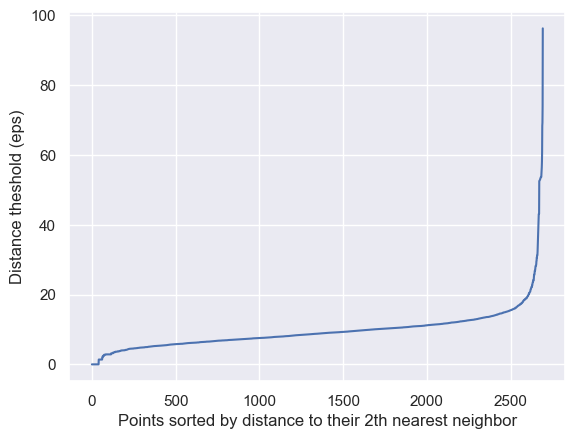

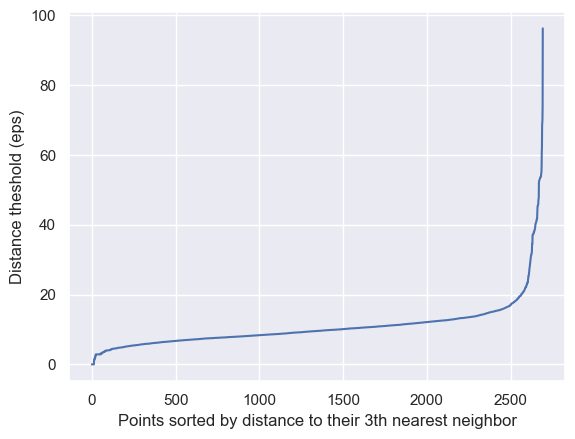

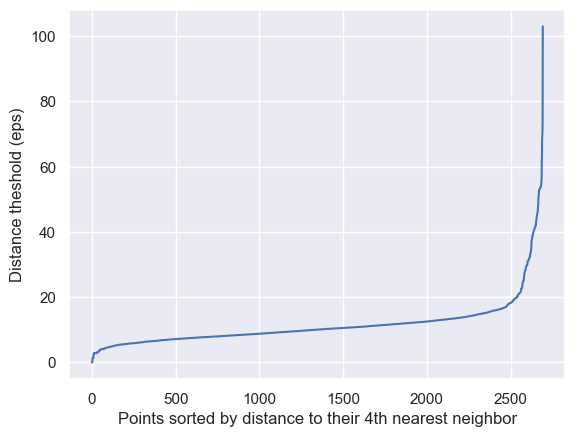

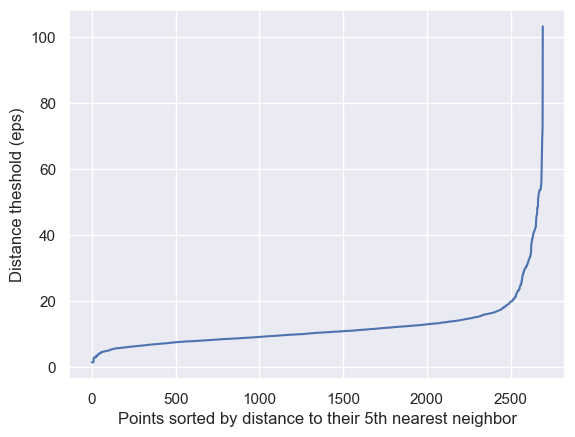

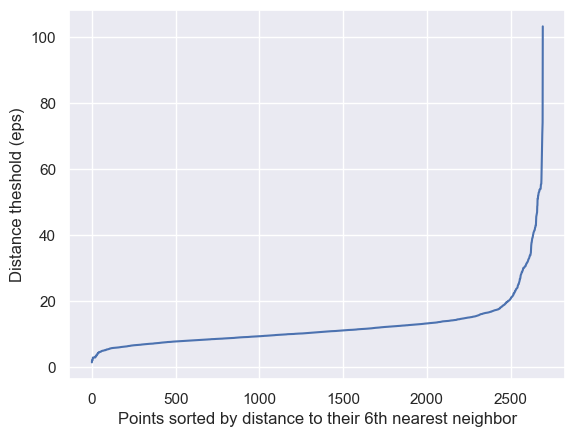

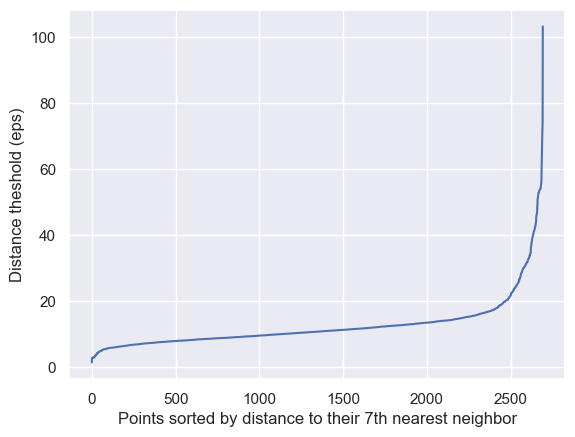

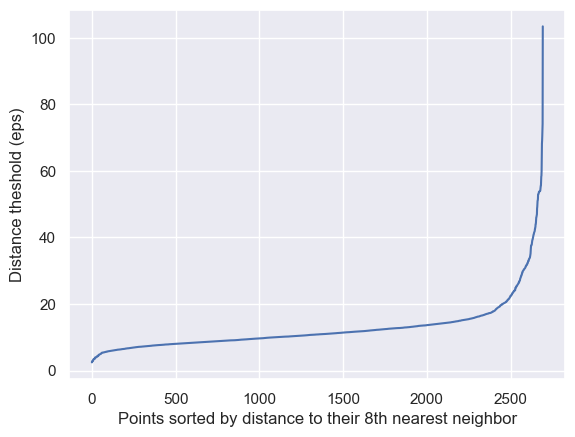

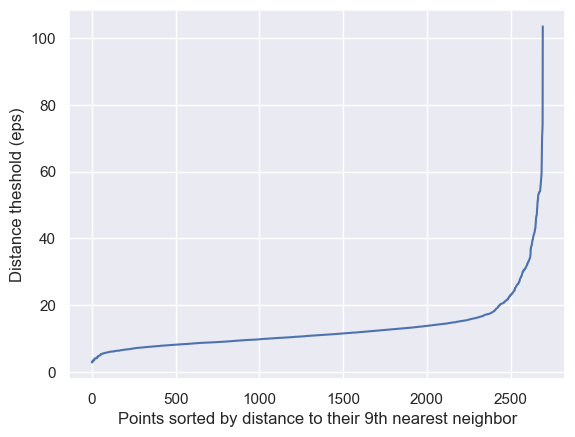

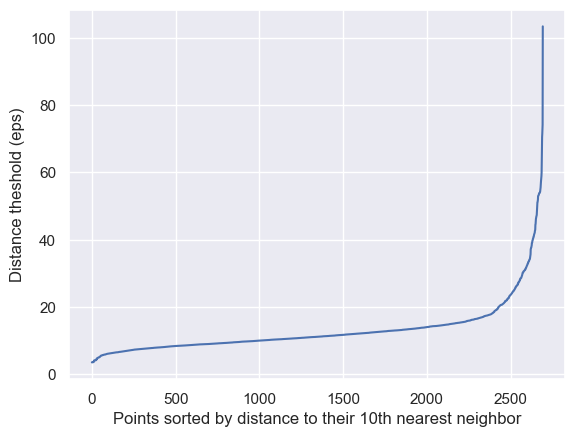

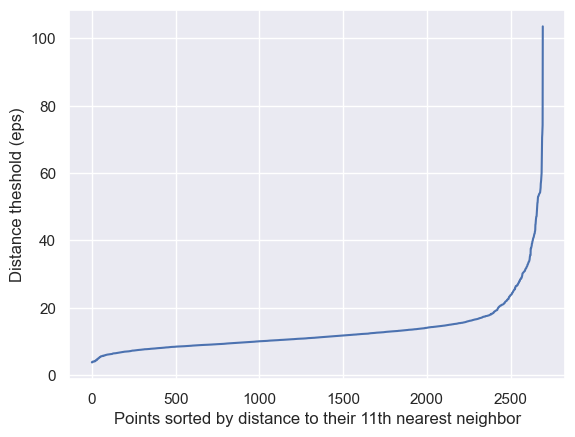

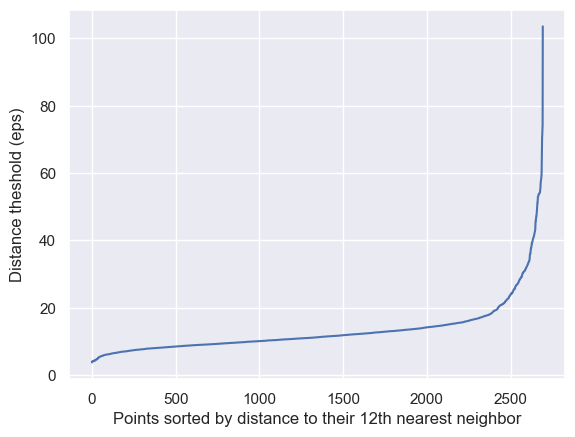

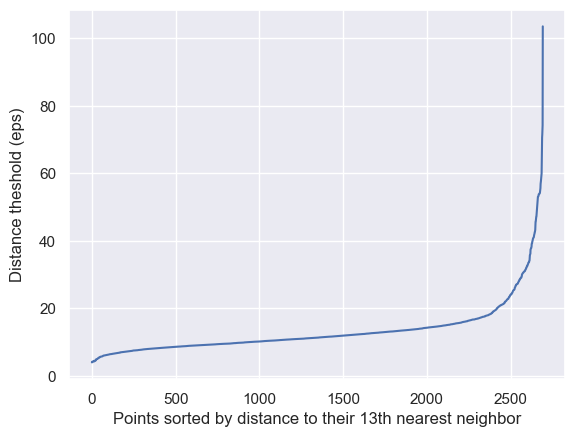

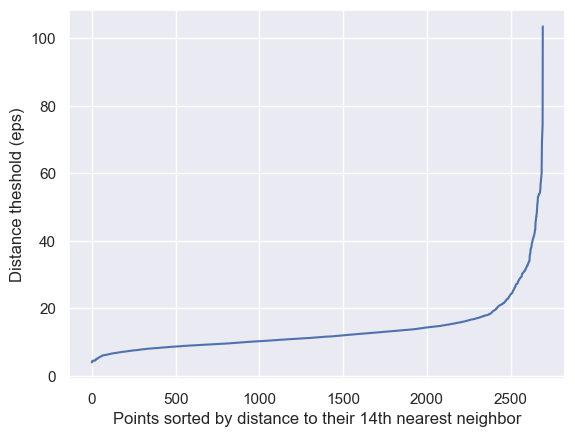

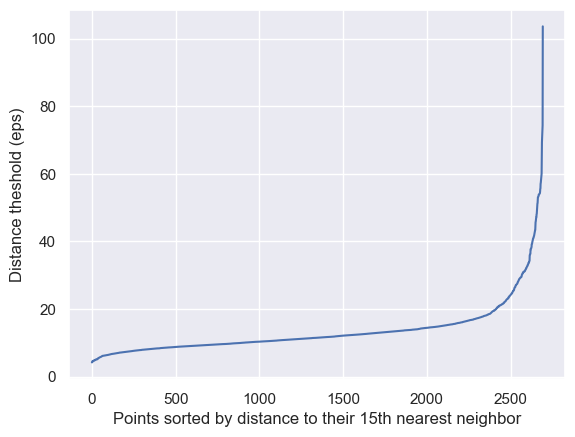

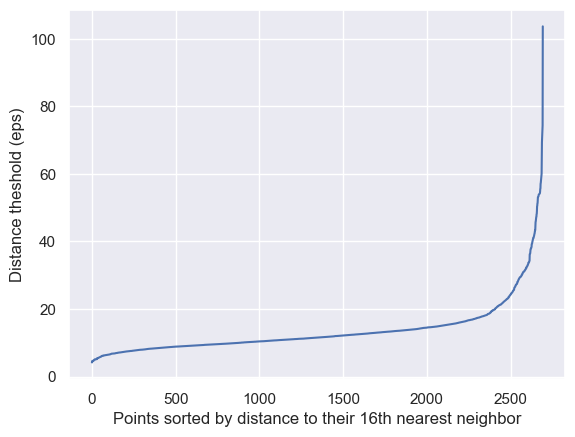

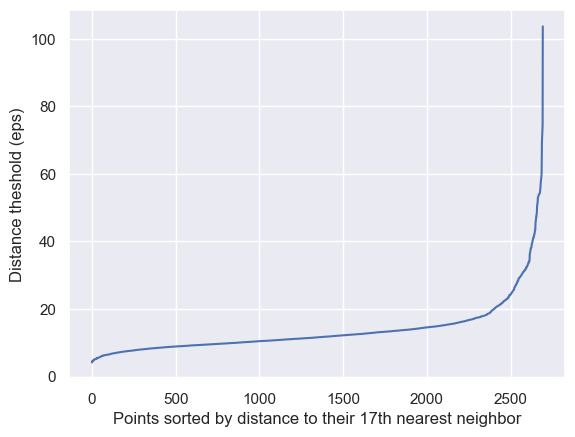

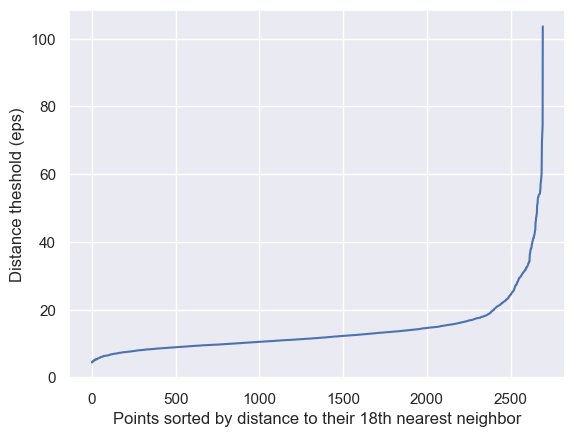

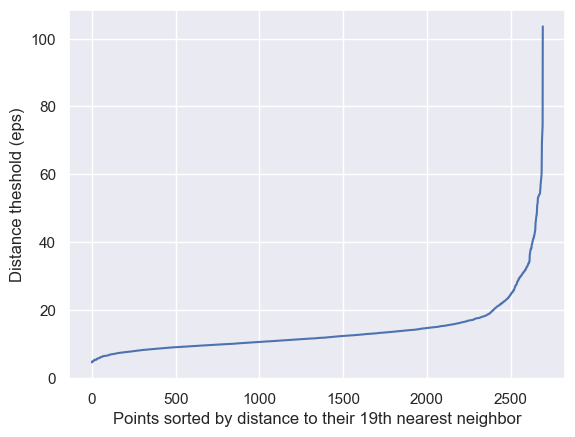

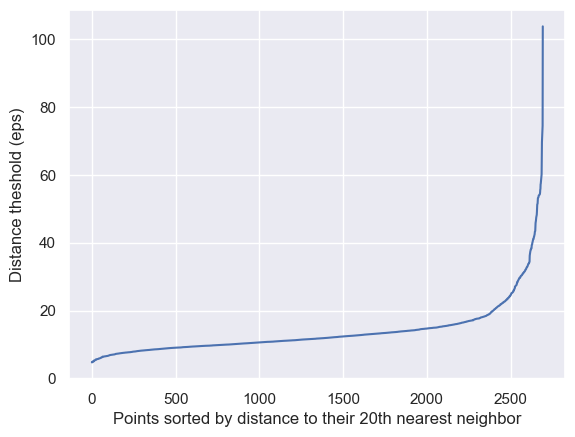

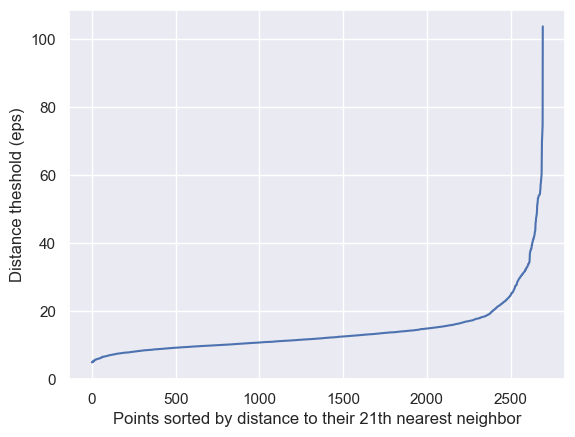

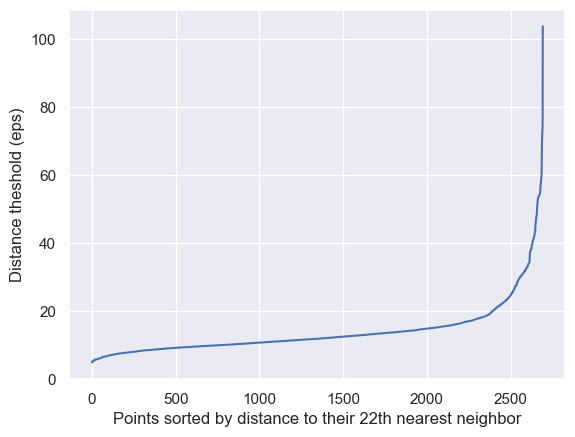

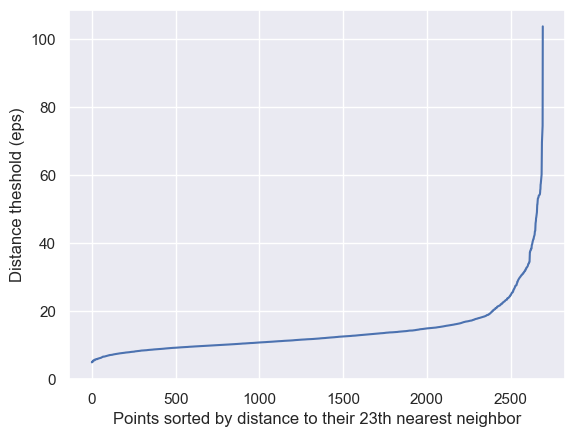

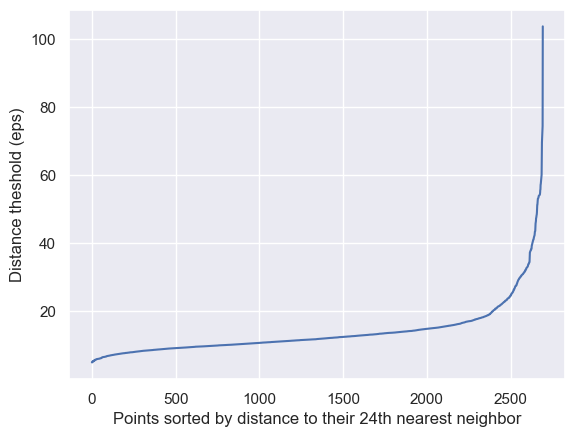

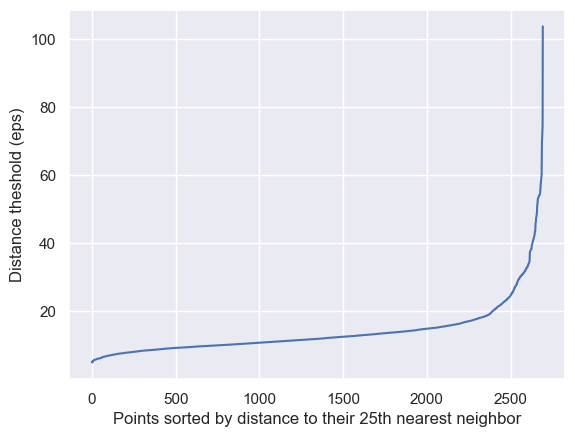

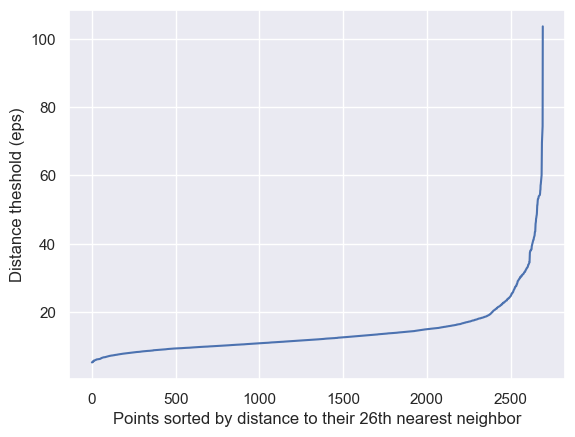

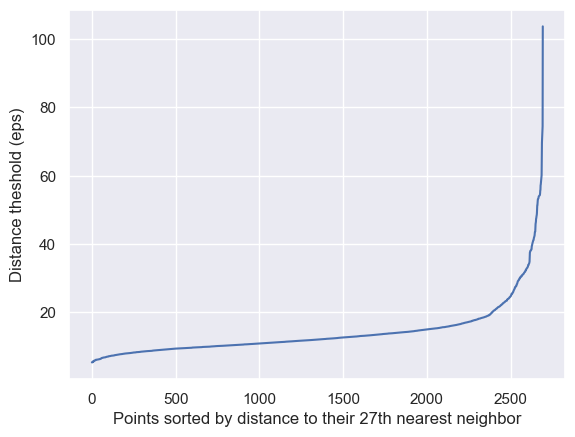

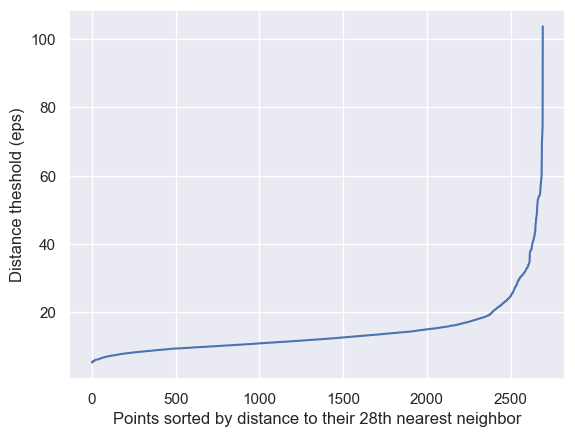

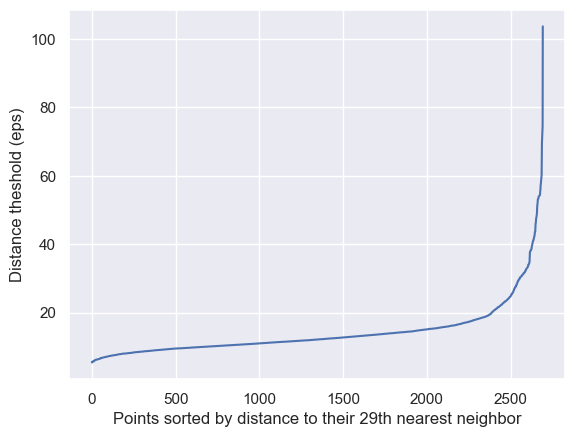

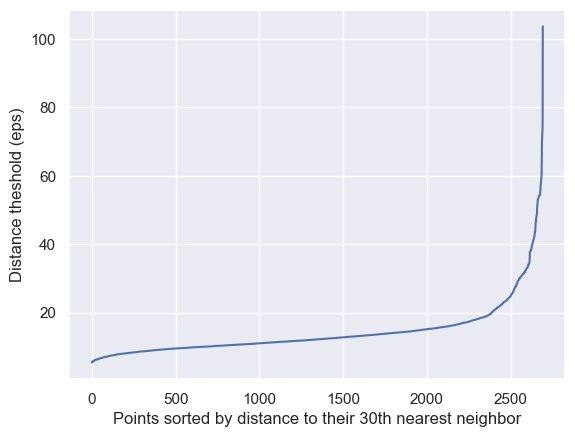

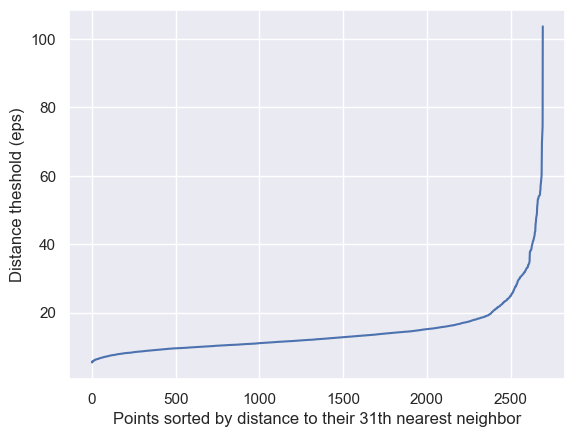

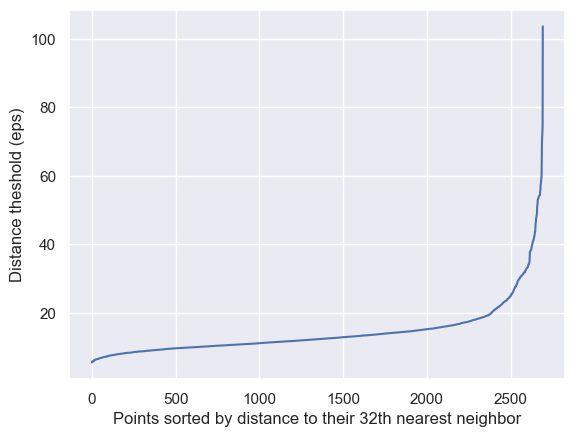

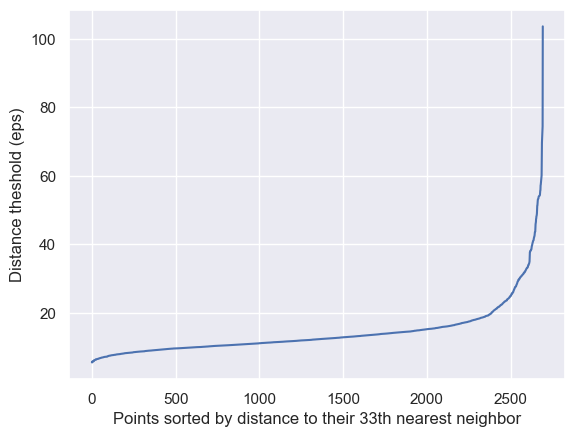

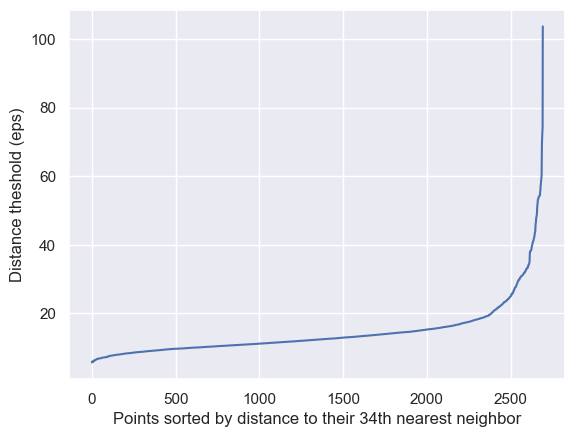

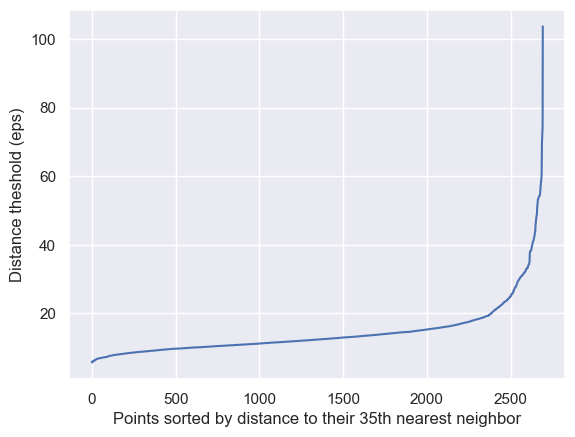

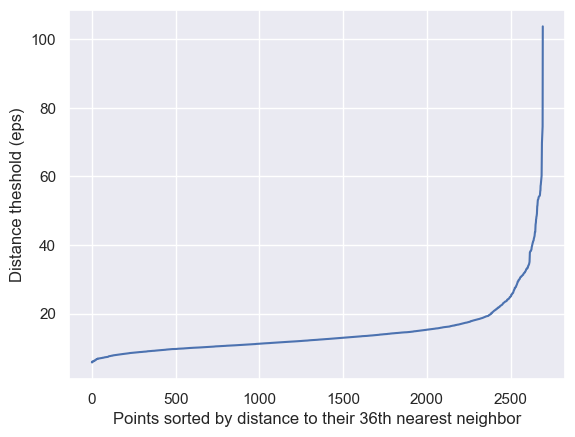

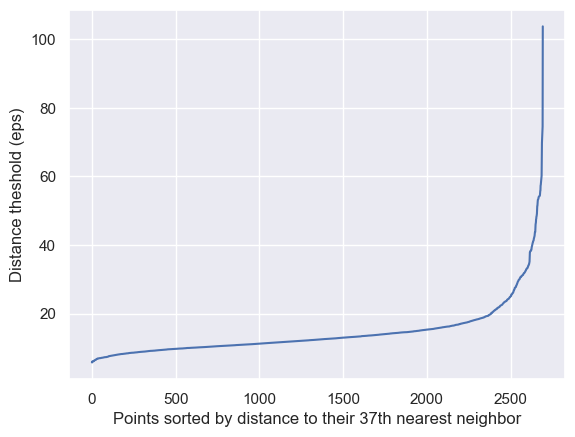

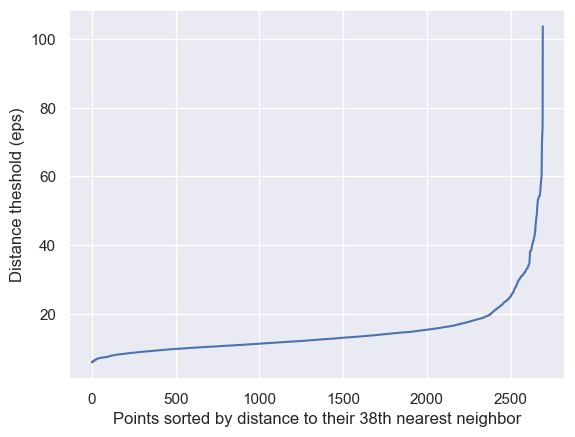

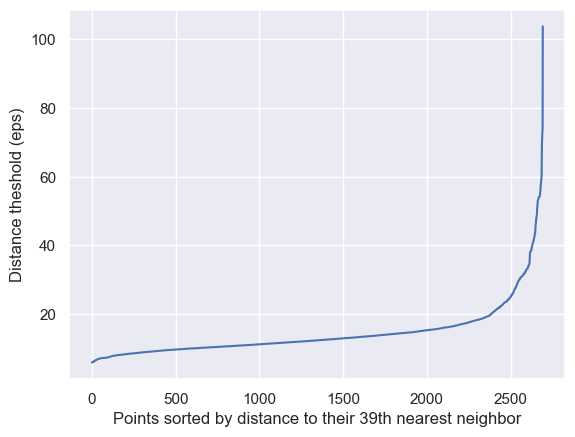

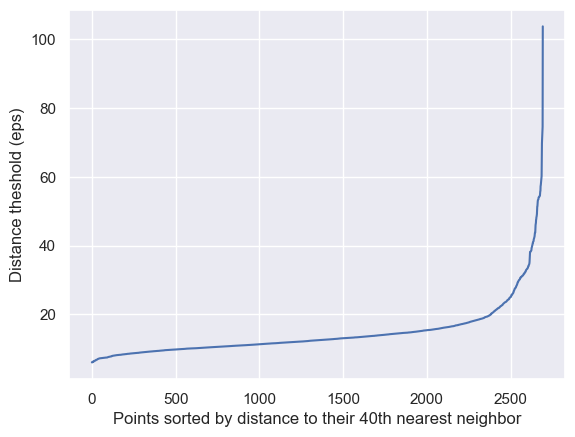

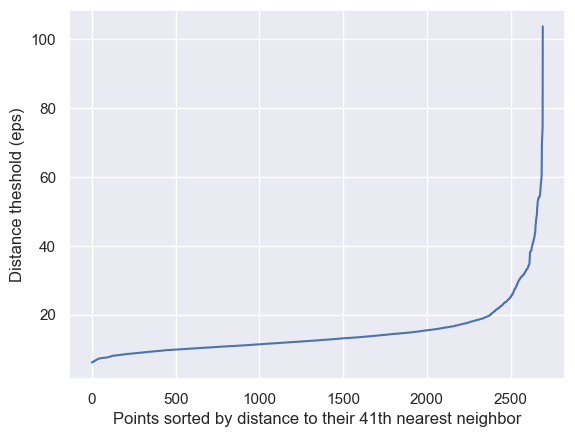

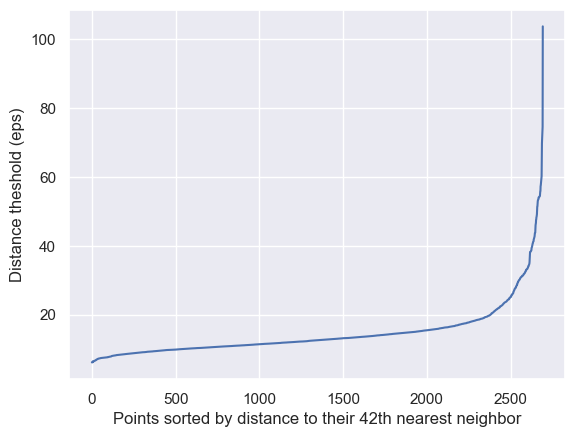

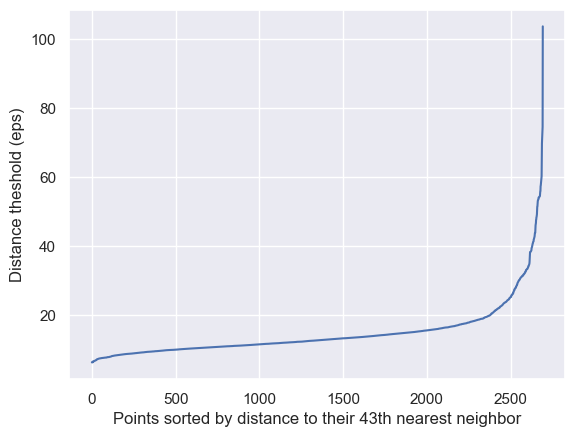

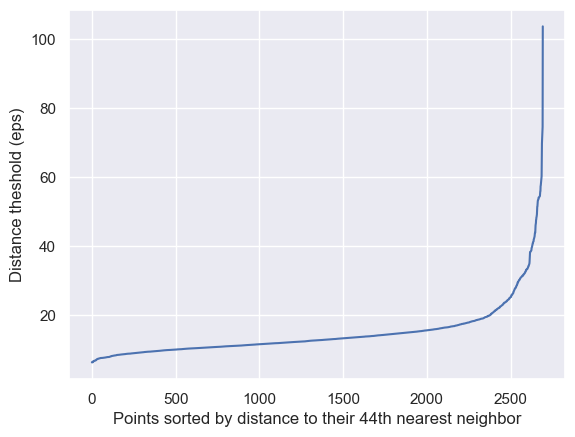

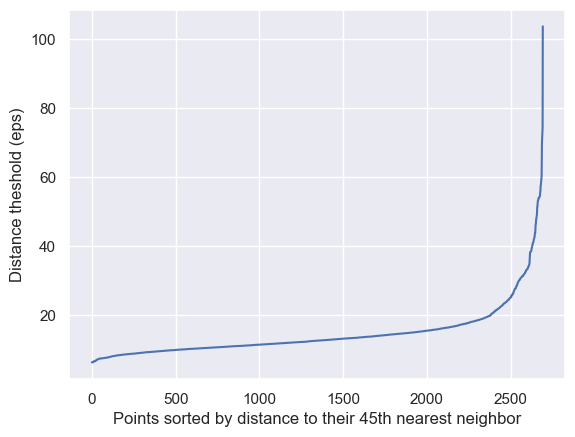

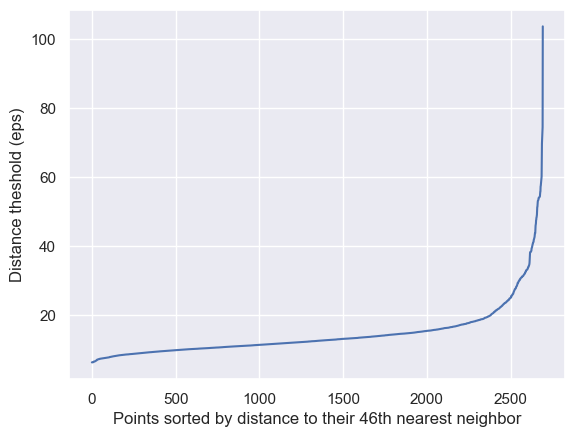

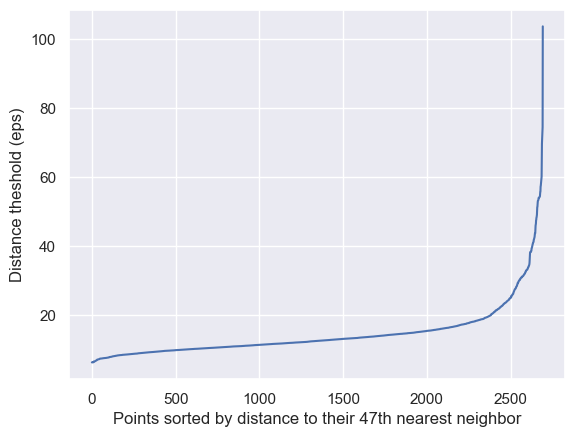

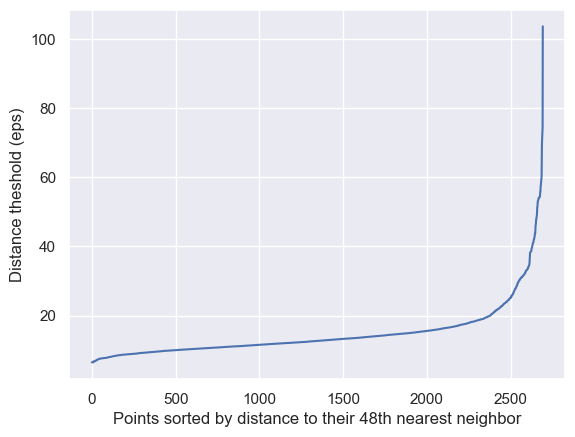

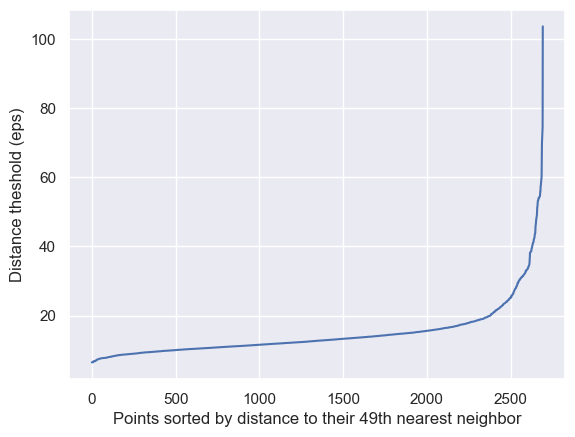

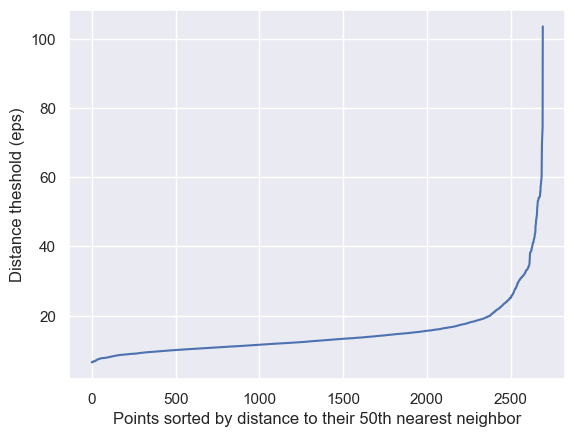

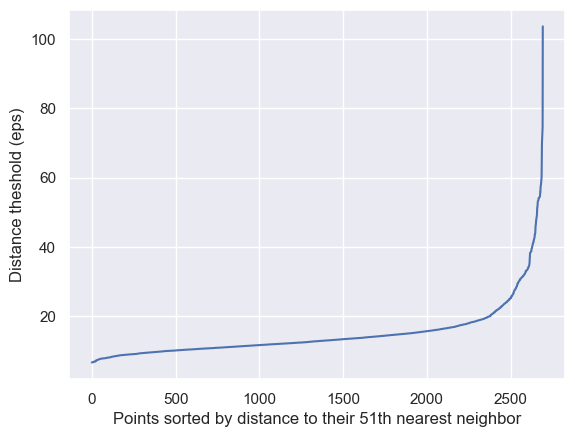

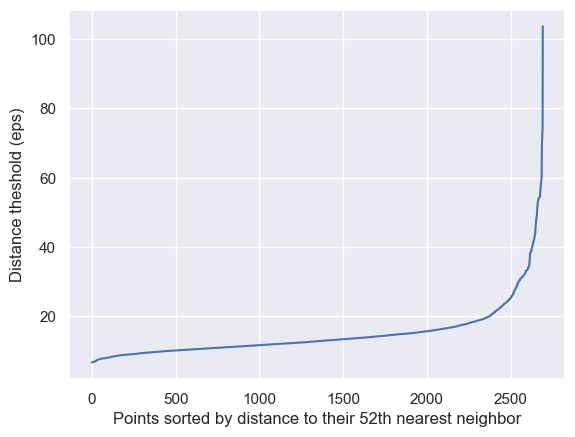

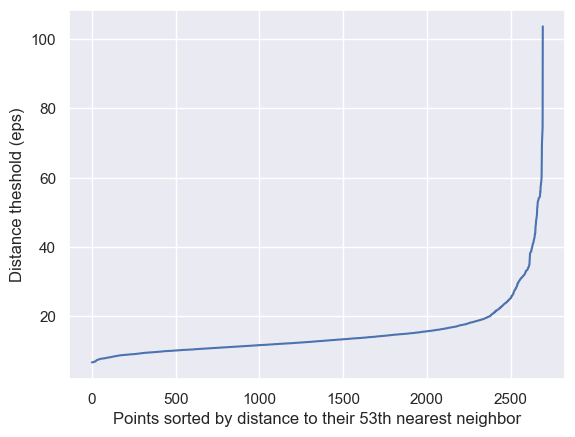

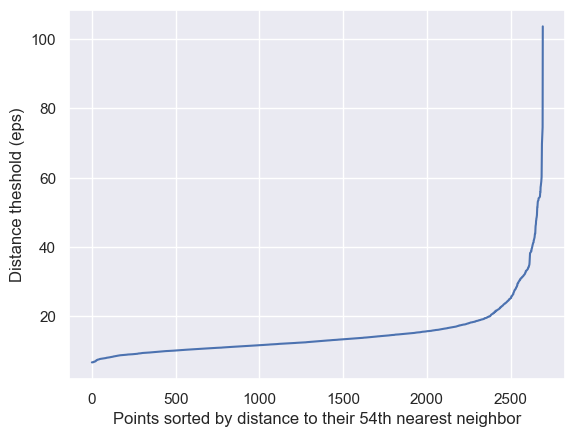

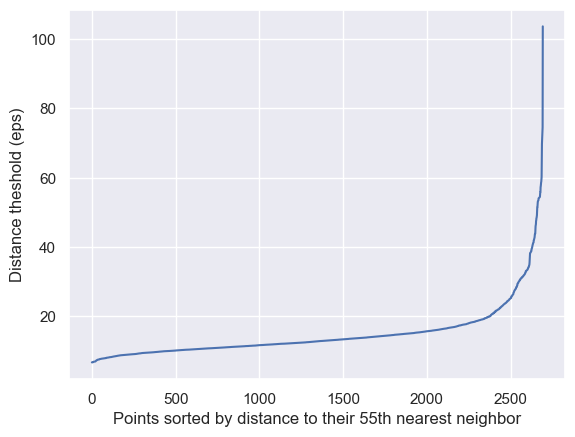

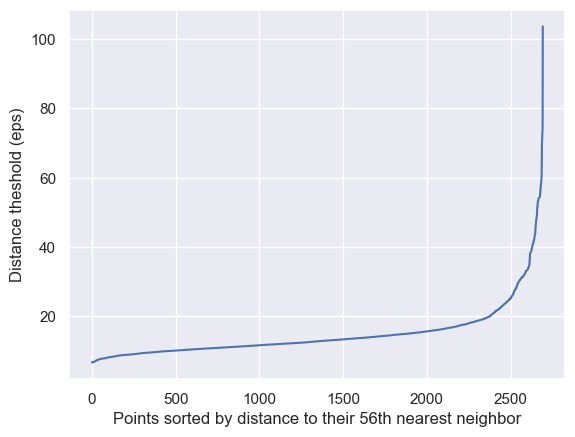

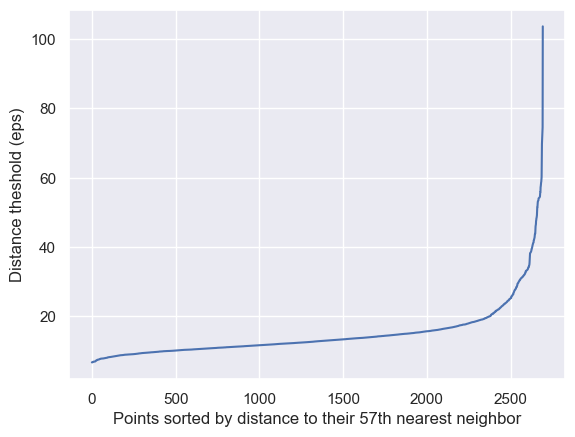

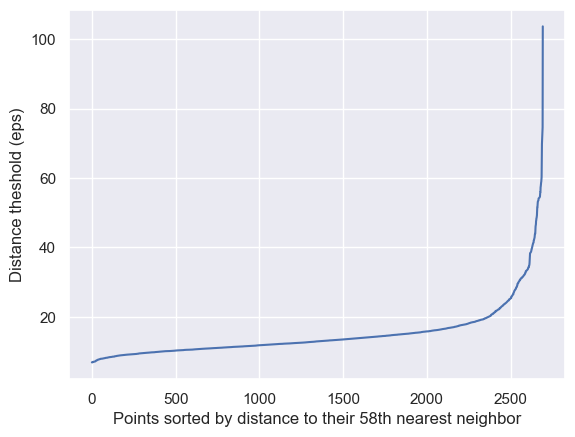

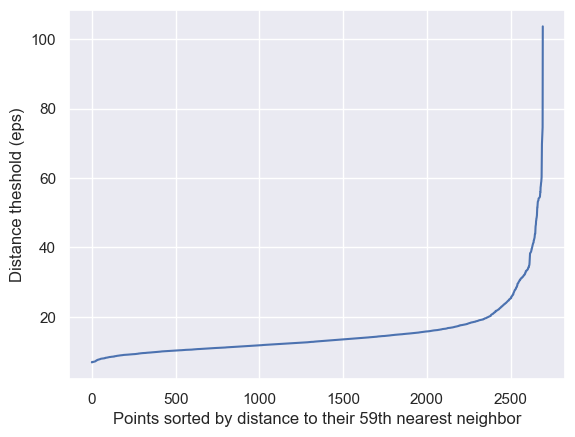

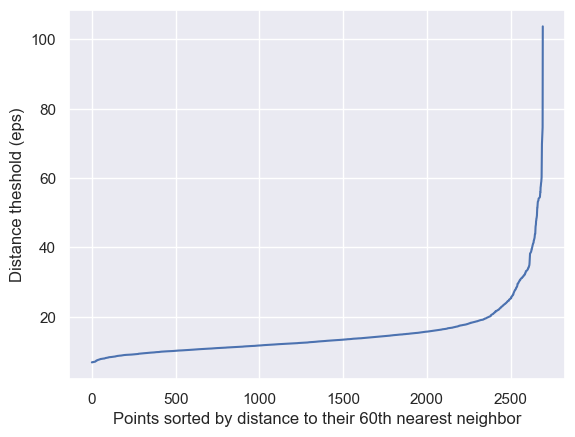

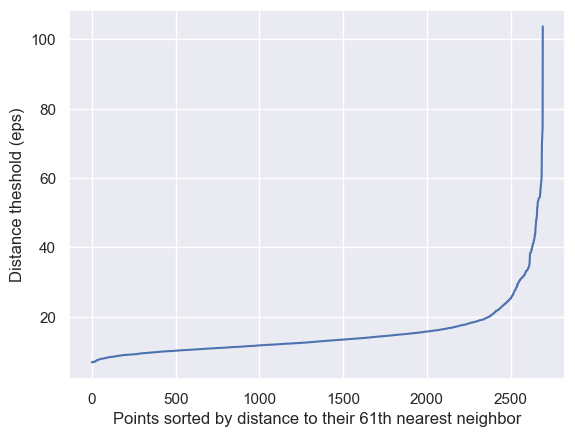

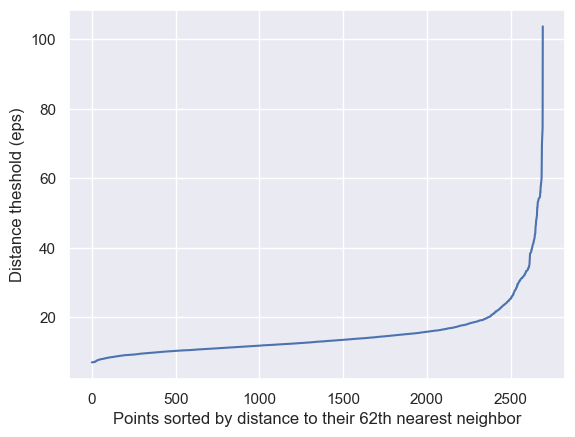

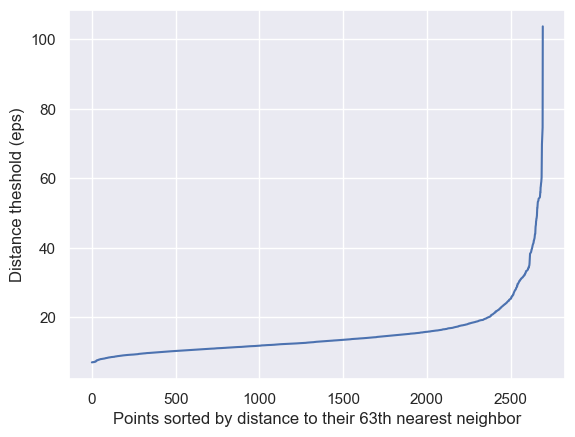

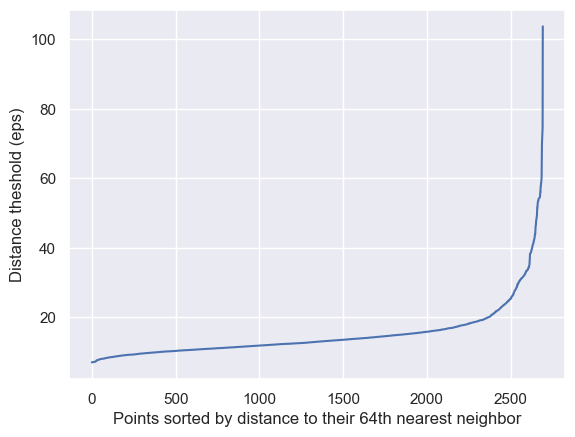

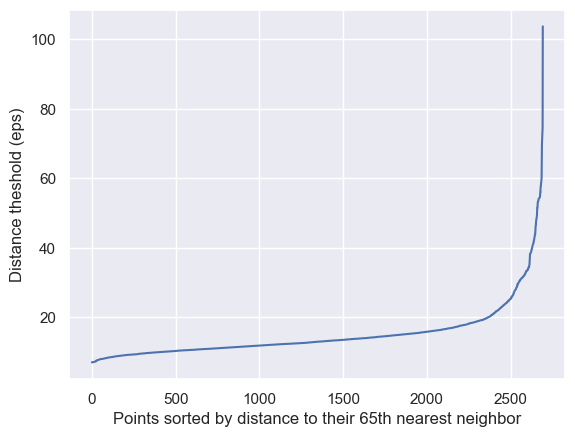

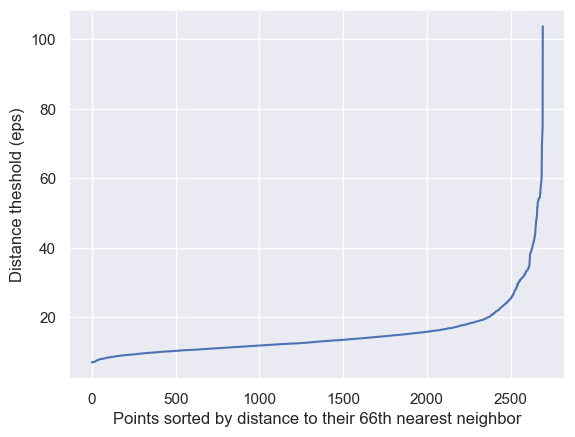

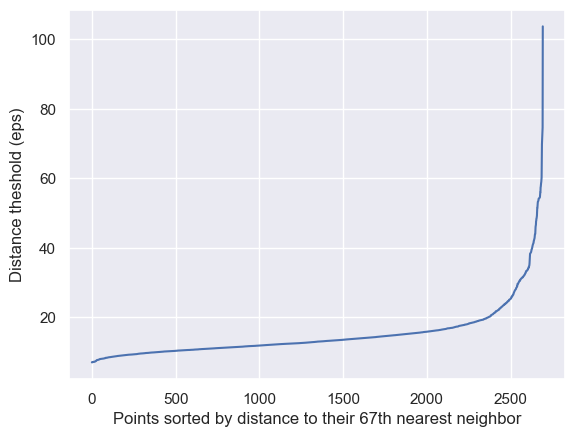

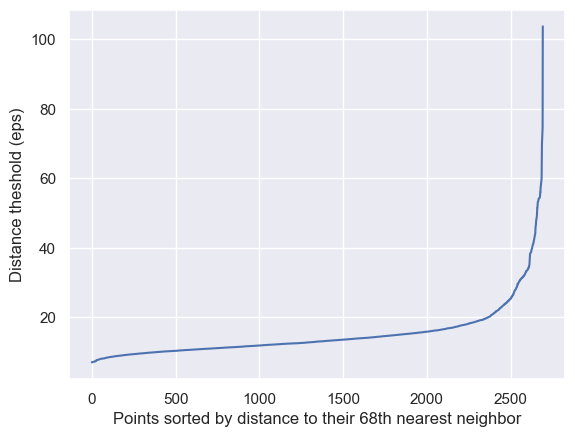

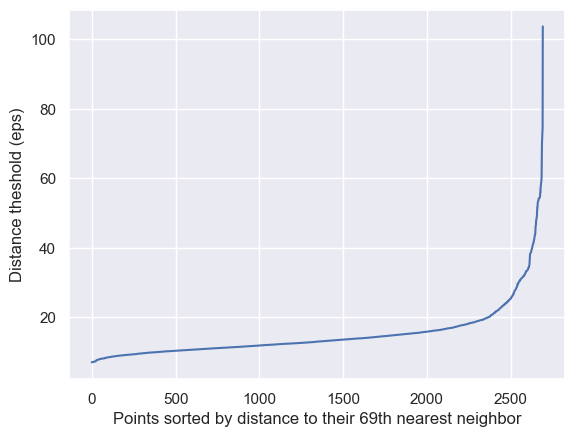

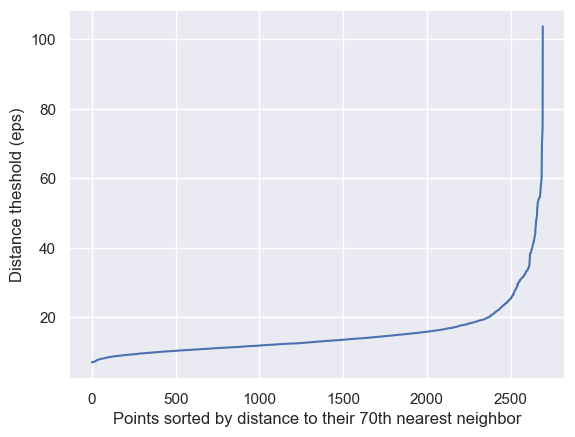

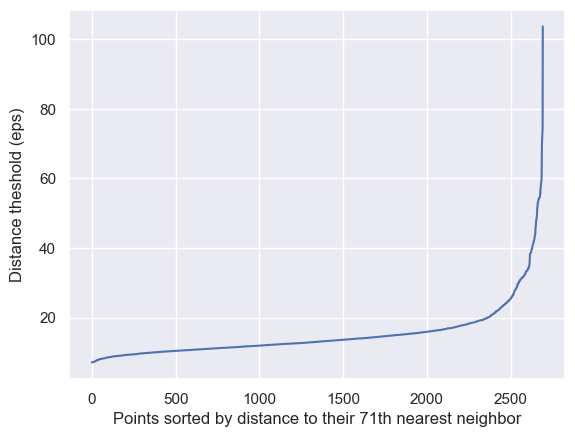

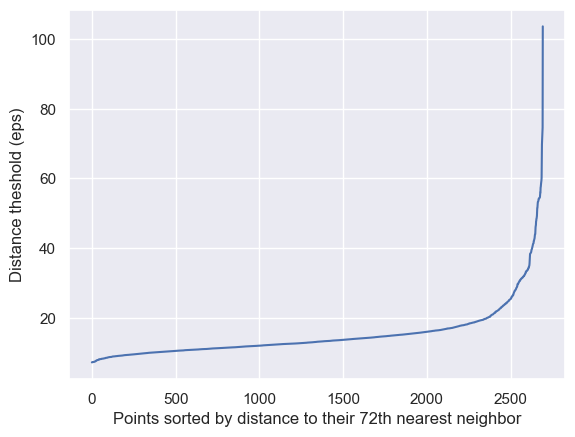

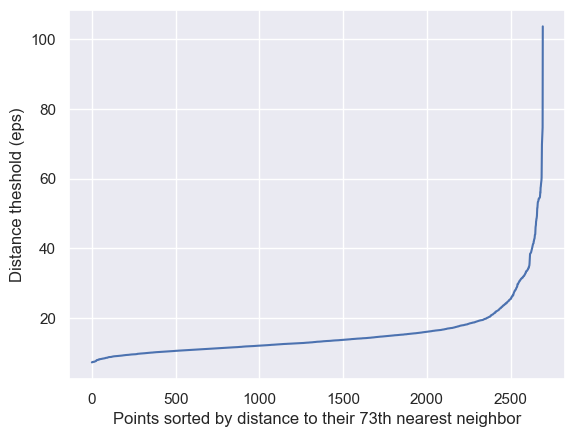

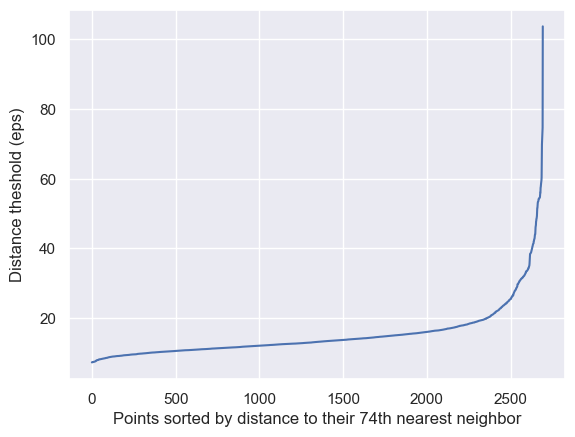

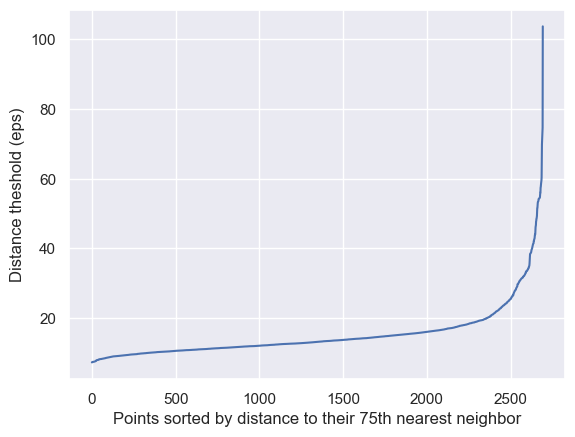

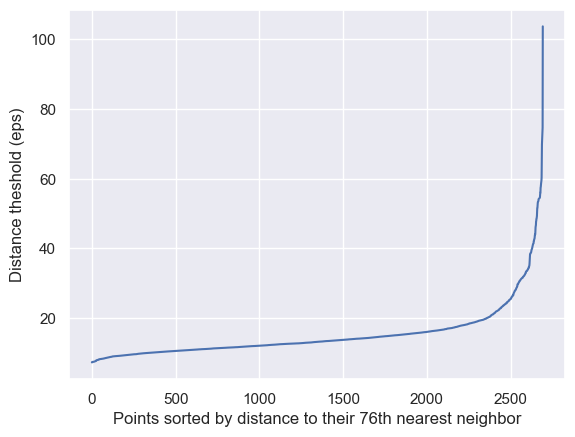

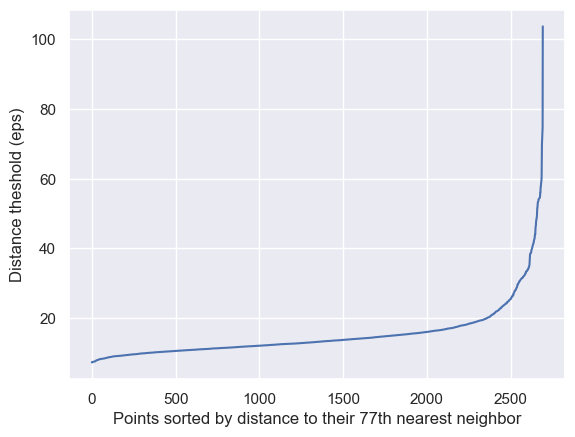

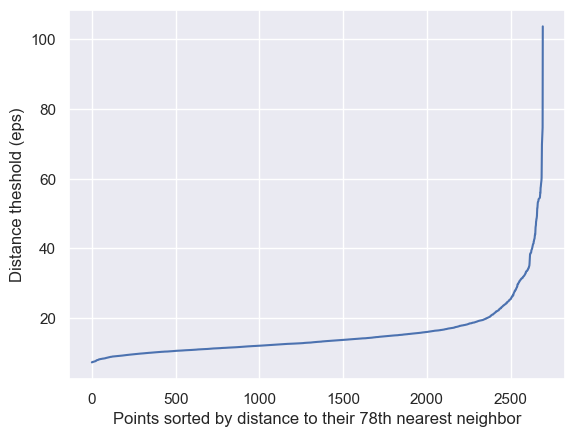

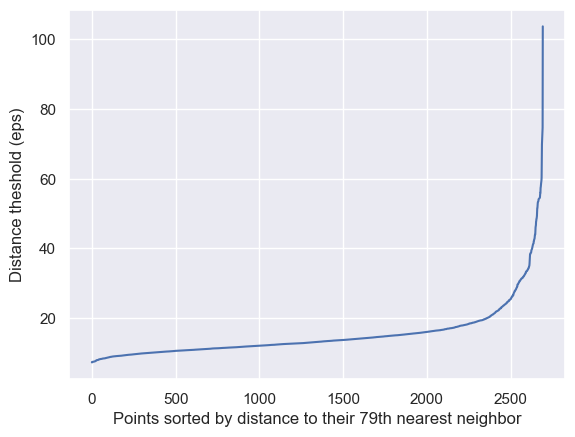

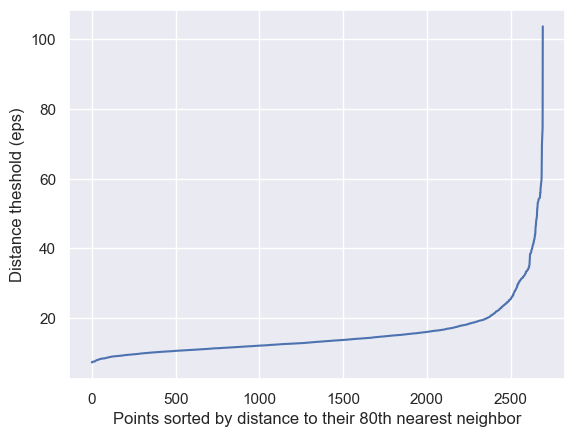

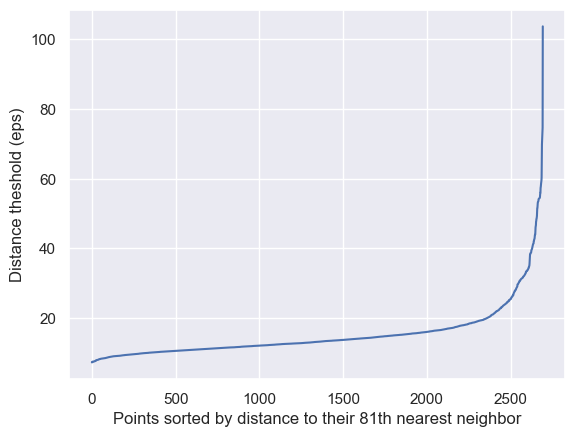

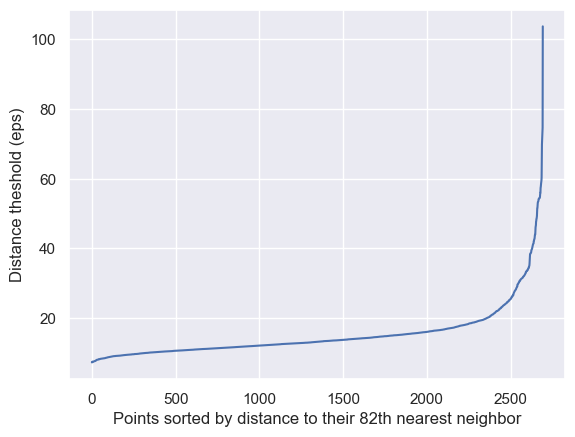

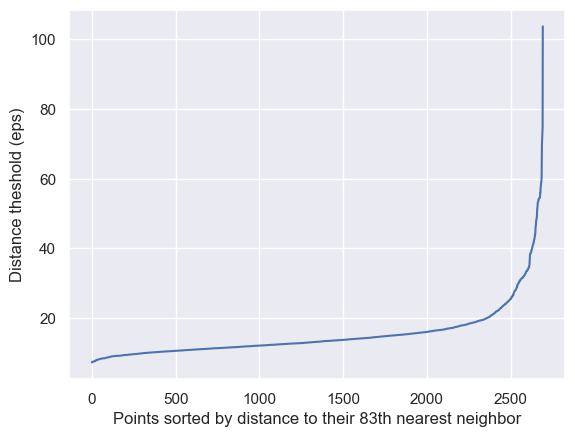

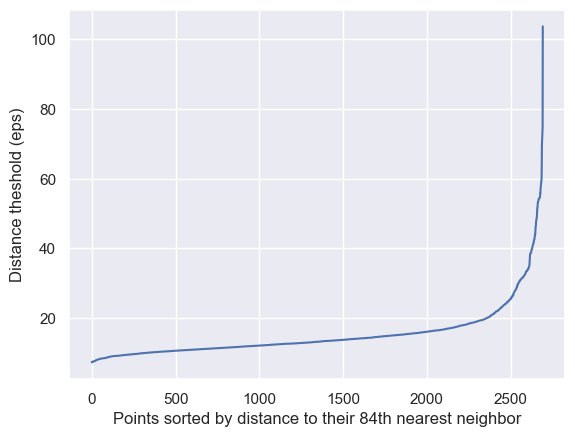

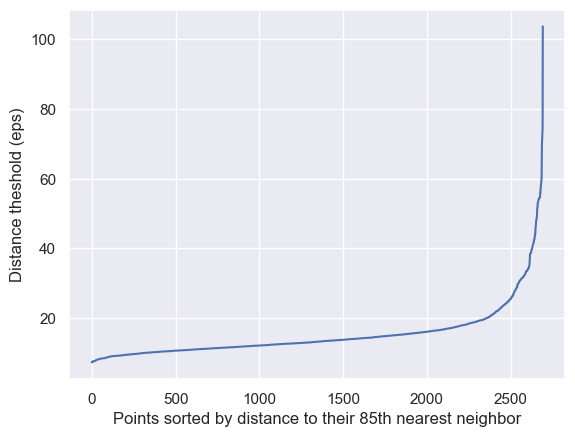

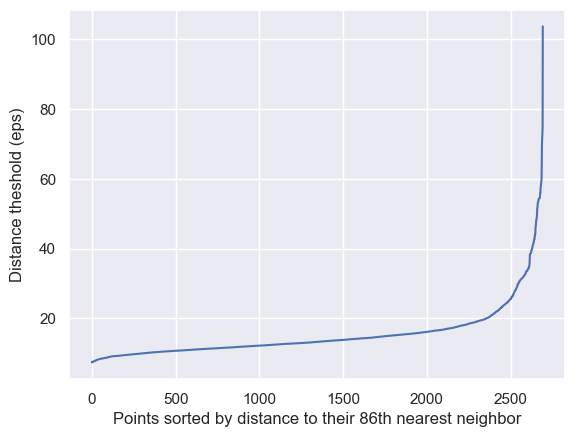

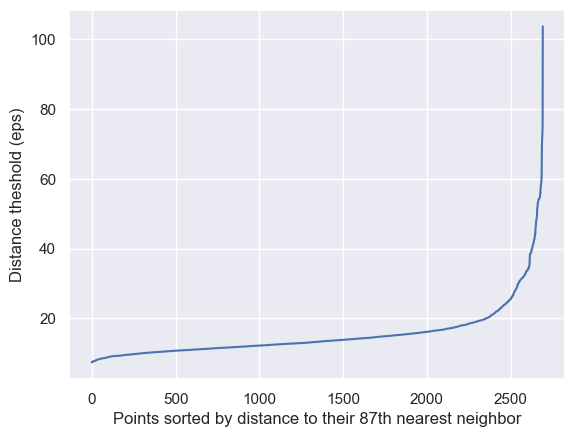

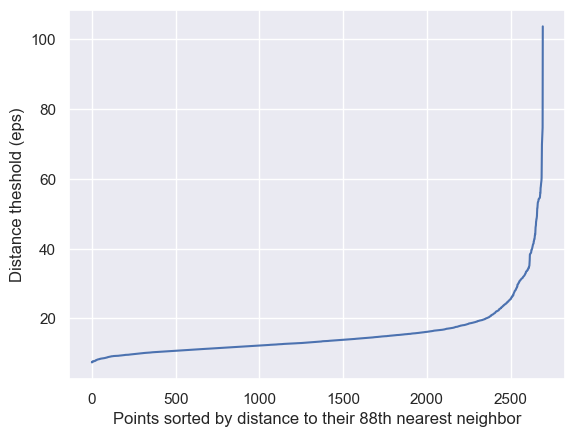

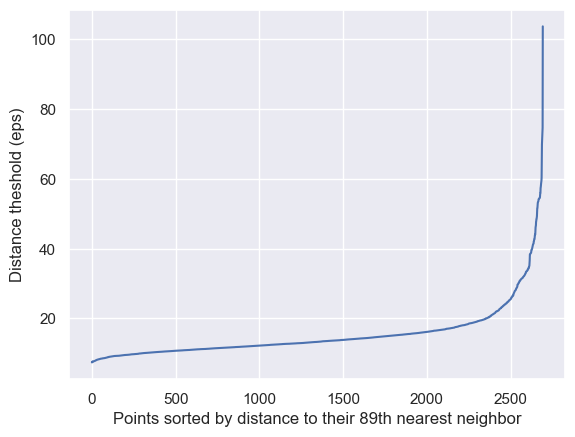

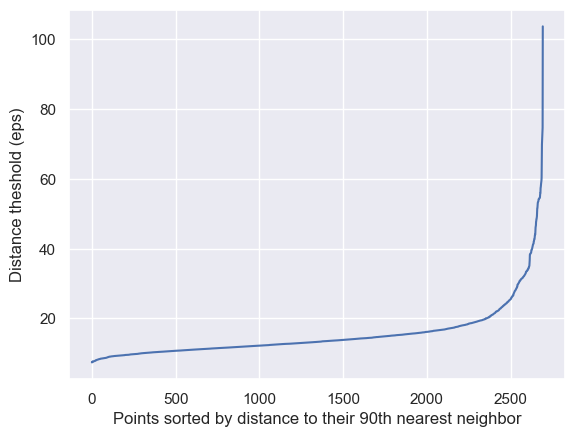

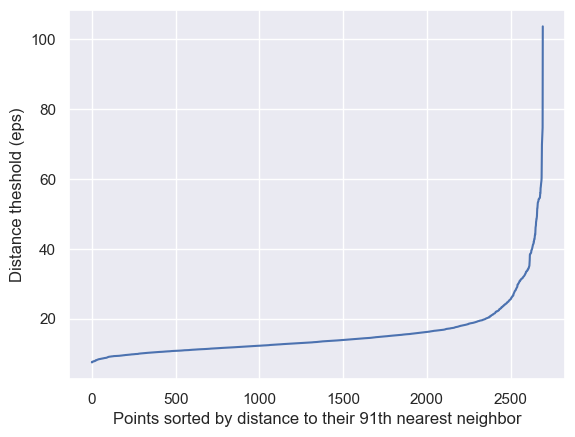

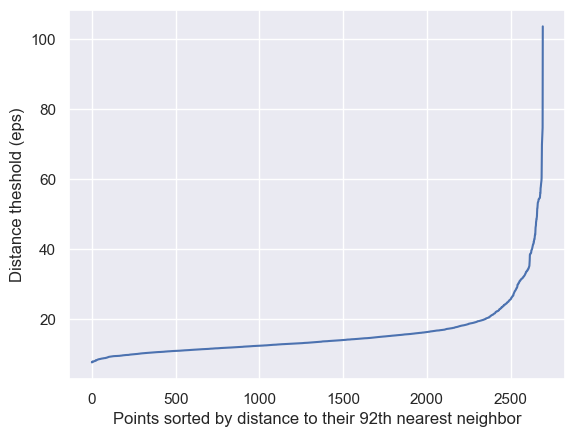

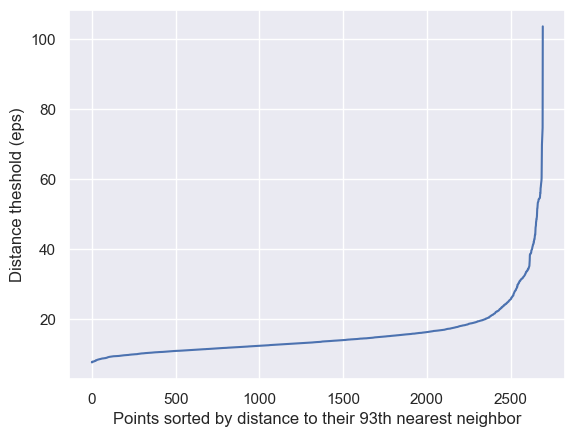

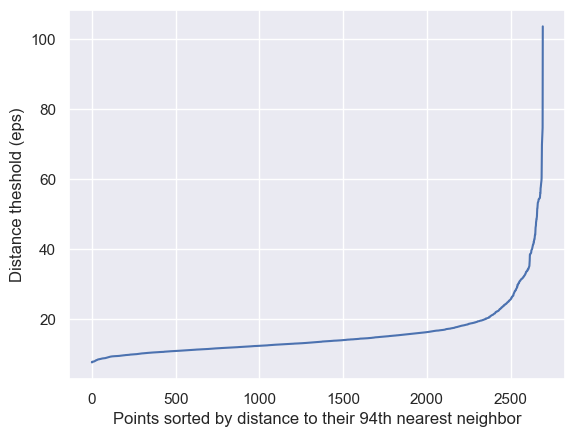

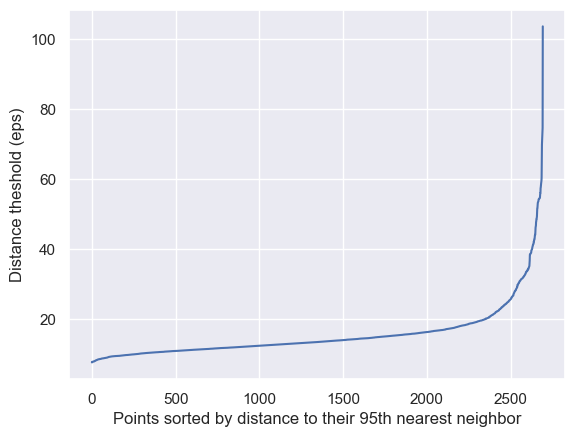

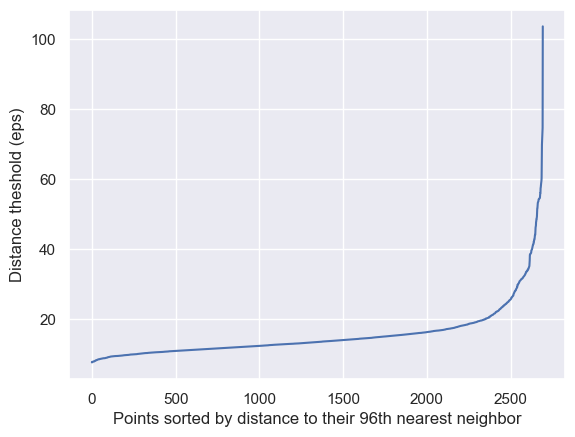

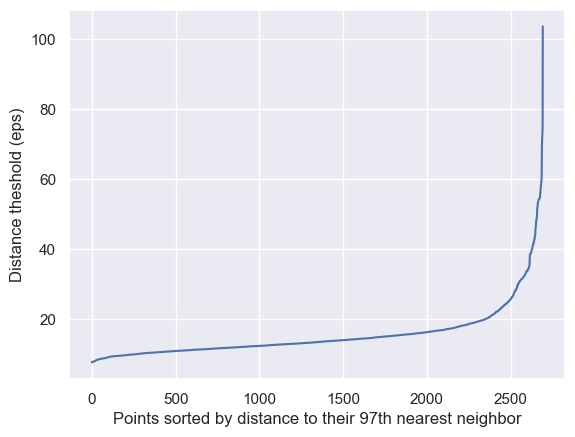

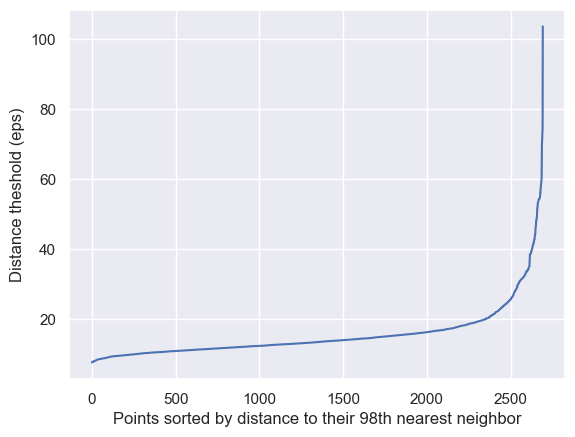

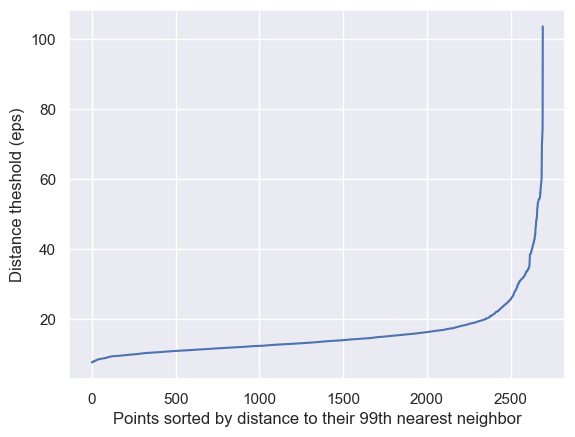

In [195]:
# Choose a value for k
k2 = np.arange(2, 100)
for k in k2:
    # Compute the distances to the kth nearest neighbor
    nearest_neighbors2 = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(array_data_numeric_standarized)
    distances2, indices2 = nearest_neighbors2.kneighbors(array_data_numeric_standarized)
    k_distances2 = np.sort(distances2[:, -1])

    # Plot the sorted distances
    plt.plot(k_distances2)
    plt.xlabel(f'Points sorted by distance to their {k}th nearest neighbor')
    plt.ylabel('Distance theshold (eps)')
    plt.show()

Best eps for (k=2) : 70.0


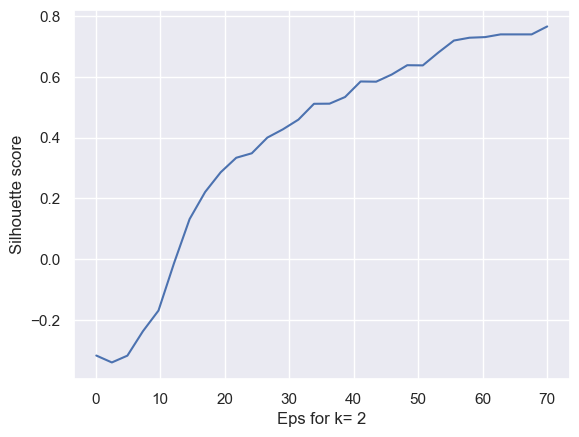

Best eps for (k=3) : 70.0


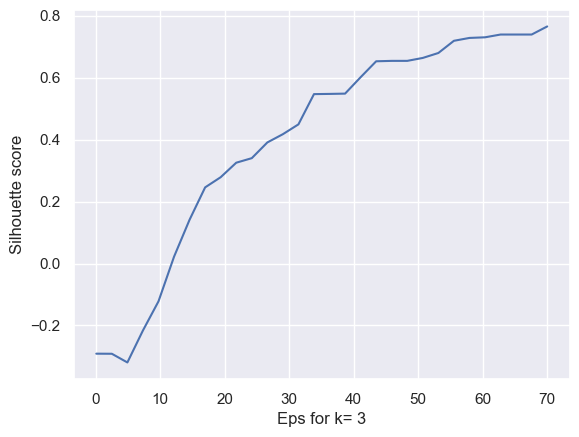

Best eps for (k=4) : 70.0


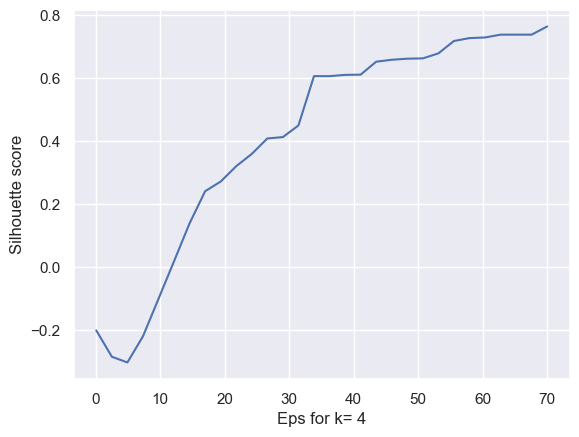

Best eps for (k=5) : 70.0


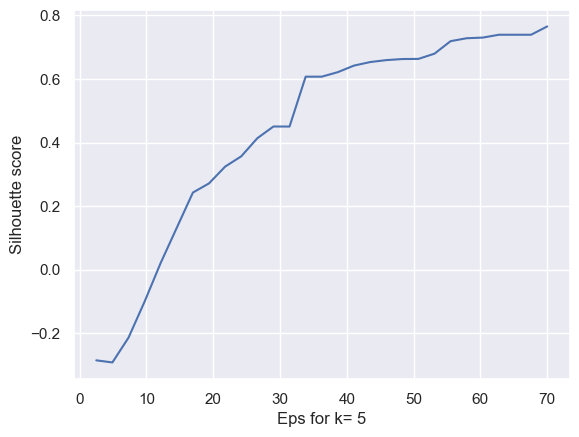

Best eps for (k=6) : 70.0


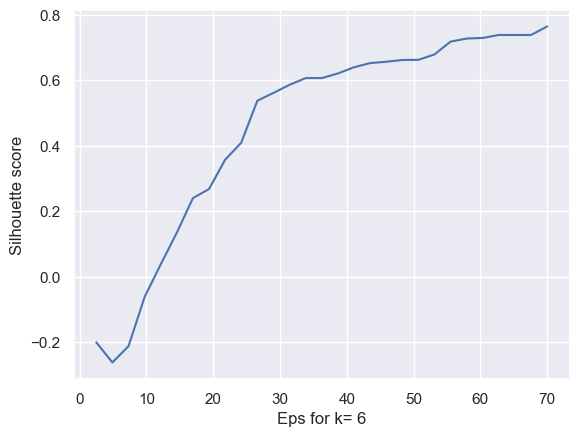

Best eps for (k=7) : 70.0


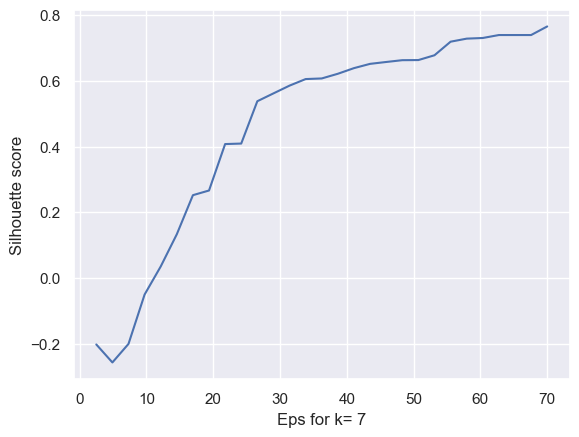

Best eps for (k=8) : 70.0


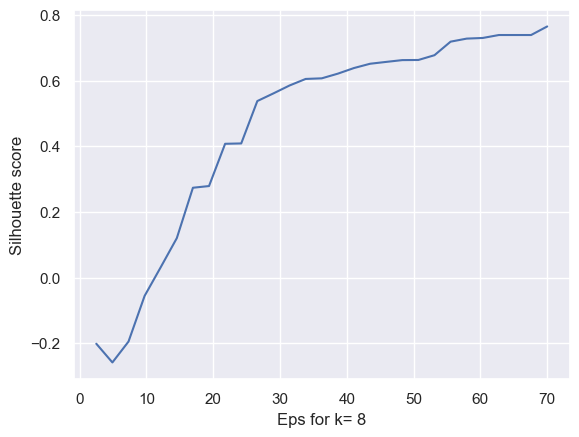

Best eps for (k=9) : 70.0


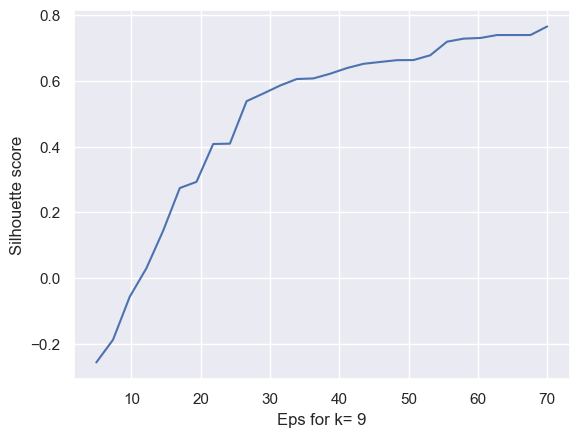

Best eps for (k=10) : 70.0


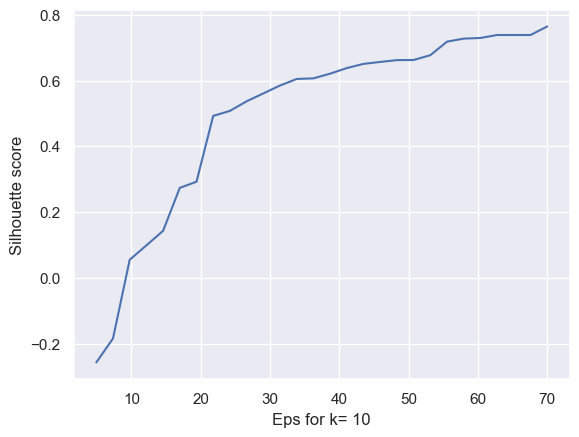

Best eps for (k=11) : 70.0


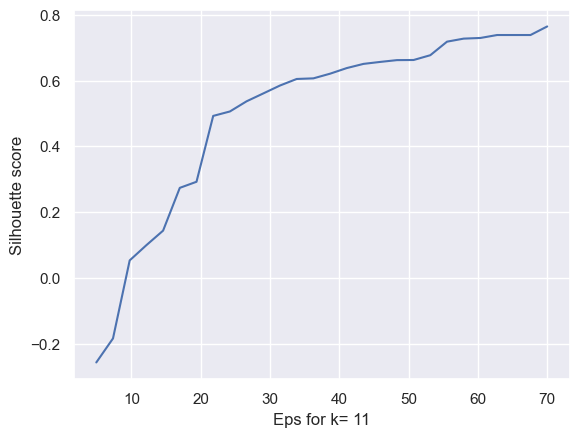

Best eps for (k=12) : 70.0


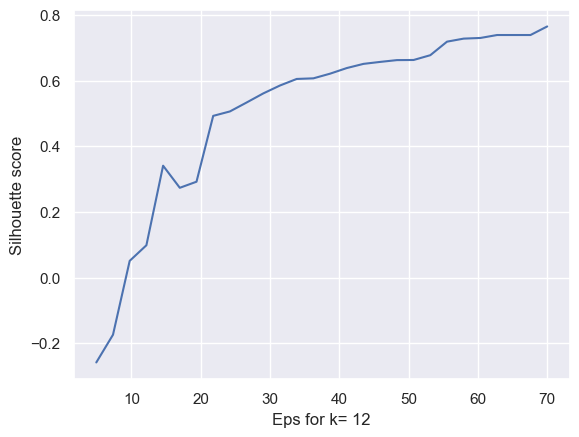

Best eps for (k=13) : 70.0


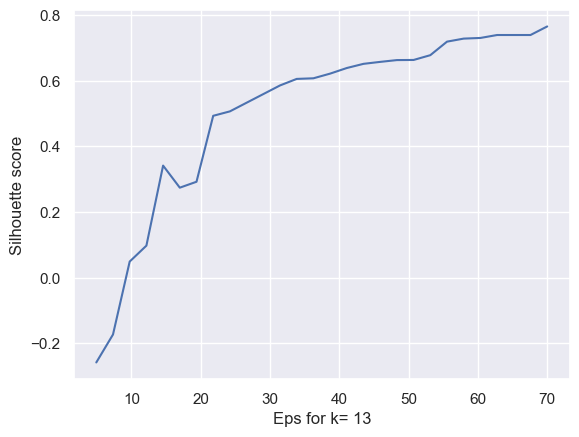

Best eps for (k=14) : 70.0


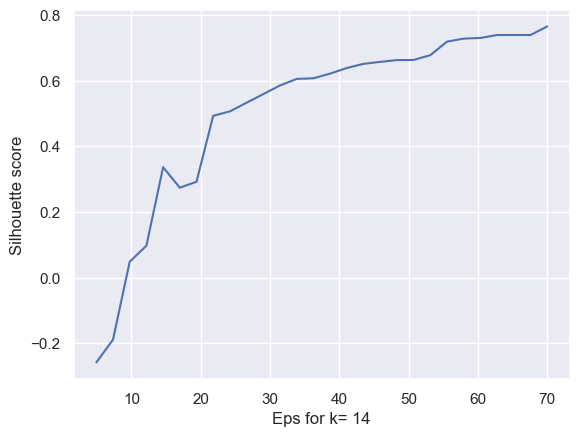

Best eps for (k=15) : 70.0


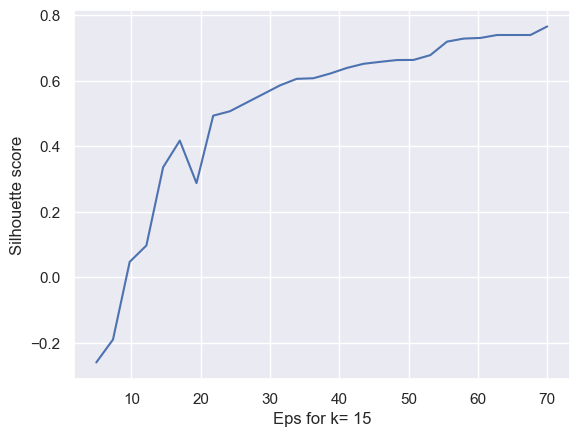

Best eps for (k=16) : 70.0


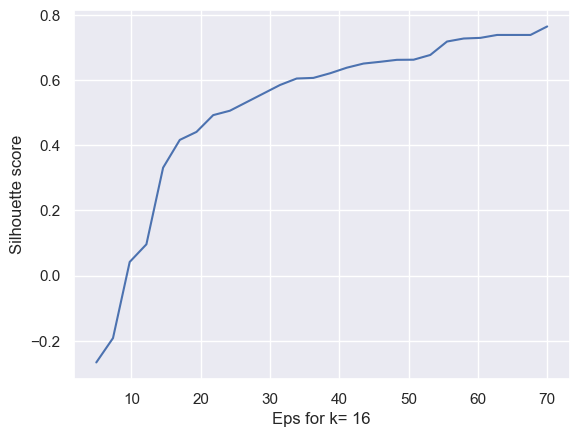

Best eps for (k=17) : 70.0


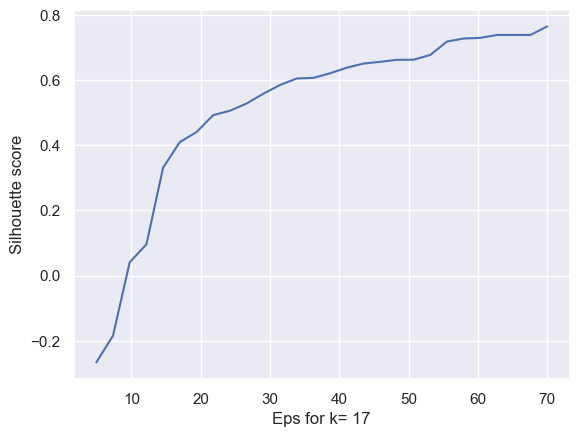

Best eps for (k=18) : 70.0


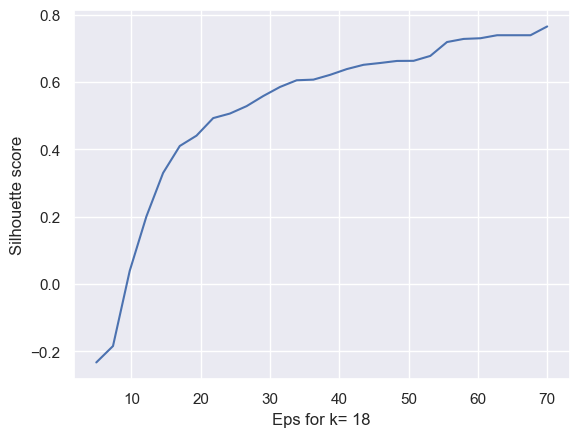

Best eps for (k=19) : 70.0


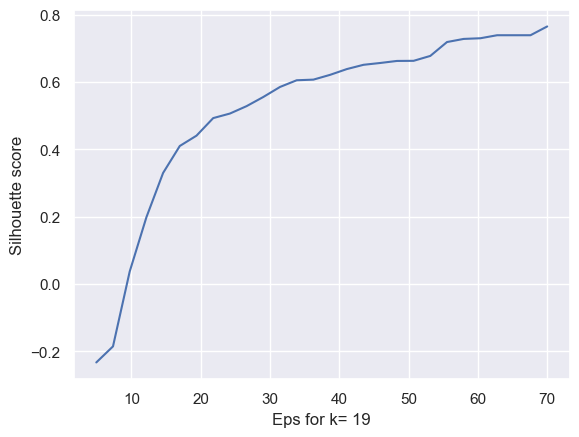

Best eps for (k=20) : 70.0


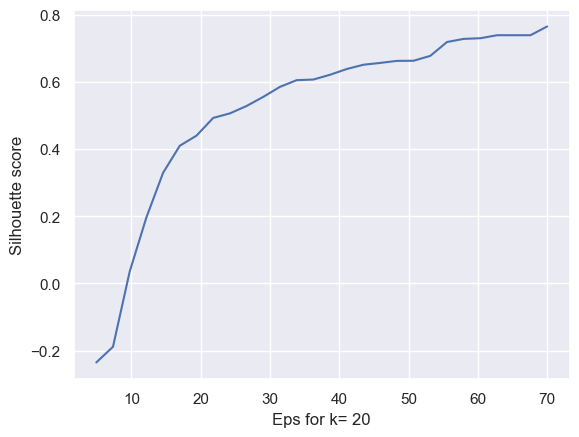

Best eps for (k=21) : 70.0


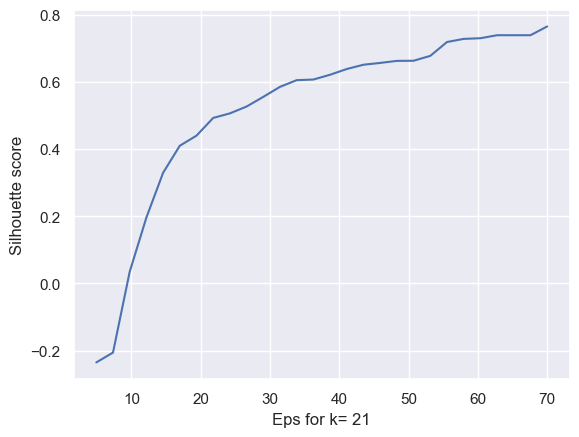

Best eps for (k=22) : 70.0


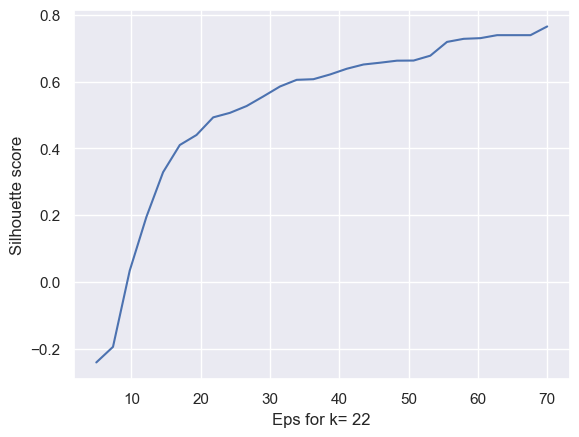

Best eps for (k=23) : 70.0


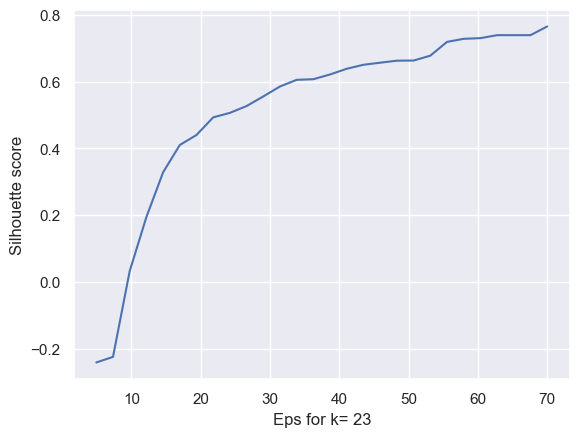

Best eps for (k=24) : 70.0


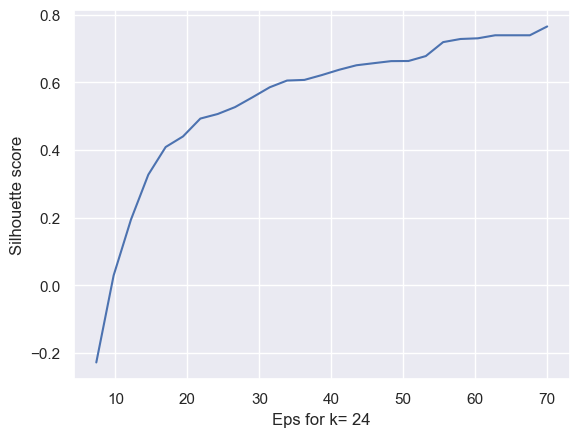

Best eps for (k=25) : 70.0


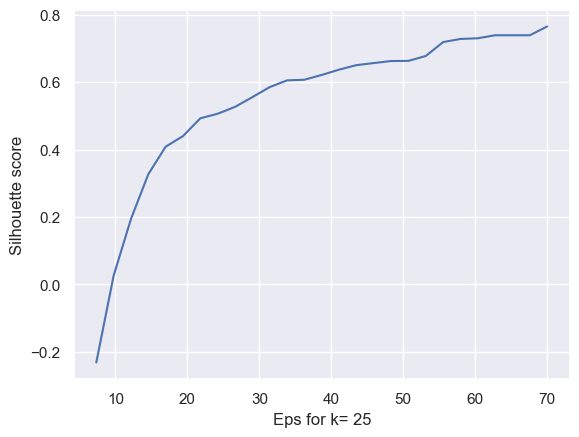

Best eps for (k=26) : 70.0


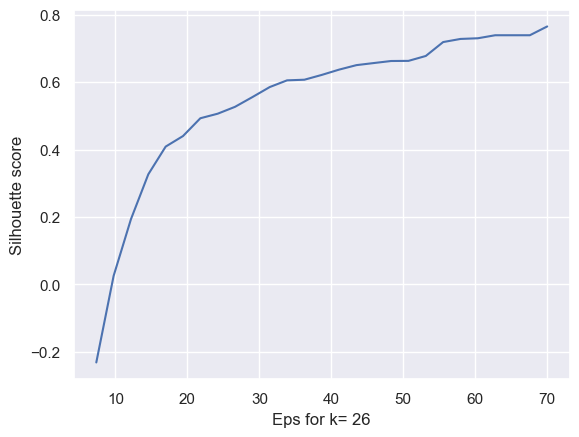

Best eps for (k=27) : 70.0


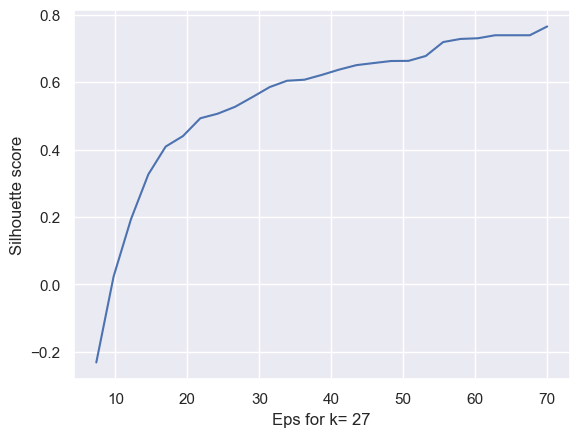

Best eps for (k=28) : 70.0


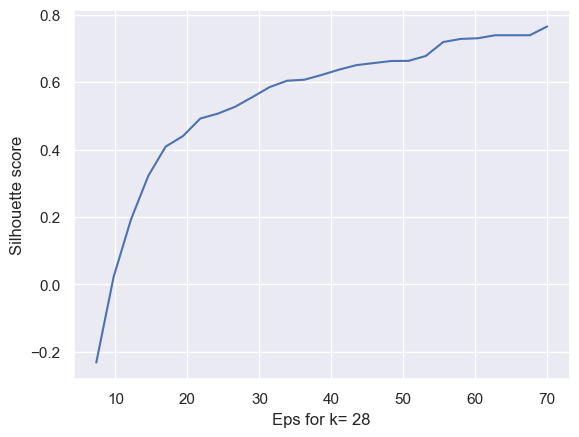

Best eps for (k=29) : 70.0


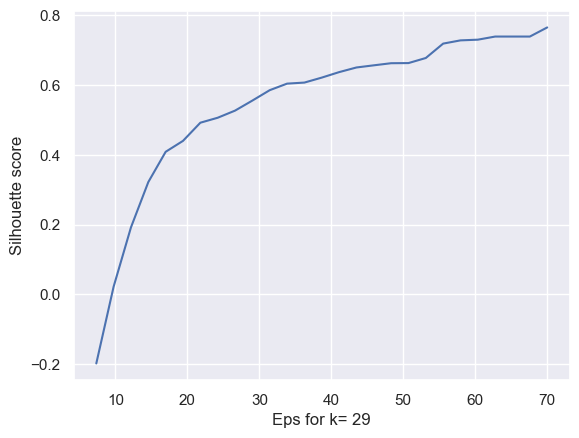

Best eps for (k=30) : 70.0


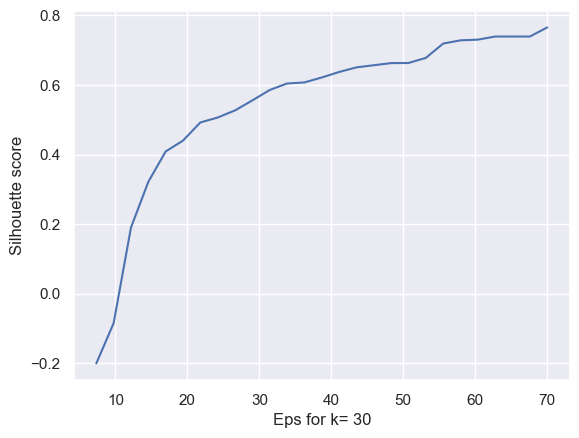

Best eps for (k=31) : 70.0


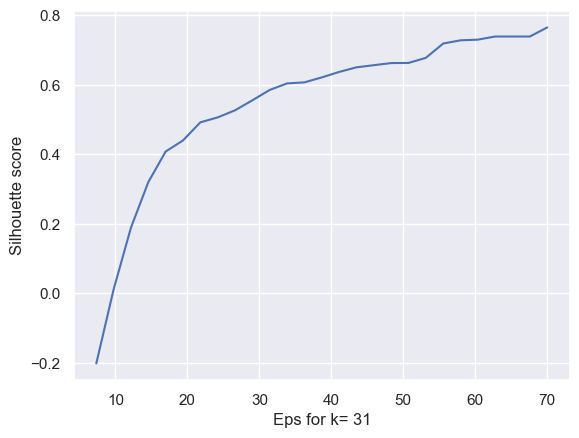

Best eps for (k=32) : 70.0


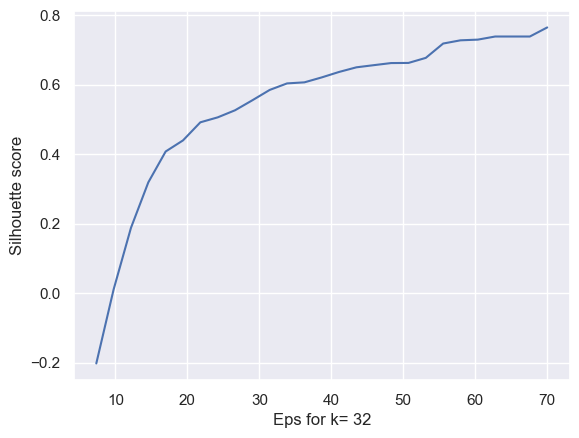

Best eps for (k=33) : 70.0


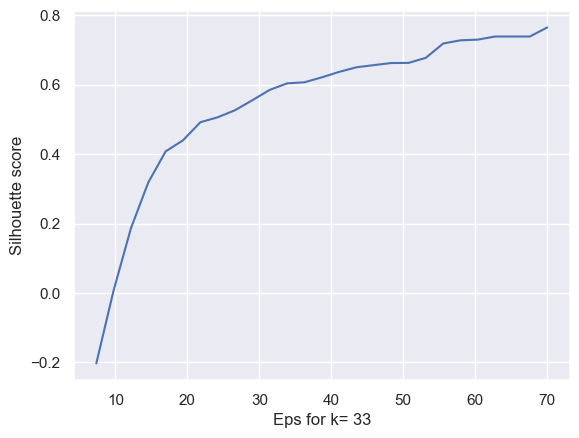

Best eps for (k=34) : 70.0


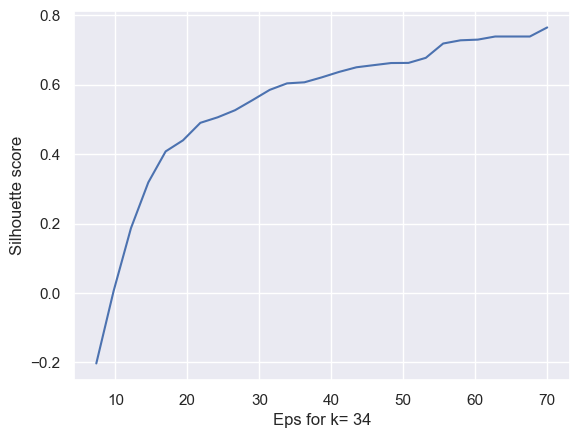

Best eps for (k=35) : 70.0


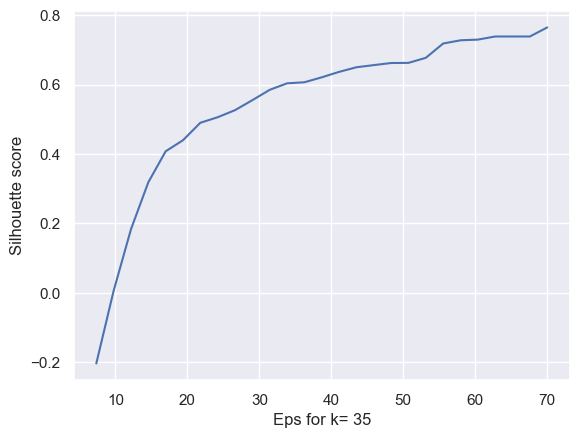

Best eps for (k=36) : 70.0


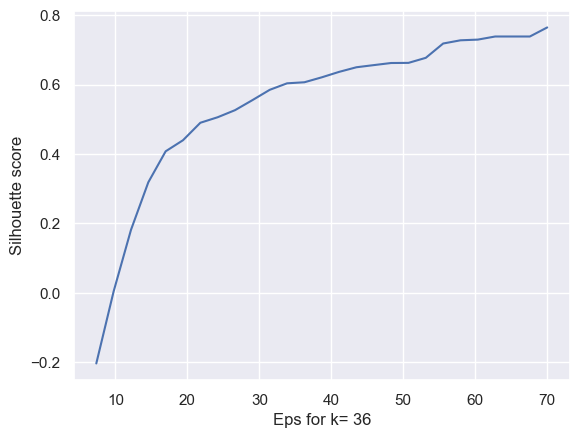

Best eps for (k=37) : 70.0


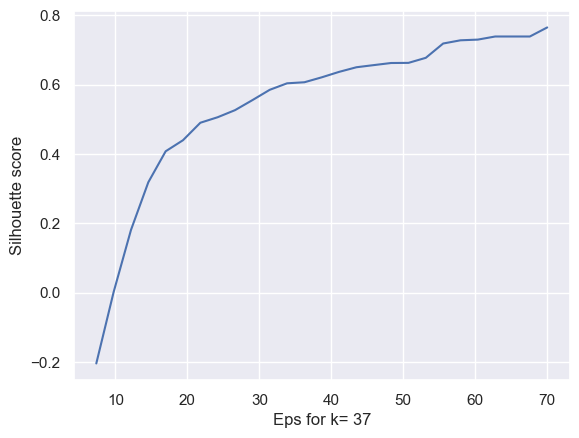

Best eps for (k=38) : 70.0


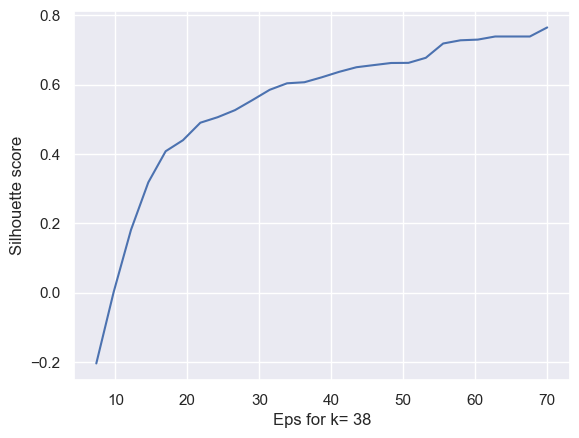

Best eps for (k=39) : 70.0


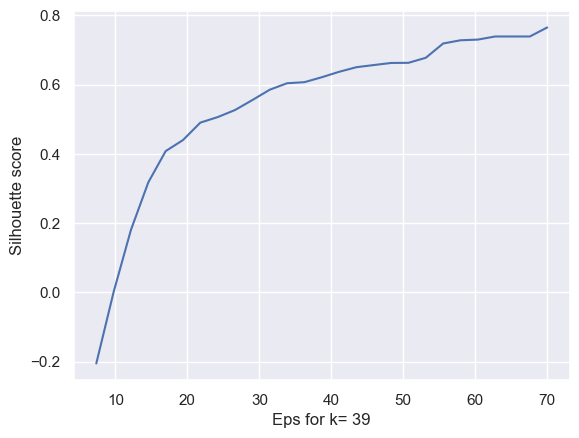

Best eps for (k=40) : 70.0


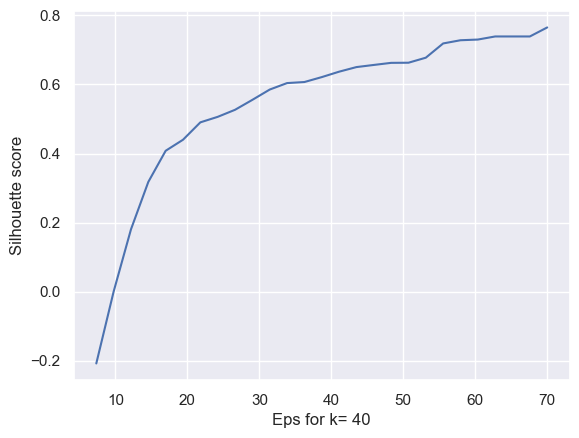

Best eps for (k=41) : 70.0


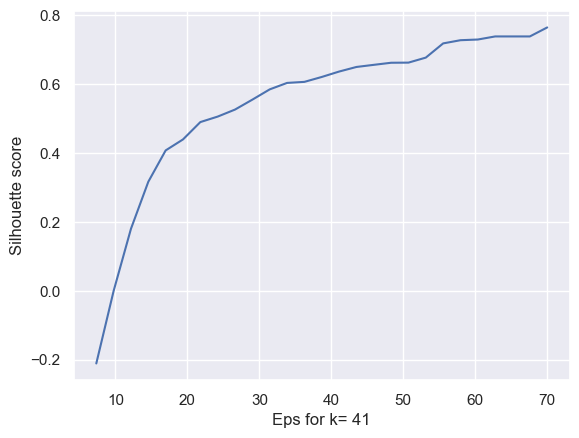

Best eps for (k=42) : 70.0


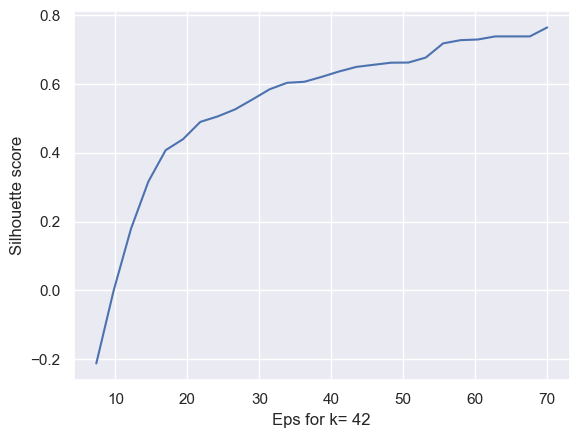

Best eps for (k=43) : 70.0


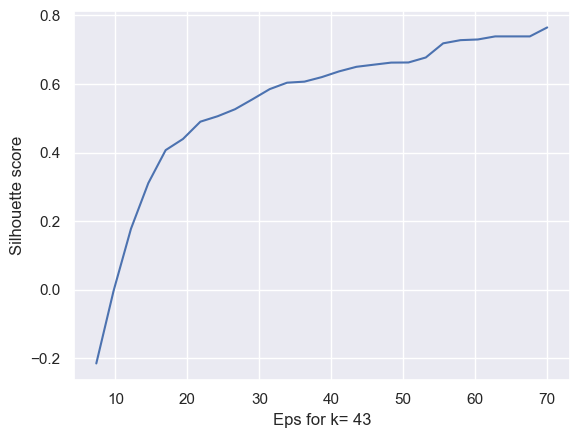

Best eps for (k=44) : 70.0


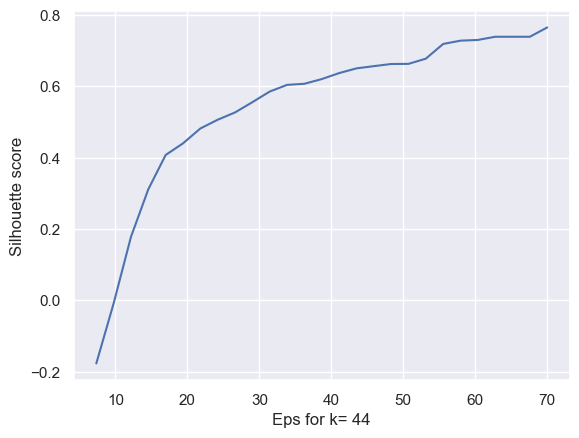

Best eps for (k=45) : 70.0


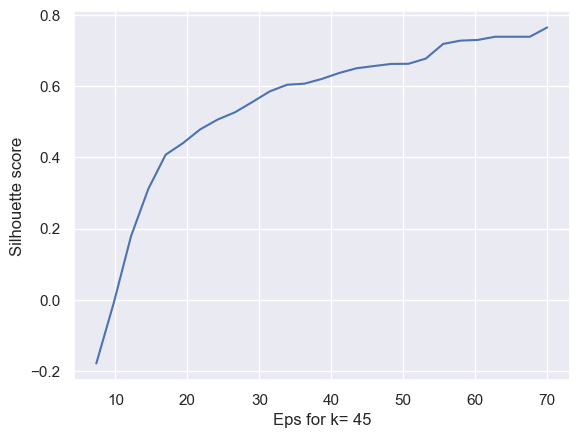

Best eps for (k=46) : 70.0


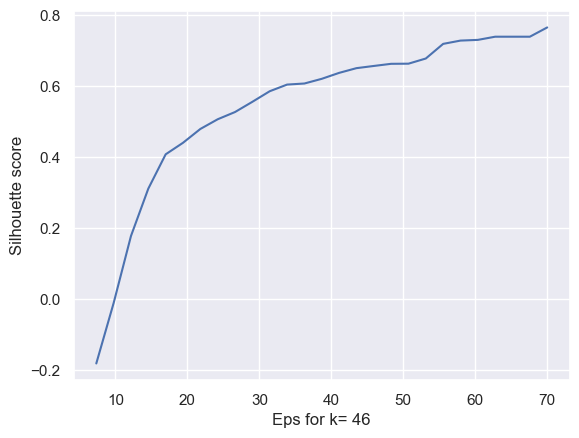

Best eps for (k=47) : 70.0


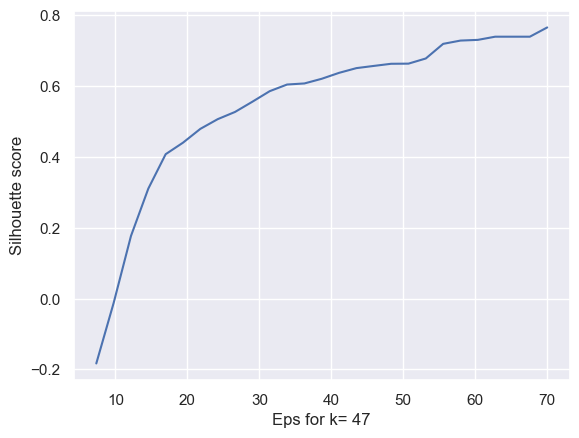

Best eps for (k=48) : 70.0


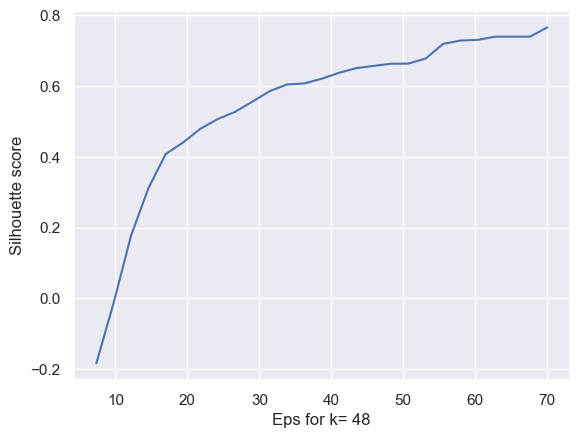

Best eps for (k=49) : 70.0


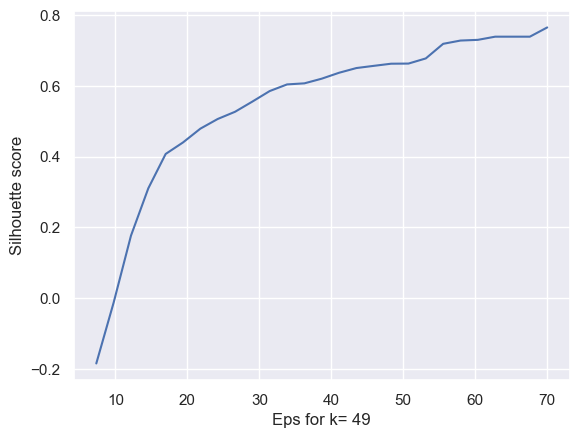

Best eps for (k=50) : 70.0


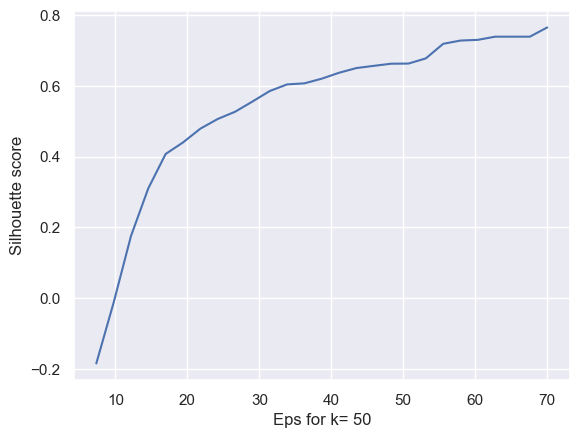

Best eps for (k=51) : 70.0


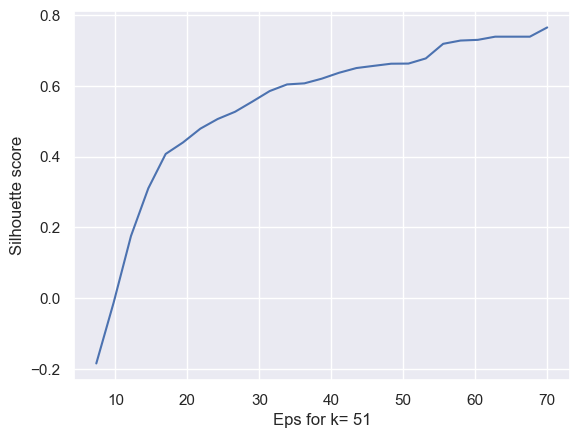

Best eps for (k=52) : 70.0


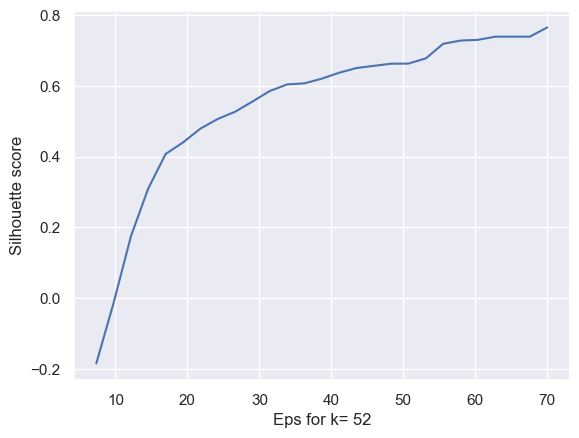

Best eps for (k=53) : 70.0


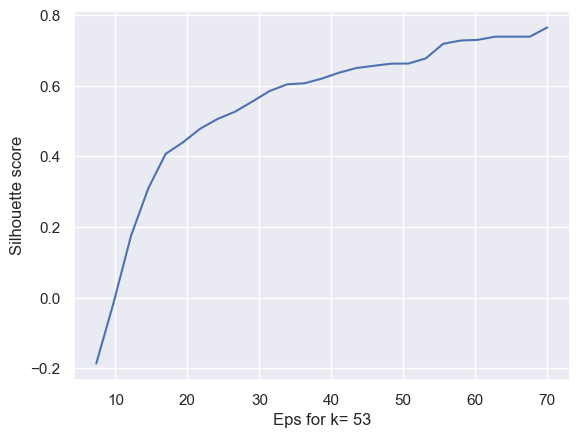

Best eps for (k=54) : 70.0


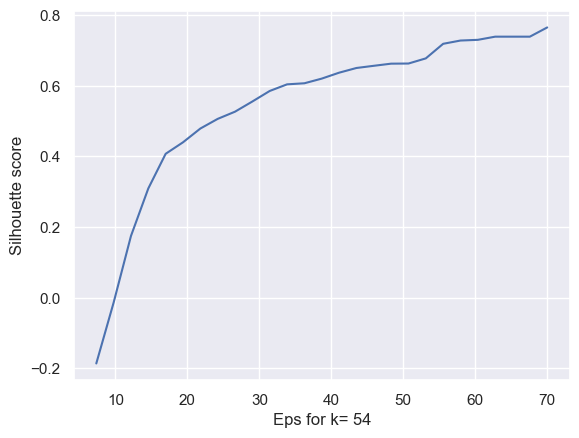

Best eps for (k=55) : 70.0


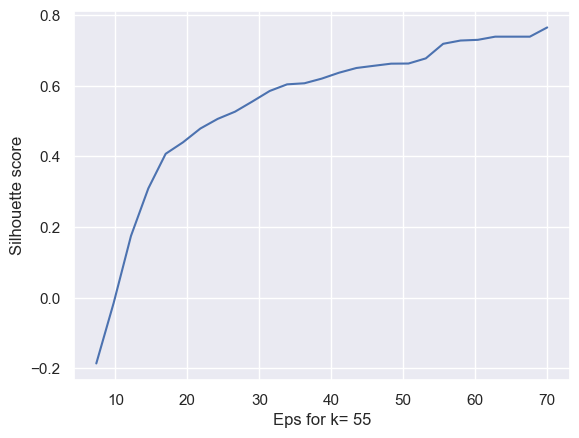

Best eps for (k=56) : 70.0


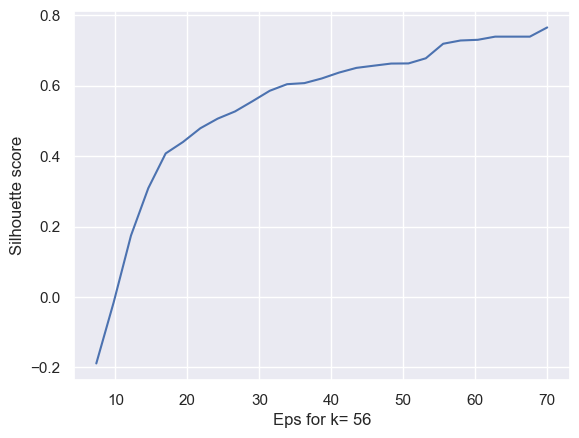

Best eps for (k=57) : 70.0


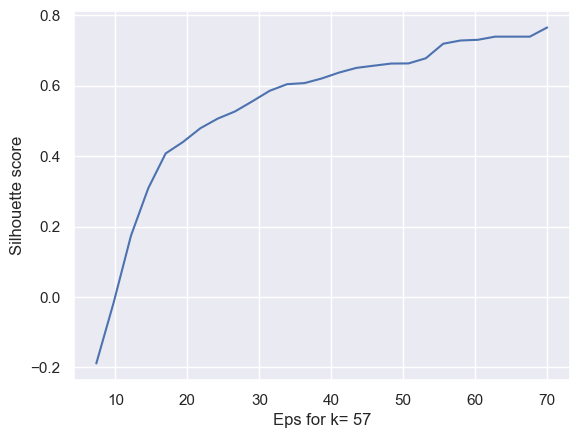

Best eps for (k=58) : 70.0


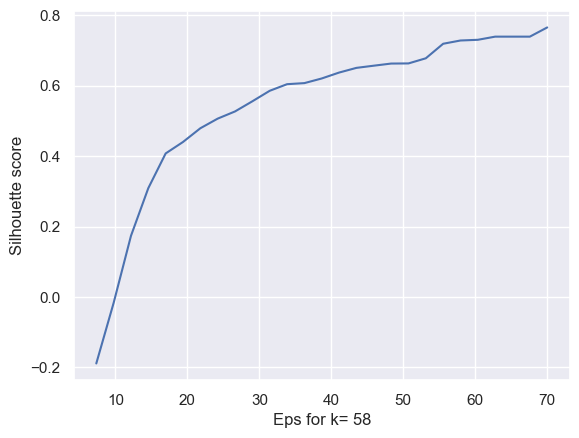

Best eps for (k=59) : 70.0


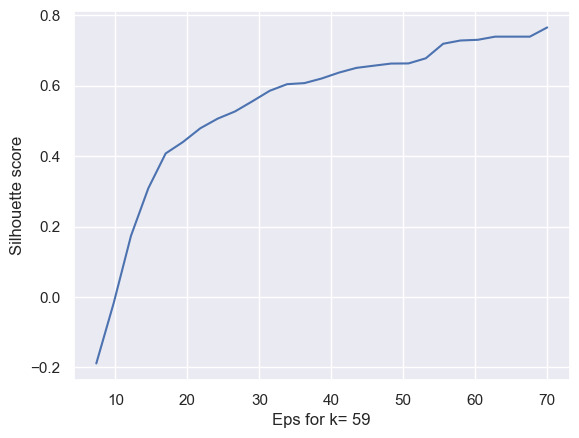

Best eps for (k=60) : 70.0


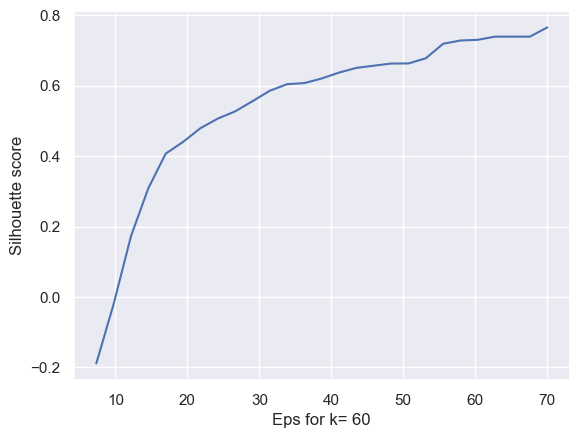

Best eps for (k=61) : 70.0


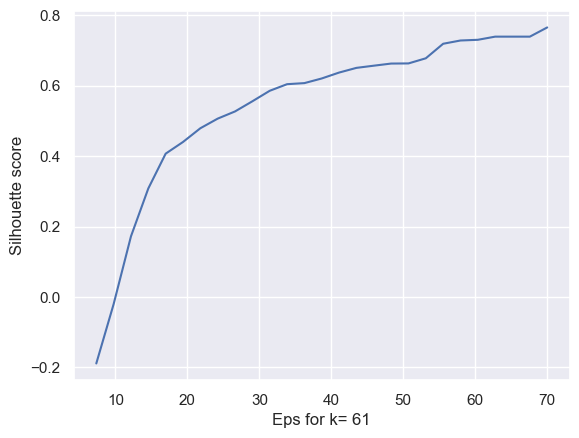

Best eps for (k=62) : 70.0


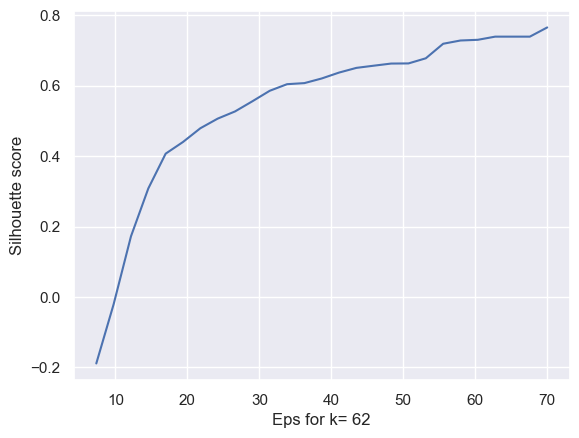

Best eps for (k=63) : 70.0


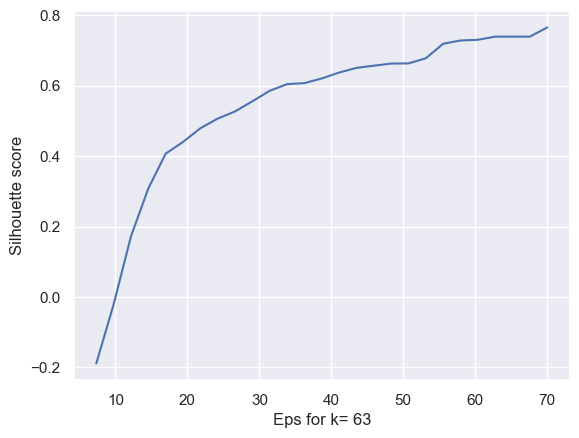

Best eps for (k=64) : 70.0


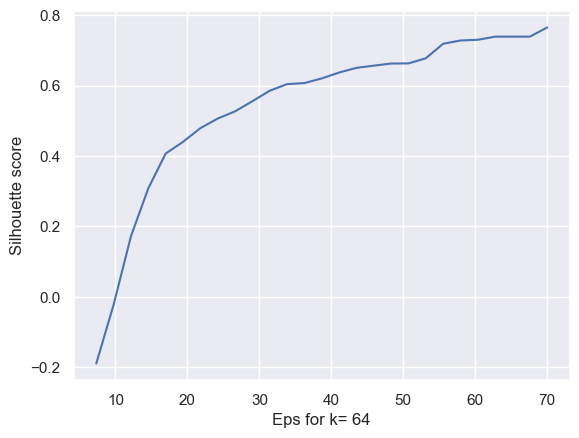

Best eps for (k=65) : 70.0


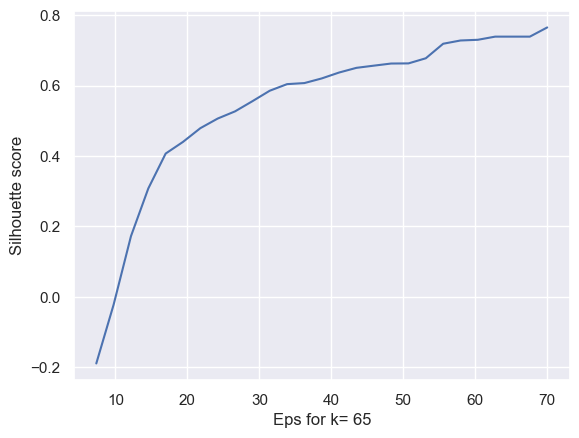

Best eps for (k=66) : 70.0


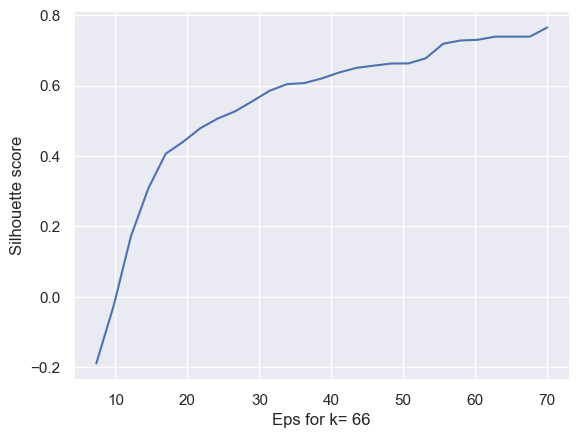

Best eps for (k=67) : 70.0


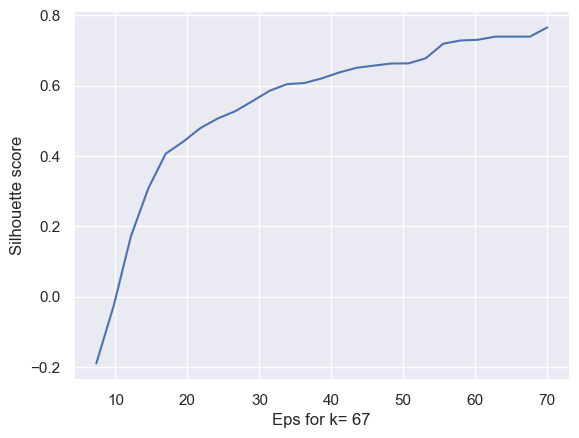

Best eps for (k=68) : 70.0


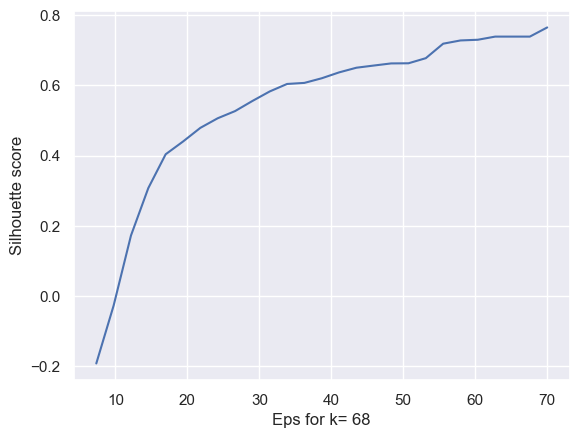

Best eps for (k=69) : 70.0


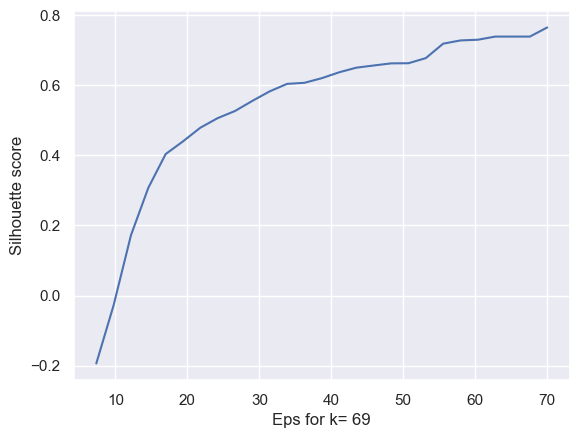

Best eps for (k=70) : 70.0


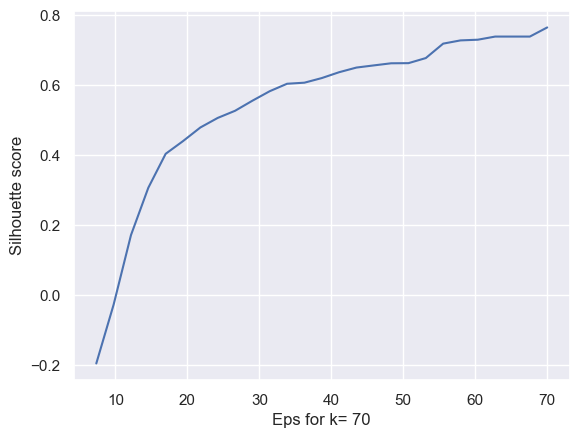

Best eps for (k=71) : 70.0


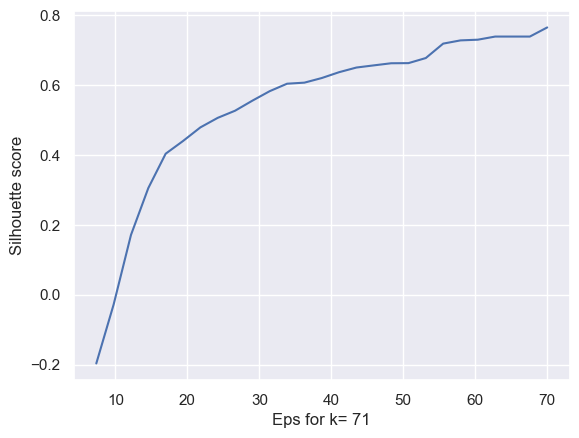

Best eps for (k=72) : 70.0


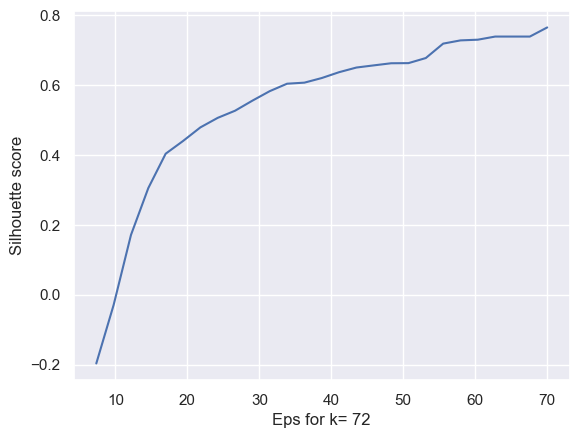

Best eps for (k=73) : 70.0


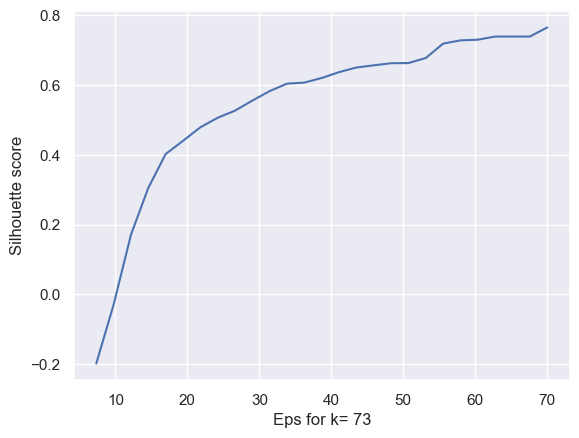

Best eps for (k=74) : 70.0


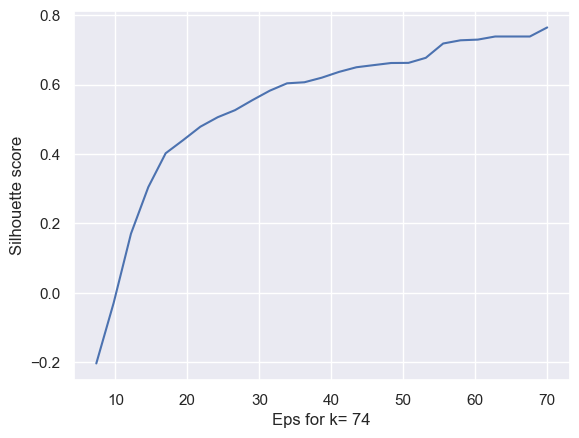

Best eps for (k=75) : 70.0


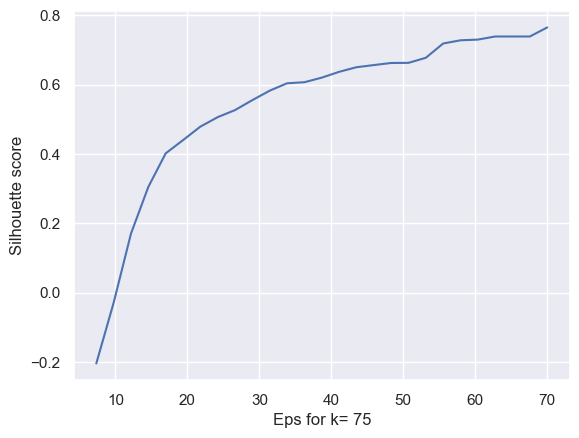

Best eps for (k=76) : 70.0


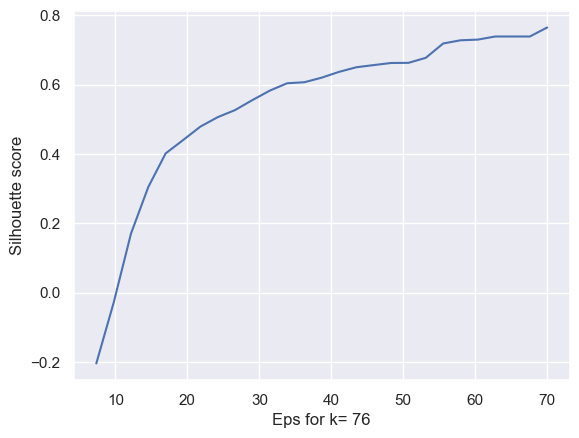

Best eps for (k=77) : 70.0


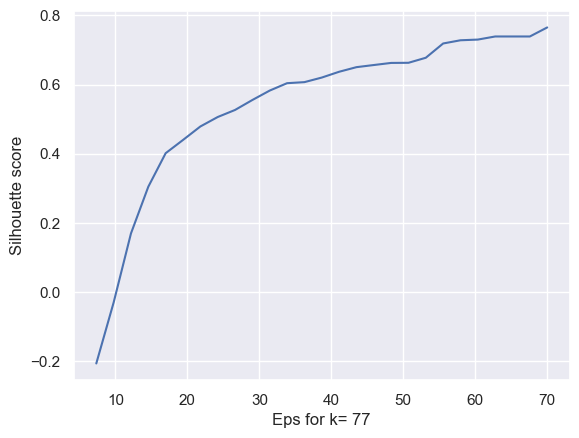

Best eps for (k=78) : 70.0


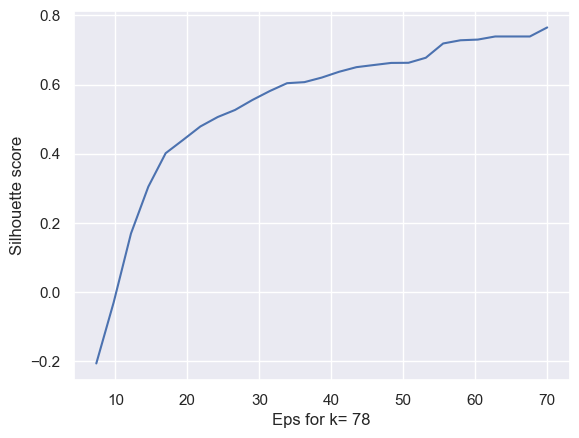

Best eps for (k=79) : 70.0


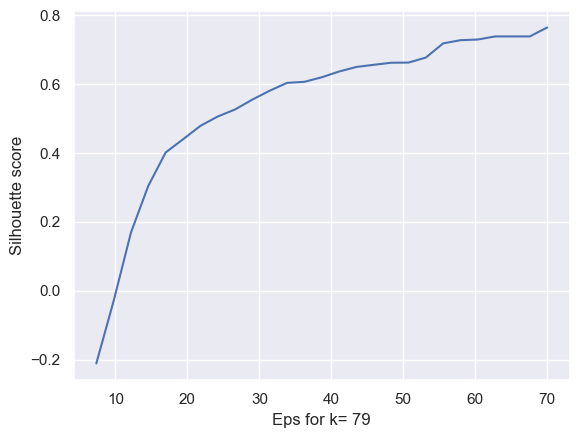

Best eps for (k=80) : 70.0


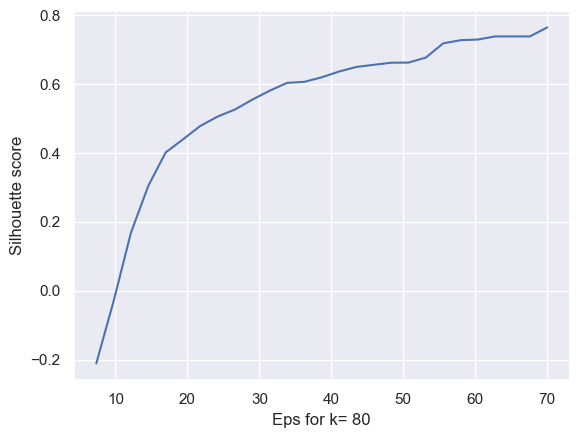

Best eps for (k=81) : 70.0


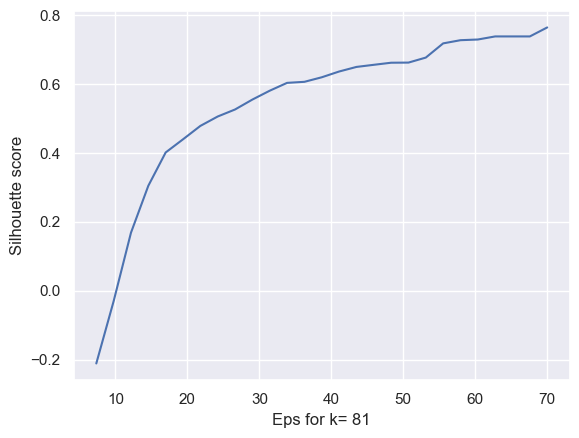

Best eps for (k=82) : 70.0


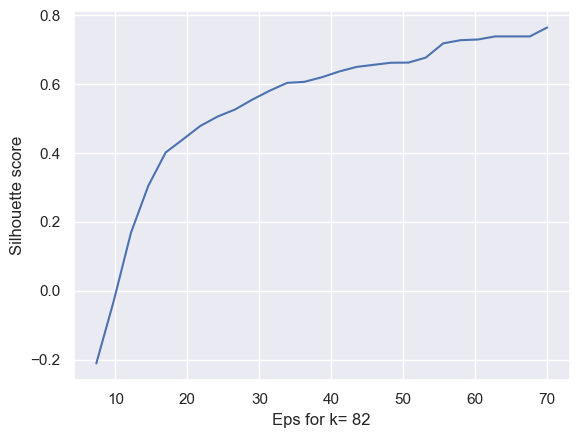

Best eps for (k=83) : 70.0


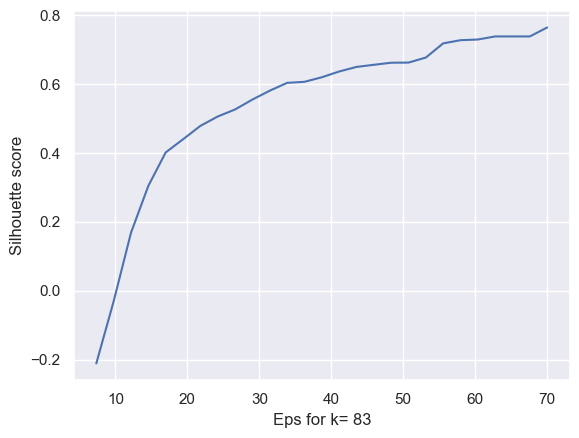

Best eps for (k=84) : 70.0


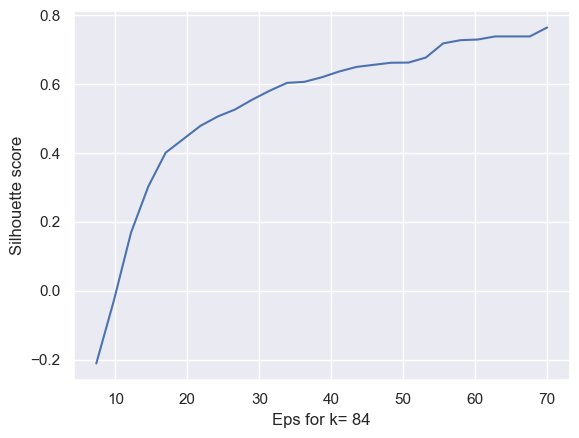

Best eps for (k=85) : 70.0


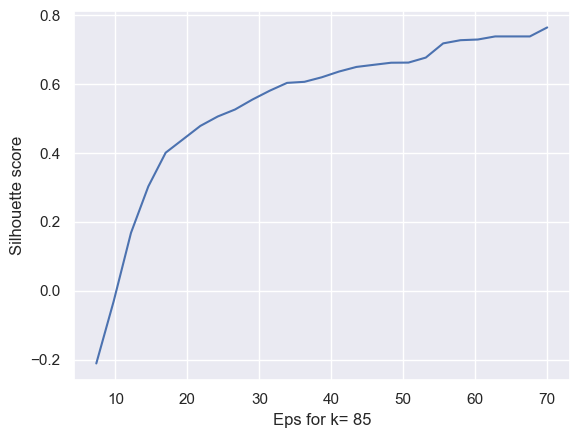

Best eps for (k=86) : 70.0


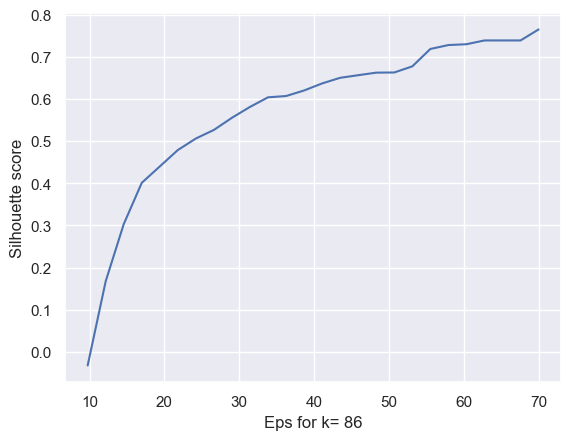

Best eps for (k=87) : 70.0


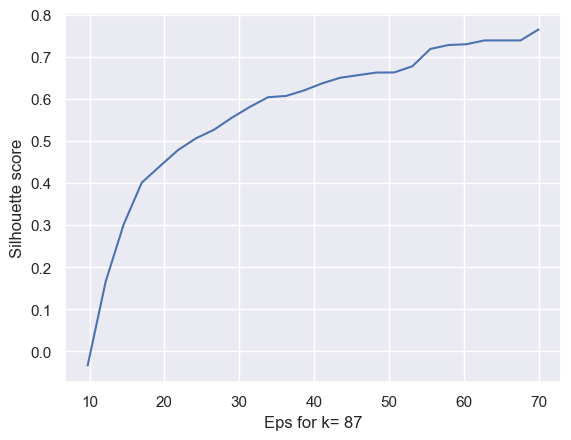

Best eps for (k=88) : 70.0


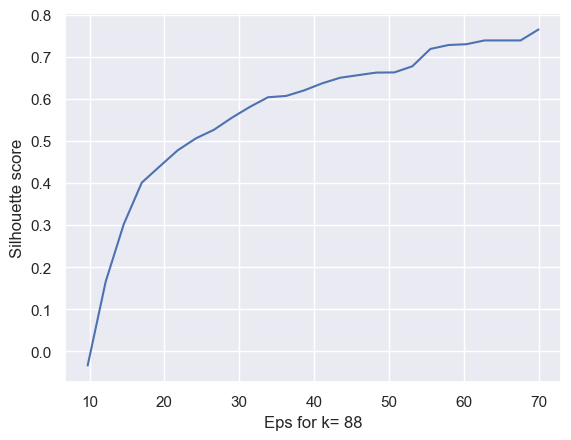

Best eps for (k=89) : 70.0


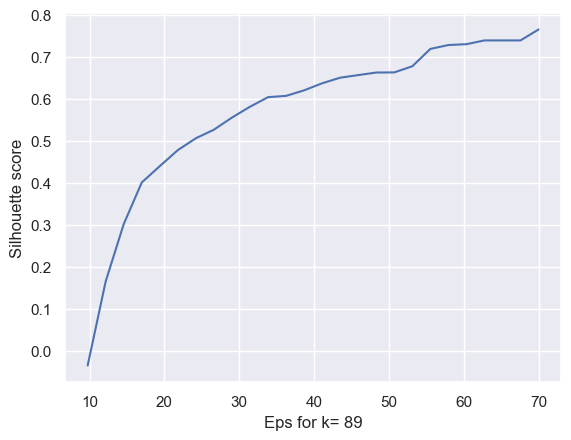

Best eps for (k=90) : 70.0


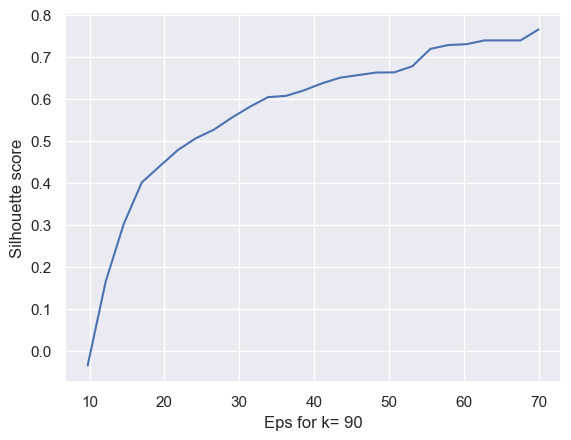

Best eps for (k=91) : 70.0


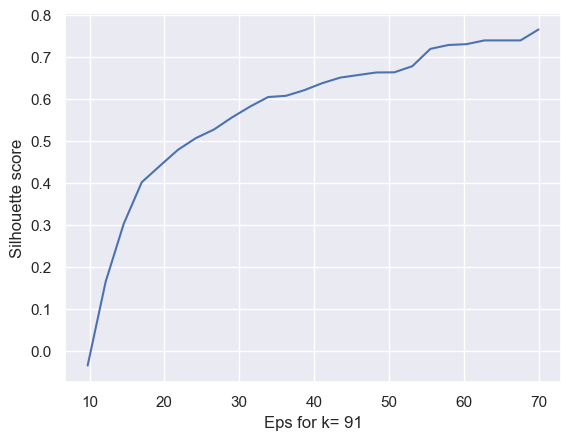

Best eps for (k=92) : 70.0


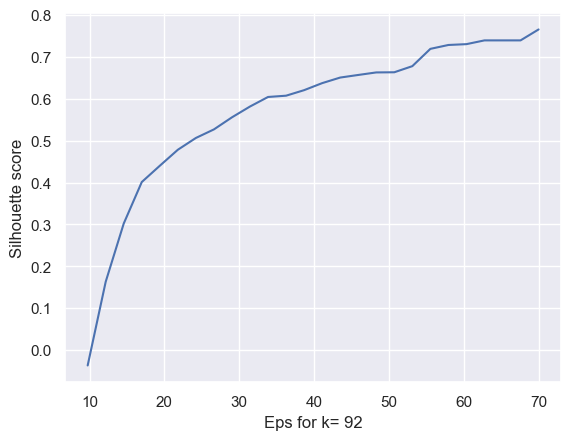

Best eps for (k=93) : 70.0


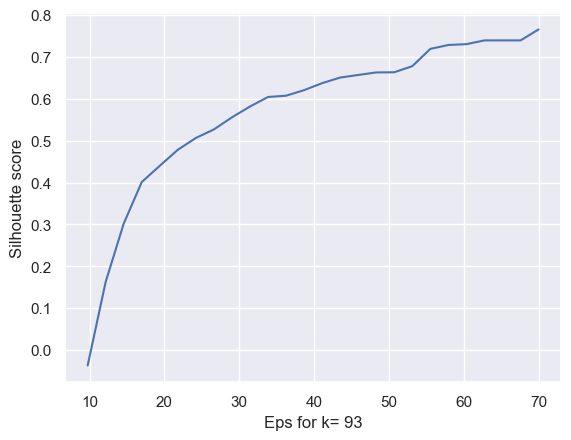

Best eps for (k=94) : 70.0


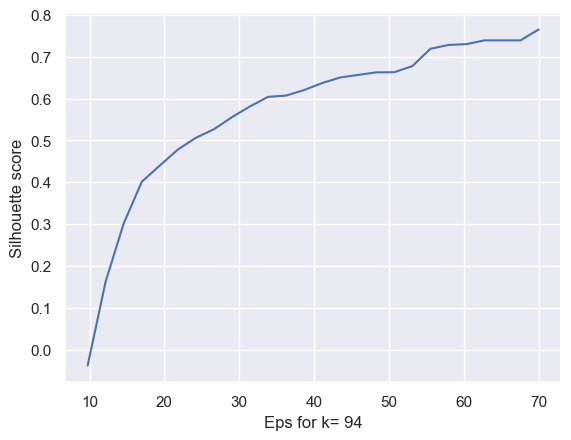

Best eps for (k=95) : 70.0


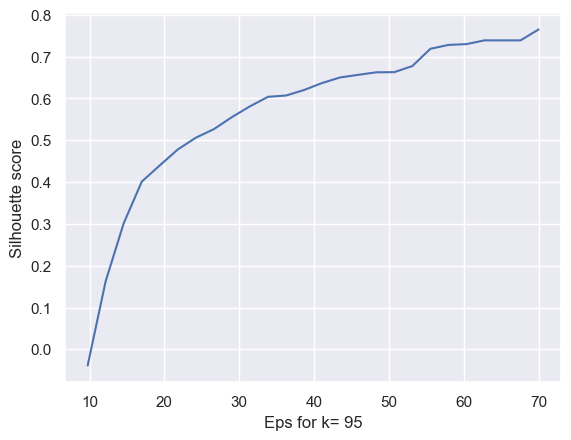

Best eps for (k=96) : 70.0


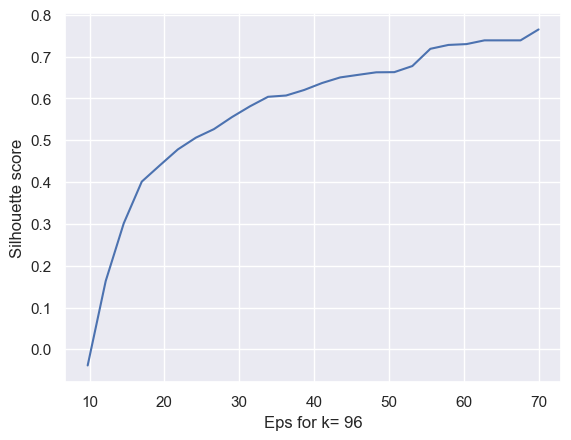

Best eps for (k=97) : 70.0


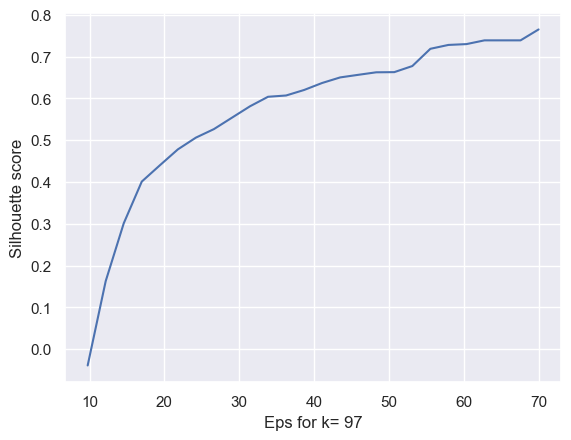

Best eps for (k=98) : 70.0


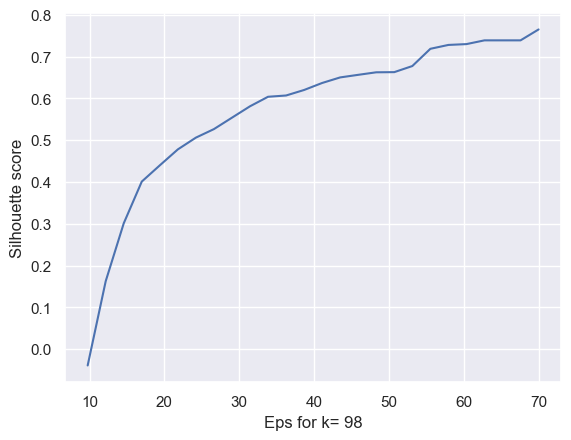

Best eps for (k=99) : 70.0


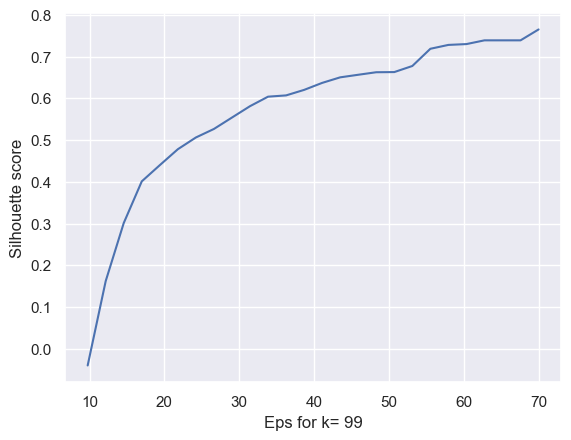

In [204]:
# Choose a range of eps values to try
eps_range = np.linspace(0.1, 70.0, num=30)
best_eps = []

for k in k2:
    # Compute the distances to the kth nearest neighbor
    nearest_neighbors2 = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(array_data_numeric_standarized)
    distances2, indices2 = nearest_neighbors2.kneighbors(array_data_numeric_standarized)
    k_distances2 = np.sort(distances2[:, -1])

    # Evaluate DBSCAN with different values of eps
    silhouette_scores = []
    for eps in eps_range:
        dbscan = DBSCAN(eps=eps, min_samples=k)
        dbscan.fit(array_data_numeric_standarized)
        if len(set(dbscan.labels_)) > 1: # check if there is more than one cluster
            silhouette_scores.append((eps, silhouette_score(array_data_numeric_standarized, dbscan.labels_)))
    
    eps, scores = zip(*silhouette_scores)

    best_eps.append((k, eps[np.argmax(scores)]))
    print(f'Best eps for (k={k}) :', eps[np.argmax(scores)])
    
    # Plot the silhouette scores for different values of eps
    plt.xlabel(f'Eps for k= {k}')
    plt.plot(eps, scores)
    plt.ylabel('Silhouette score')
    plt.show()

* Best 'eps' for all 'k' values are = 70 !!

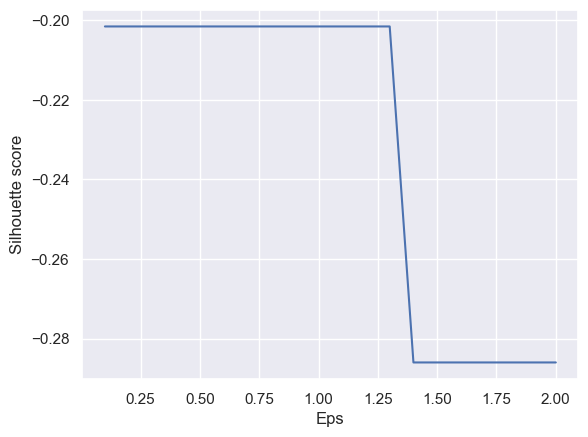

In [136]:
# Choose a range of eps values to try
eps_range = np.linspace(0.1, 2.0, num=20)
k=0
# Evaluate DBSCAN with different values of eps
silhouette_scores = []
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=k)
    dbscan.fit(array_data_numeric_standarized)
    if len(set(dbscan.labels_)) > 1: # check if there is more than one cluster
        silhouette_scores.append((eps, silhouette_score(array_data_numeric_standarized, dbscan.labels_)))

# Plot the silhouette scores for different values of eps
eps, scores = zip(*silhouette_scores)
plt.plot(eps, scores)
plt.xlabel('Eps')
plt.ylabel('Silhouette score')
plt.show()

Best eps:  0.1


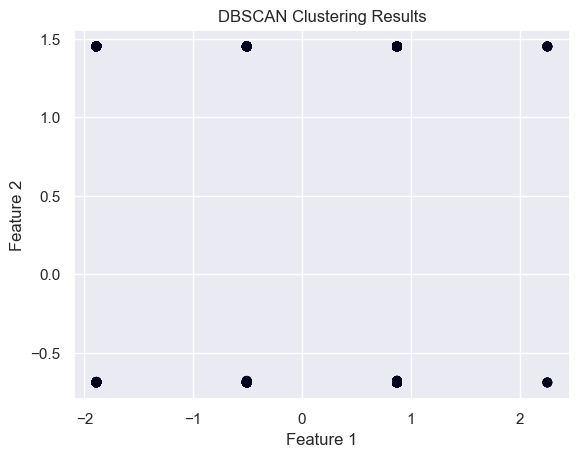

In [137]:
# Choose the best value of eps based on the silhouette score
best_eps = eps[np.argmax(scores)]
print('Best eps: ', best_eps)

# Run DBSCAN with the best value of eps and visualize the results
dbscan = DBSCAN(eps=best_eps, min_samples=k)
dbscan.fit(array_data_numeric_standarized)
plt.scatter(array_data_numeric_standarized[:, 0], array_data_numeric_standarized[:, 1], c=dbscan.labels_)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Results')
plt.show()

##### set range of hyperparameters values to try

Best hyperparameters: eps=50.0, min_samples=3


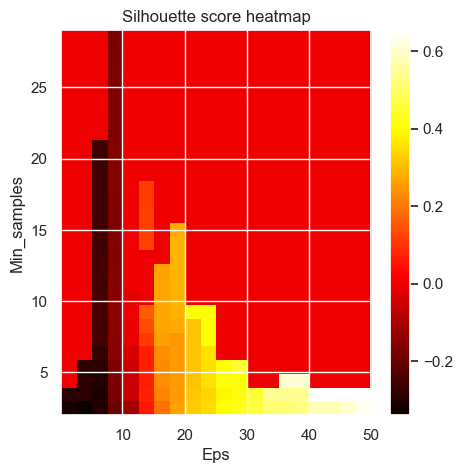

In [161]:
# set range of hyperparameter values to try
eps_range = np.linspace(0.1, 50.0, num=20)
min_samples_range = np.arange(2, 30)

# initialize array to store silhouette scores
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))

# loop over hyperparameter values and calculate silhouette scores
for indx_eps, eps in enumerate(eps_range):
    for indx_min_samples, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_numeric_standarized)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            silhouette_scores[indx_eps, indx_min_samples] = \
            silhouette_score(data_numeric_standarized, labels, metric = 'euclidean')


# plot silhouette score heatmap
plt.figure(figsize=(5, 5))
plt.title("Silhouette score heatmap")
plt.xlabel("Eps")
plt.ylabel("Min_samples")
plt.imshow(silhouette_scores.T, cmap='hot', interpolation='nearest',
           extent=[eps_range[0], eps_range[-1], 
                   min_samples_range[0], min_samples_range[-1]],
           aspect='auto', origin='lower')
plt.colorbar()

# select best hyperparameters based on evaluation metrics
best_eps_idx, best_min_samples_idx = np.unravel_index(
    np.argmax(silhouette_scores), silhouette_scores.shape)
best_eps = eps_range[best_eps_idx]
best_min_samples = min_samples_range[best_min_samples_idx]
print(f"Best hyperparameters: eps={best_eps}, min_samples={best_min_samples}")

##### set a **bigger** range of hyperparameters values to try

Best hyperparameters: eps=47.42105263157895, min_samples=3


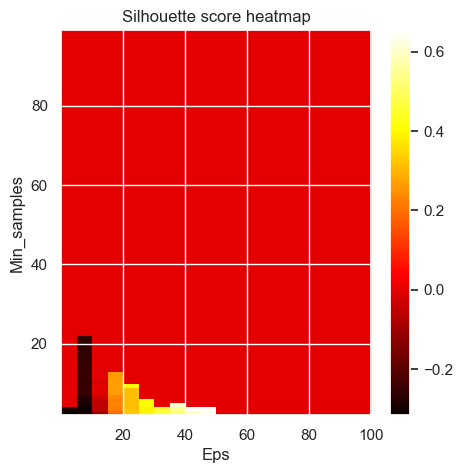

In [162]:
# set range of hyperparameter values to try
eps_range = np.linspace(0.1, 100.0, num=20)
min_samples_range = np.arange(2, 100)

# initialize array to store silhouette scores
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))

# loop over hyperparameter values and calculate silhouette scores
for indx_eps, eps in enumerate(eps_range):
    for indx_min_samples, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_numeric_standarized)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            silhouette_scores[indx_eps, indx_min_samples] = \
            silhouette_score(data_numeric_standarized, labels, metric = 'euclidean')


# plot silhouette score heatmap
plt.figure(figsize=(5, 5))
plt.title("Silhouette score heatmap")
plt.xlabel("Eps")
plt.ylabel("Min_samples")
plt.imshow(silhouette_scores.T, cmap='hot', interpolation='nearest',
           extent=[eps_range[0], eps_range[-1], 
                   min_samples_range[0], min_samples_range[-1]],
           aspect='auto', origin='lower')
plt.colorbar()

# select best hyperparameters based on evaluation metrics
best_eps_idx, best_min_samples_idx = np.unravel_index(
    np.argmax(silhouette_scores), silhouette_scores.shape)
best_eps = eps_range[best_eps_idx]
best_min_samples = min_samples_range[best_min_samples_idx]
print(f"Best hyperparameters: eps={best_eps}, min_samples={best_min_samples}")

In [ ]:
# Create DBSCAN object
dbscan = DBSCAN(eps=0.1, min_samples=4)

# Fit model and predict clusters
labels = dbscan.fit_predict(data_numeric_standarized)

unique_labels = np.unique(labels)
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print(f'unique_labels = {unique_labels}')
print(f'Number of cluster in DBSCAN = {no_clusters}')
print(f'Number of noise in DBSCAN = {no_noise}')

# Compute silhouette score
silhouette_avg = silhouette_score(data_numeric_standarized, labels)

# Print silhouette score
print("The average silhouette score for DBSCAN with eps=50 and min_samples=1 is:", silhouette_avg)

In [209]:
# Choose the best value of eps based on the silhouette score
best_eps = eps[np.argmax(scores)]
print('Best eps: ', best_eps)

Best eps:  20.0


Best eps:  20.0


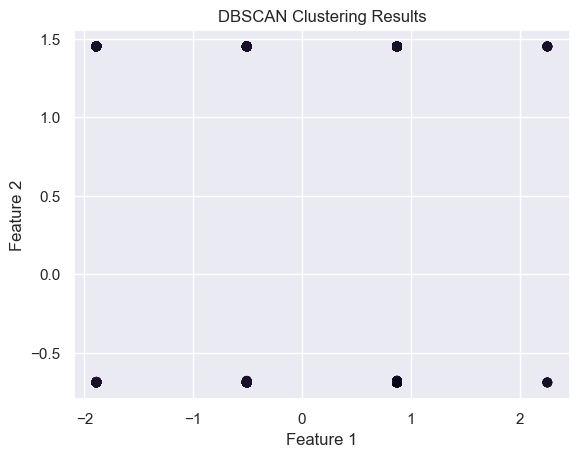

In [ ]:
# Run DBSCAN with the best value of eps and visualize the results
dbscan = DBSCAN(eps=best_eps, min_samples=k)
dbscan.fit(array_data_numeric_standarized)
plt.scatter(array_data_numeric_standarized[:, 0], array_data_numeric_standarized[:, 1], c=dbscan.labels_)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Results')
plt.show()

##### Create DBSCAN object with resulted best hyperparameters and observe its silhouette score

In [227]:
# Create DBSCAN object with resulted best hyperparameters
dbscan = DBSCAN(eps=47.42105263157895, metric='euclidean', 
                min_samples=3)

# Fit model and predict clusters
labels = dbscan.fit_predict(data_numeric_standarized)

# retrieve unique clusters
unique_labels = set(labels)
# get number of unique clusters
no_clusters = len(unique_labels)
# get number of noise
no_noise = np.sum(np.array(labels) == -1, axis=0)

print(f'unique_labels = {unique_labels}')
print(f'Number of clusters in DBSCAN = {no_clusters}')
print(f'Number of noise in DBSCAN = {no_noise}')

# Compute silhouette score
silhouette_avg = silhouette_score(data_numeric_standarized, labels)

# Print silhouette score
print("The average silhouette score for DBSCAN with eps=50 and min_samples=1 is:", silhouette_avg)

unique_labels = {0, 1, -1}
Number of clusters in DBSCAN = 3
Number of noise in DBSCAN = 24
The average silhouette score for DBSCAN with eps=50 and min_samples=1 is: 0.6540386685617618


##### This silhouette score is higher than the previous one. Prior iteration's results were:
* unique_labels = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
* Number of clusters in DBSCAN = 25
* Number of noise in DBSCAN = 0
* The average silhouette score for DBSCAN with eps=50 and min_samples=1 is: 0.6216429064152031 

In [228]:
# Extract the cluster centers
unique_labels = set(labels)
cluster_centers = []
for label in unique_labels:
    if label != -1:
        cluster_centers.append(data_numeric_standarized[labels == label].mean(axis=0))

# Print the number of clusters and their centers
n_clusters = len(cluster_centers)
print(f"Number of clusters found: {n_clusters}\n")
print("Cluster centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}:")
    print(f"{center}\n\n")

Number of clusters found: 2

Cluster centers:
Cluster 1:
smartphone_type                         -0.003151
jobs_count                               0.003775
bike_num_days                            0.000582
survey_mode_Call center                  0.000973
survey_mode_rMove                        0.000383
                                           ...   
disability_dressing_Selected             0.001057
disability_concentrating_Not selected    0.002046
disability_concentrating_Selected       -0.000702
disability_none_Not selected             0.001314
disability_none_Selected                 0.000142
Length: 285, dtype: float64


Cluster 2:
smartphone_type                          0.413289
jobs_count                              -0.690243
bike_num_days                           -1.178846
survey_mode_Call center                 -0.252213
survey_mode_rMove                        0.679305
                                           ...   
disability_dressing_Selected            -0.104355
di

## PCA

In [229]:
pca_model2 = PCA(n_components = 2)
pca_model2.fit(data_numeric_standarized)

PCA(n_components=2)

In [230]:
training_data_pca2 = pca_model2.transform(data_numeric_standarized)
centers_pca2 = pca_model2.transform(cluster_centers)

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



In [231]:
(training_data_pca2).shape

(2692, 2)

In [232]:
centers_pca2

array([[-0.03405019,  0.01318521],
       [12.3849545 , -5.67874488]])

In [233]:
pca_dataframe = pd.DataFrame(data=training_data_pca2,
                             columns=['pca1','pca2'])
pca_dataframe

pca1      pca2
0      6.566093  1.928697
1     -2.765467 -3.313488
2     -2.750387 -1.304484
3     12.171082 -6.393058
4     -2.594864 -1.362389
...         ...       ...
2687  -2.508899  0.366281
2688  -2.751199 -2.924418
2689  -2.251235 -0.611653
2690  -2.421058 -2.172587
2691   5.676366 -1.032454

[2692 rows x 2 columns]

In [234]:
pca_df = pd.concat([pca_dataframe, pd.DataFrame({'cluster': labels})], axis=1)
pca_df

pca1      pca2  cluster
0      6.566093  1.928697        0
1     -2.765467 -3.313488        0
2     -2.750387 -1.304484        0
3     12.171082 -6.393058        1
4     -2.594864 -1.362389        0
...         ...       ...      ...
2687  -2.508899  0.366281        0
2688  -2.751199 -2.924418        0
2689  -2.251235 -0.611653        0
2690  -2.421058 -2.172587        0
2691   5.676366 -1.032454        0

[2692 rows x 3 columns]

In [235]:
type(labels)

numpy.ndarray

In [236]:
unique_vals, counts = np.unique(labels, return_counts=True)

In [237]:
for val, count in zip(unique_vals, counts):
    print(f"{val}: {count}")

-1: 24
0: 2665
1: 3


* We have 24 sample of noise data
* Almost all the data included in cluster0

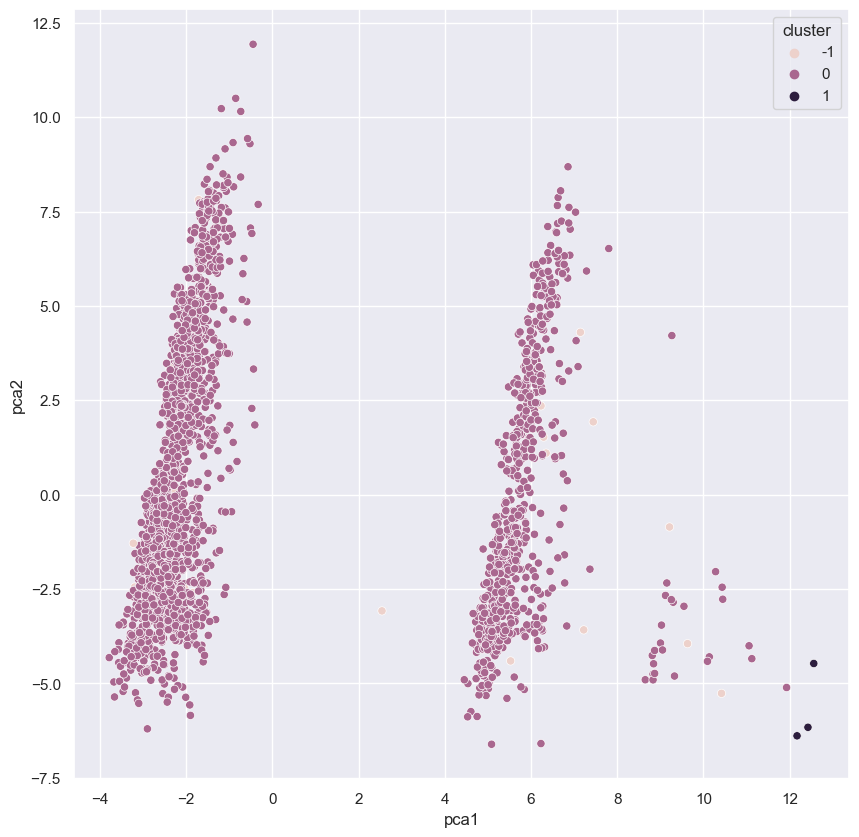

In [238]:
plt.figure(figsize=(10,10))
ax= sns.scatterplot(x="pca1", y="pca2", hue="cluster",data=pca_df, )
plt.show()

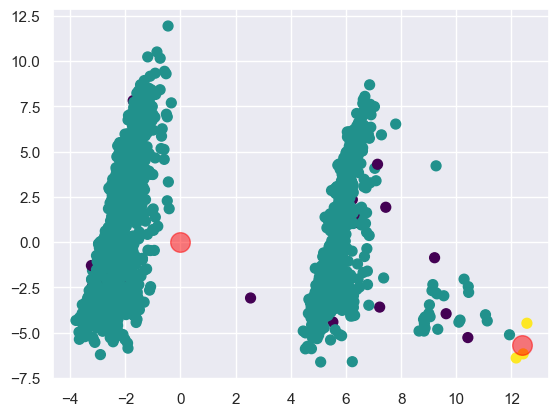

In [239]:
plt.scatter(training_data_pca2[:, 0],
            training_data_pca2[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers_pca2[:, 0], centers_pca2[:, 1], c='red', s=200, alpha=0.5)

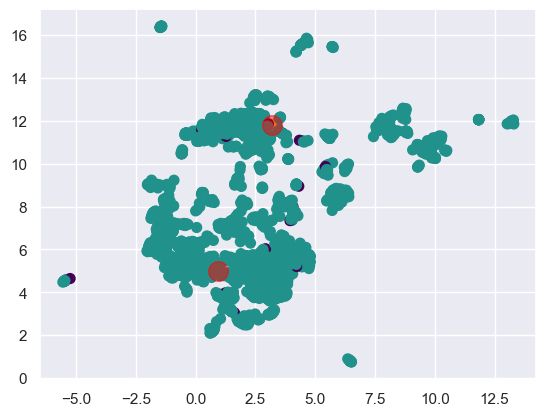

In [240]:
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2)
umap_model = reducer.fit(data_numeric_standarized)
training_data_embedding = umap_model.transform(data_numeric_standarized)
centers_embedding = umap_model.transform(cluster_centers)

# plot the data in the low dim with the cluster results
plt.scatter(training_data_embedding[:, 0],
            training_data_embedding[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers_embedding[:, 0], centers_embedding[:, 1], c='red', s=200, alpha=0.5)
plt.show(block=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.92, '3D PCA plot')

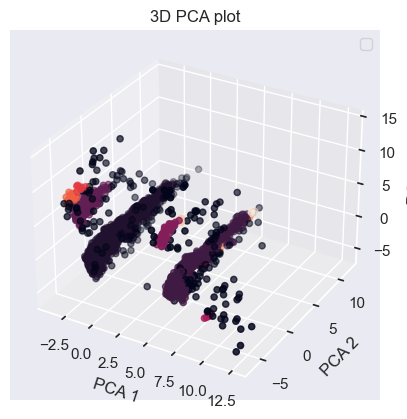

In [243]:
# pca 3D > then DBSCAN > then visualizatin
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_numeric_standarized)

# apply DBSCAN clustering algorithm on the reduced data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_pca)

# plot the clusters in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=dbscan.labels_)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
# plt.show()
ax.legend()
plt.title("3D PCA plot")


[smartphone_type                         -0.003151
jobs_count                               0.003775
bike_num_days                            0.000582
survey_mode_Call center                  0.000973
survey_mode_rMove                        0.000383
                                           ...   
disability_dressing_Selected             0.001057
disability_concentrating_Not selected    0.002046
disability_concentrating_Selected       -0.000702
disability_none_Not selected             0.001314
disability_none_Selected                 0.000142
Length: 285, dtype: float64, smartphone_type                          0.413289
jobs_count                              -0.690243
bike_num_days                           -1.178846
survey_mode_Call center                 -0.252213
survey_mode_rMove                        0.679305
                                           ...   
disability_dressing_Selected            -0.104355
disability_concentrating_Not selected    0.314999
disability_concentra

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



Text(0.5, 0.92, '3D PCA plot')

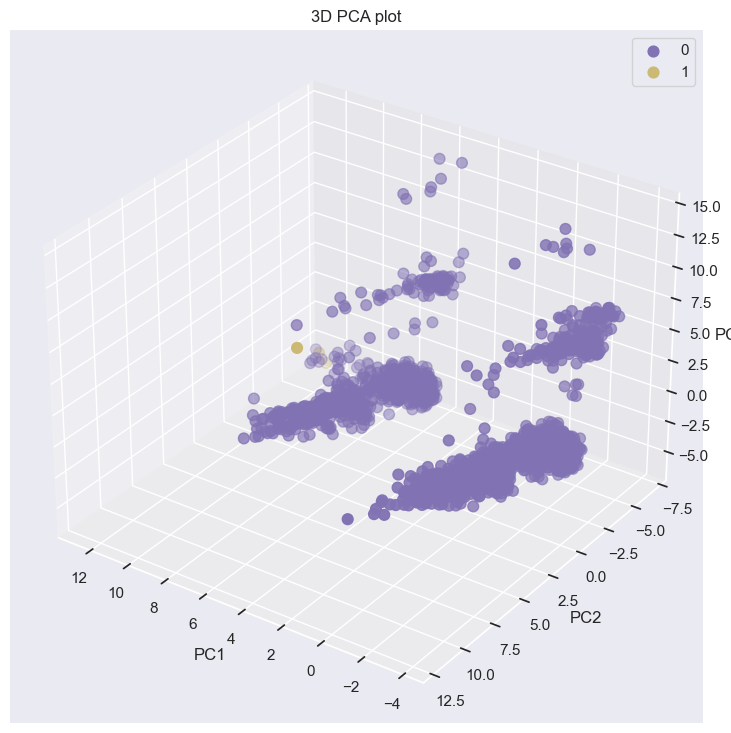

In [248]:
pca_3d_dbscan = PCA(n_components=3)
pca_3d_dbscan.fit(data_numeric_standarized)
pca_bcancer_dbscan = pca_3d_dbscan.transform(data_numeric_standarized)
pca_centers_dbscan = pca_3d_dbscan.transform(cluster_centers)
print(cluster_centers)
print(pca_centers_dbscan)
# map each cluster label to a specific color that will be used to plot the corresponding data points
cdict = {0:'m',1:'y'} # 'm' = magenta, 'c' = cyan
label = {0:'0',1:'1'}
y = labels

Xax = pca_bcancer_dbscan[:,0]
Yax = pca_bcancer_dbscan[:,1]
Zax = pca_bcancer_dbscan[:,2]

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, 
                     projection='3d')

for l in np.unique(y):
    if l != -1:
        ix = np.where(y == l)
        ax.scatter(Xax[ix], 
                   Yax[ix], 
                   Zax[ix], 
                   c=cdict[l], 
                   s=60,
                   label=label[l]) 


ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)
 
ax.view_init(30, 125)
ax.legend()
plt.title("3D PCA plot")